# Credit Card Fraud Detection Capstone Project

### Contributed By :  Nidhish Raj

## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.** 


## Data Understanding :

### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set. 

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# EDA and Data Preparation

In [2]:
#To read csv File from locally stored file
df= pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [4]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
#df.columns = df.columns.str.strip()

In [ ]:
#df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [7]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Good No Null Values!
df.isnull().sum().max()

0

In [11]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

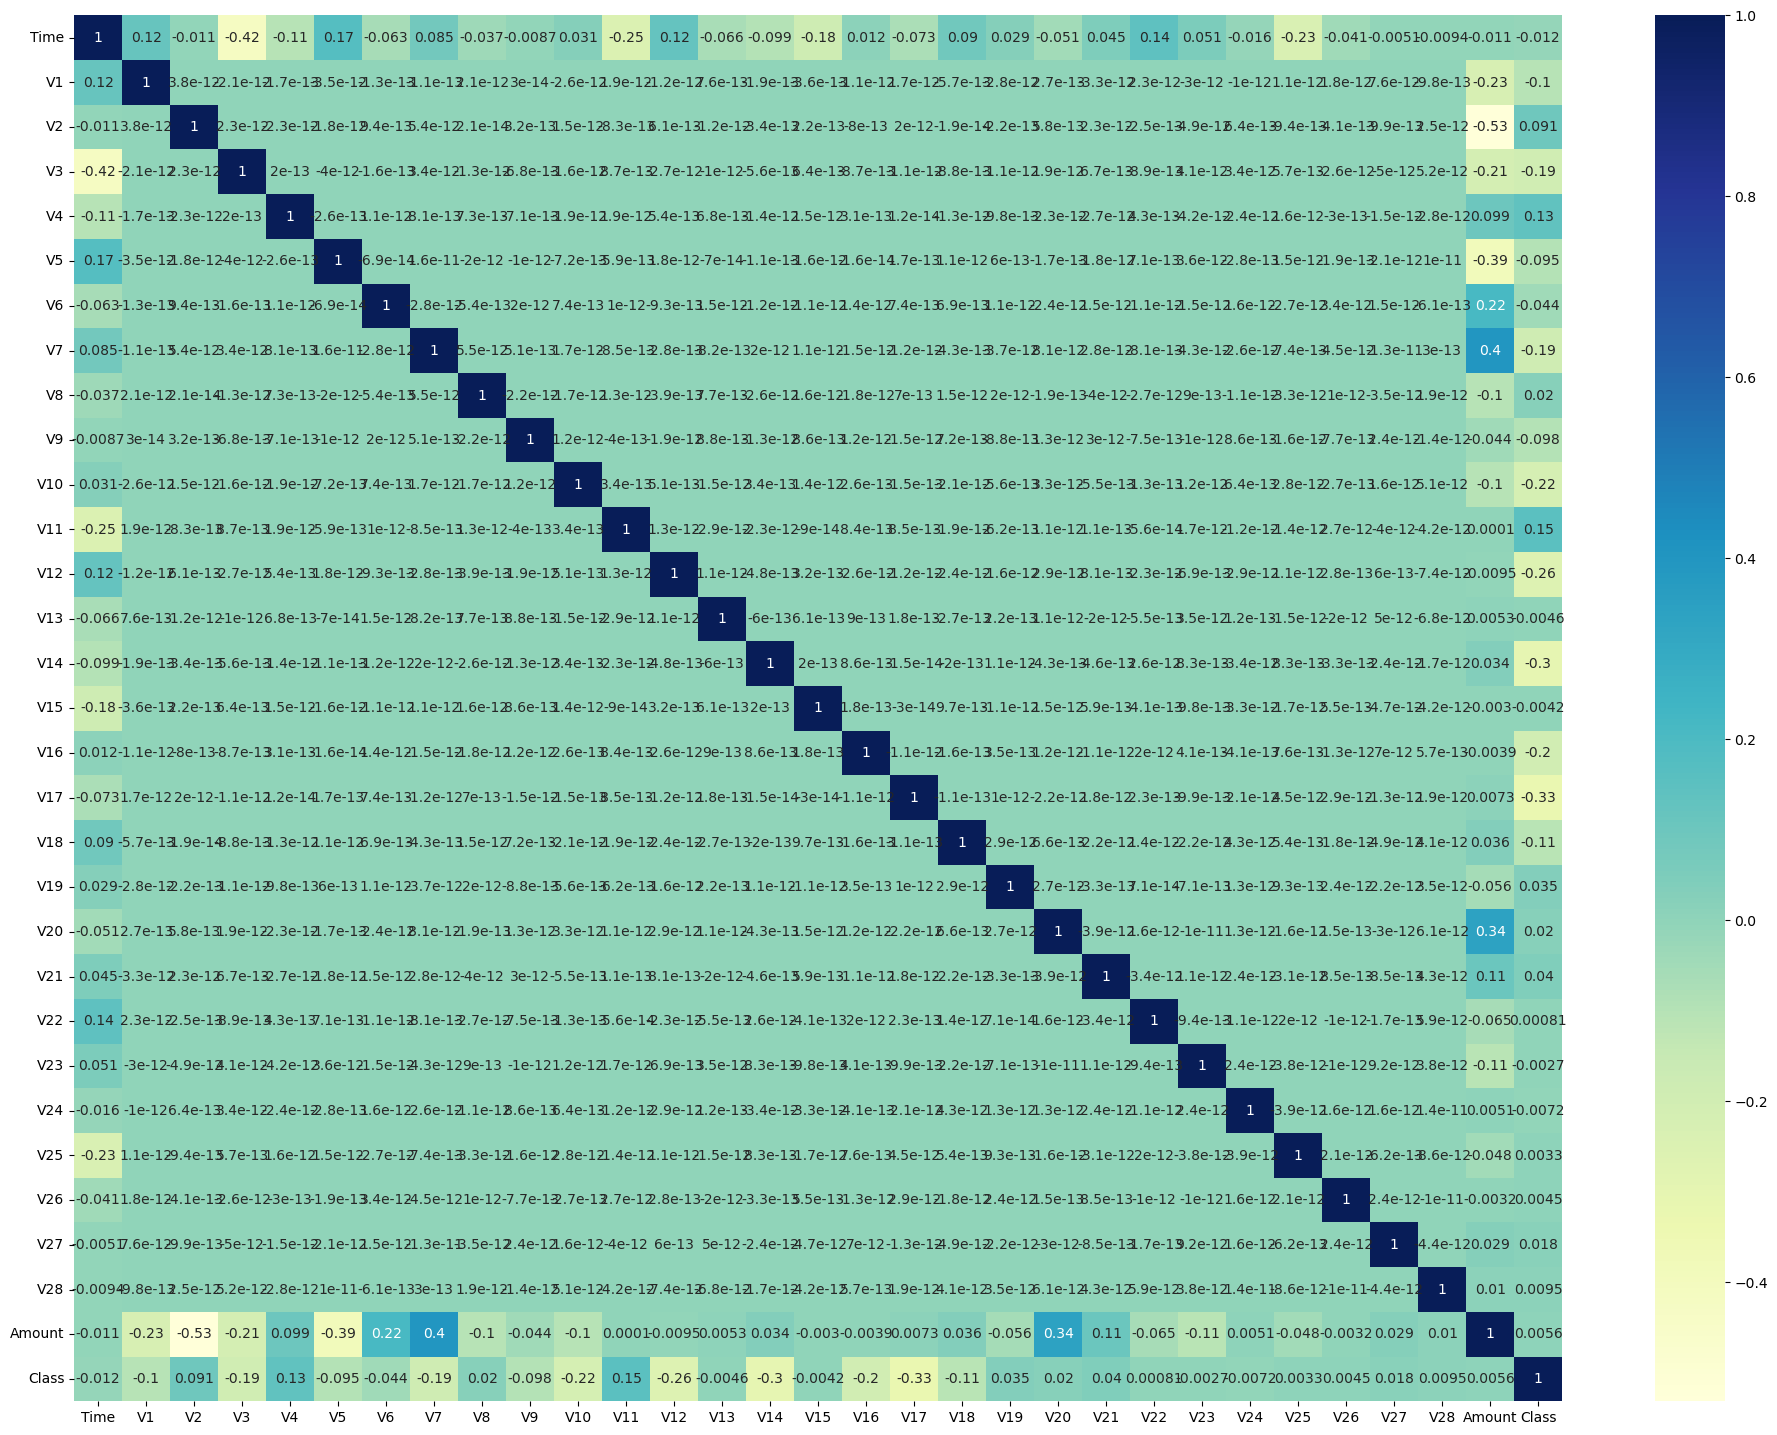

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


# Here we will observe the distribution of our classes

In [14]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

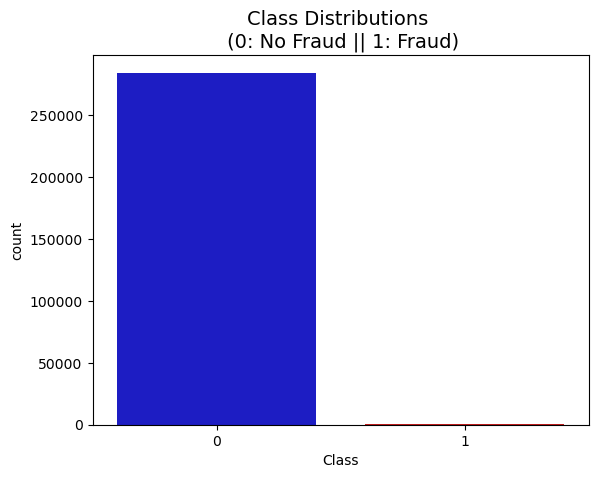

In [15]:

# Define your color palette
colors = ["#0101DF", "#DF0101"]

# Create the count plot
sns.countplot(x='Class', data=df, palette=colors)

# Add the title
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Show the plot
plt.show()

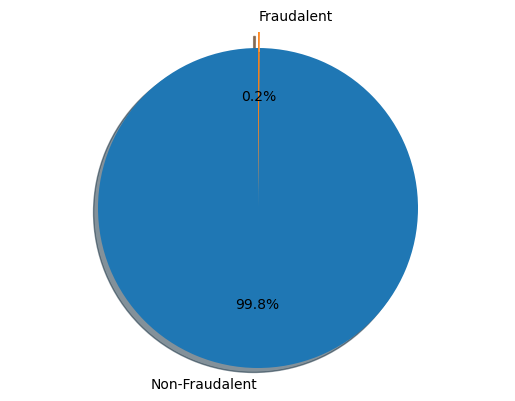

In [16]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


# So we have 492 fraudalent transactions out of 284807 total credit card transactions.
Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [18]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

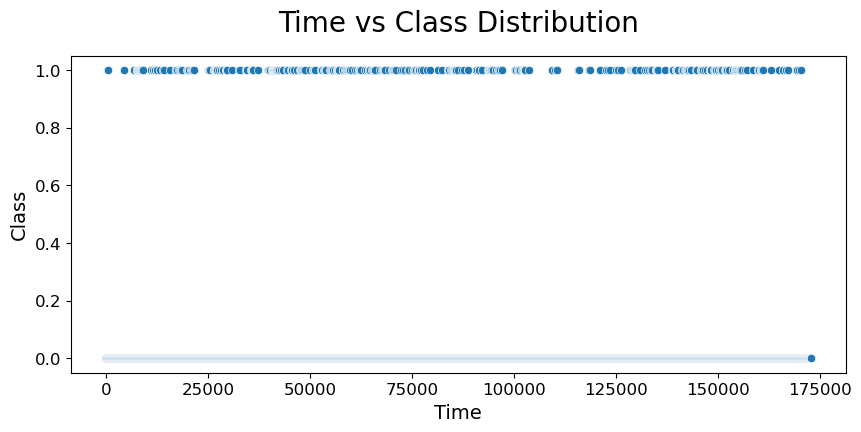

In [19]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(10, 14))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=14)
plt.ylabel('Class', size=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

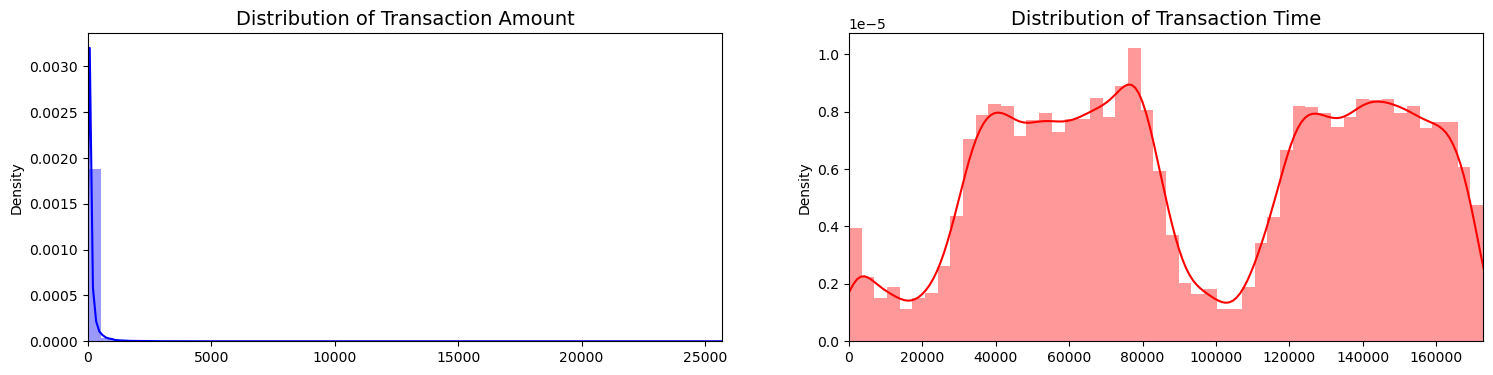

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

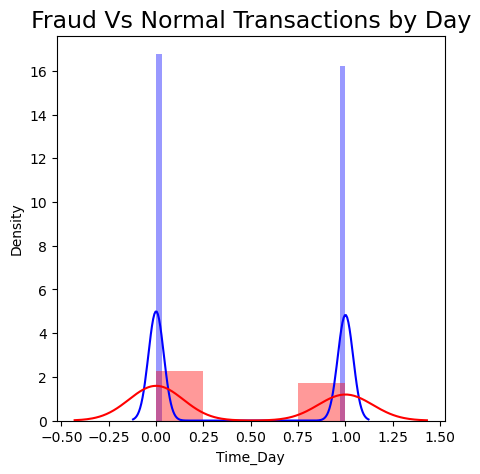

In [21]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='blue')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

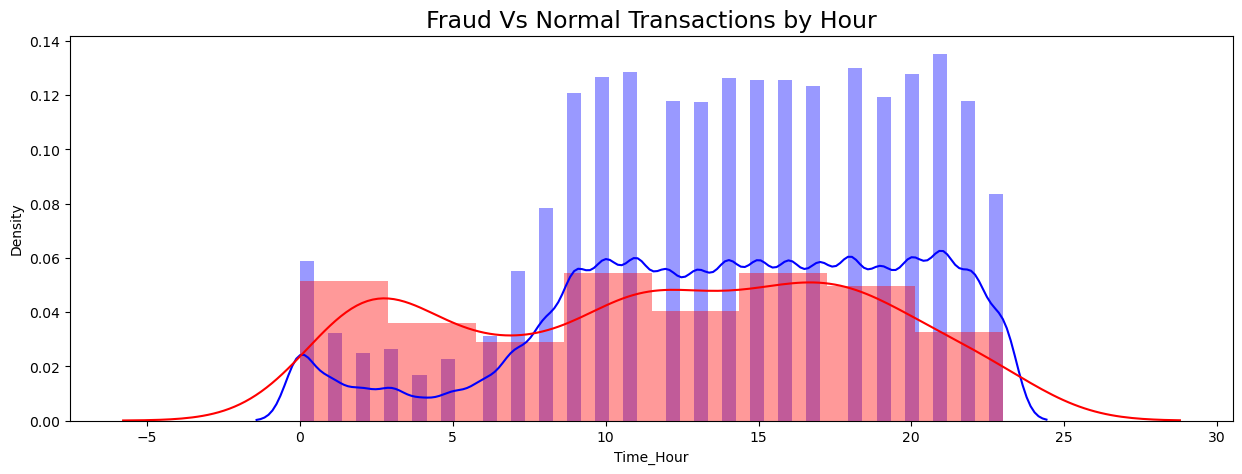

In [22]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='blue')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

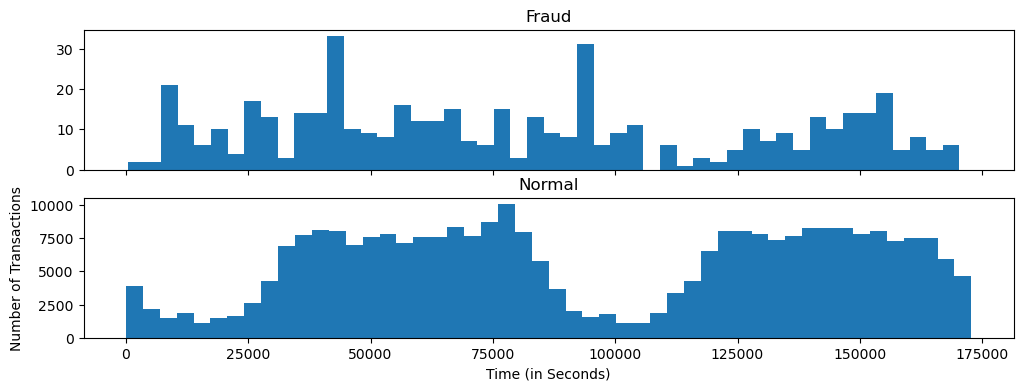

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [24]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [25]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

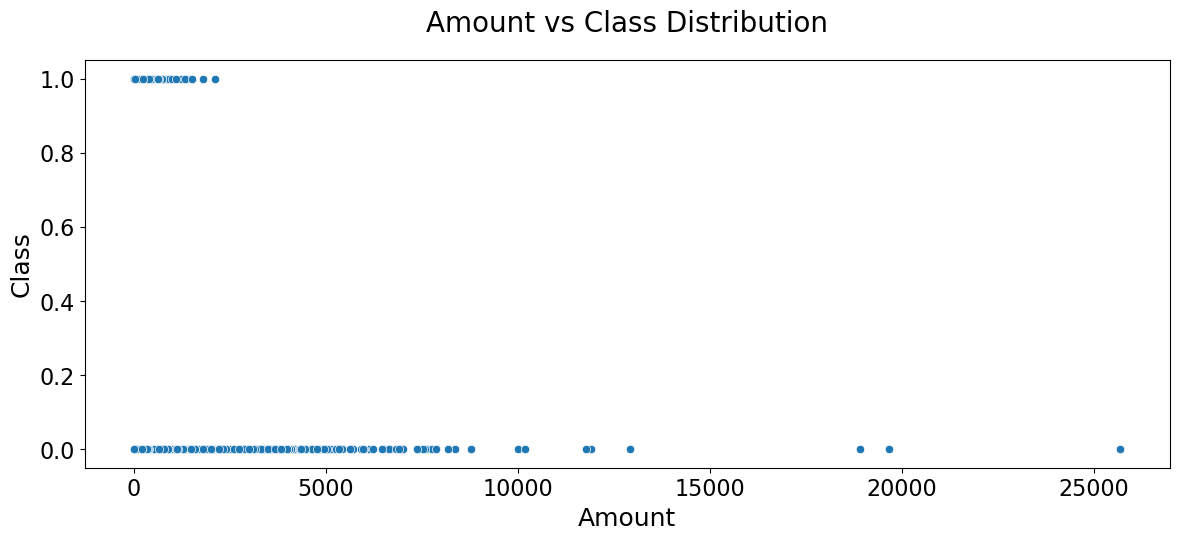

In [26]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

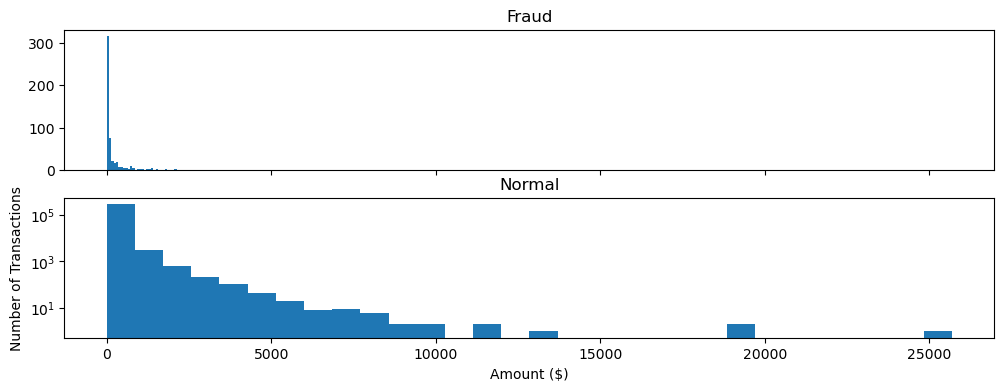

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [28]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

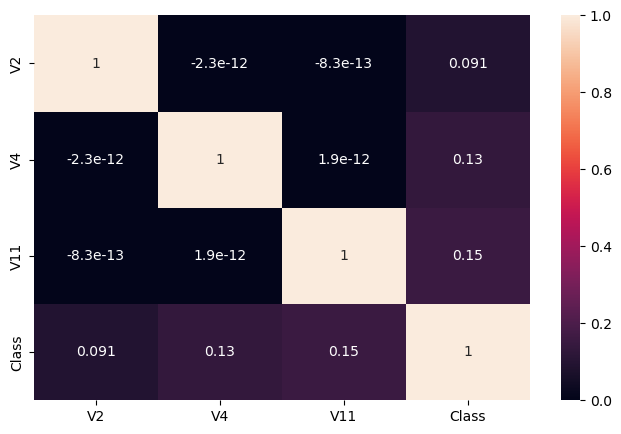

In [29]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Plotting the distribution of a variable

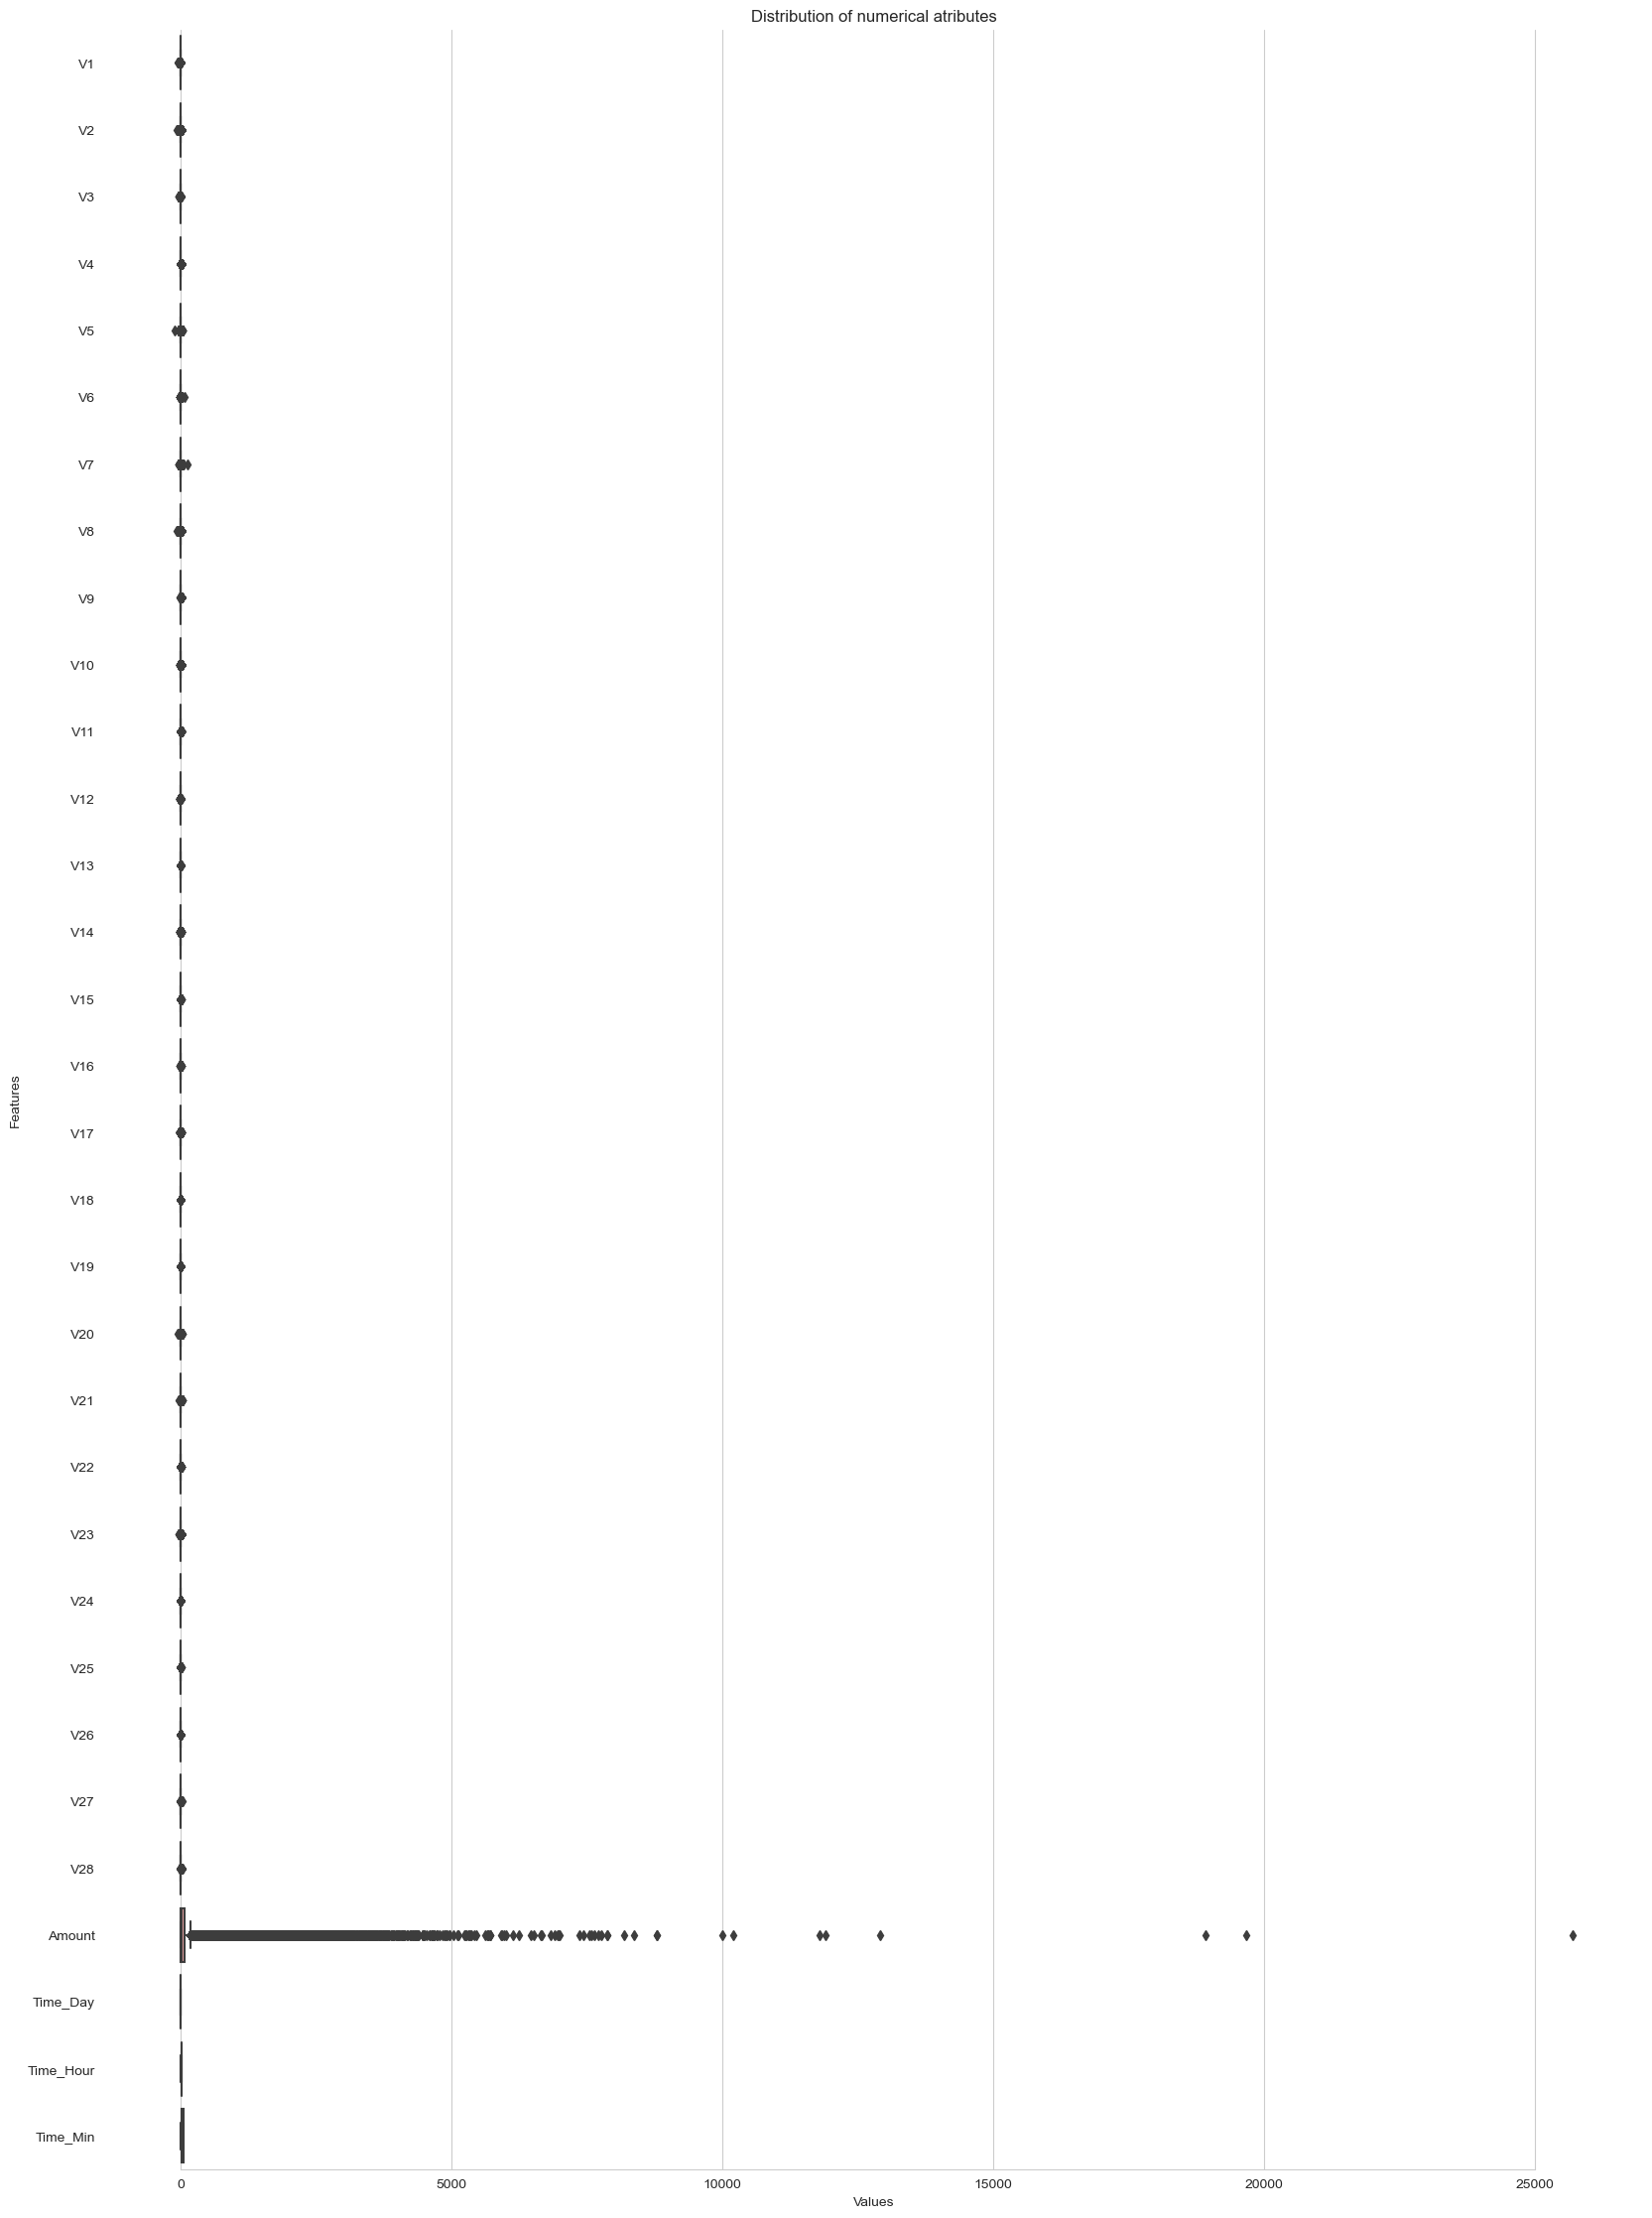

In [30]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20,28))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [31]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

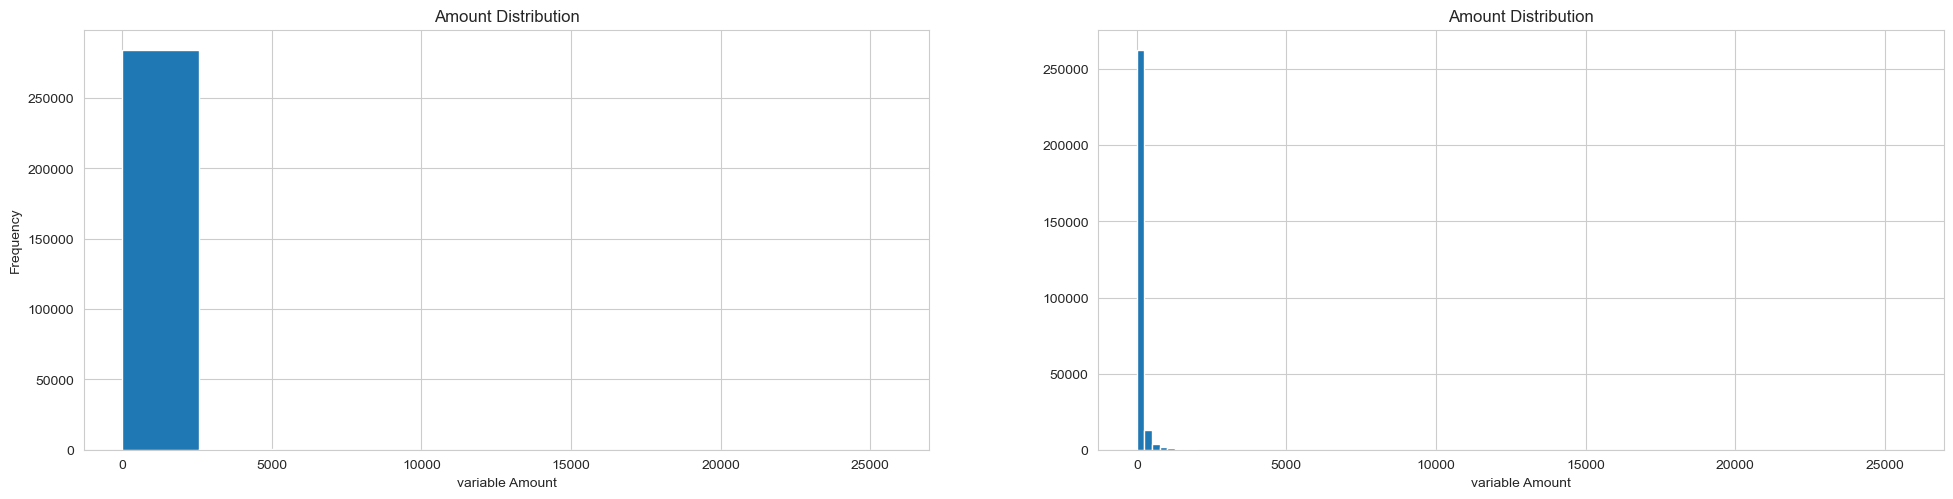

In [32]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

# Splitting the data into train & test data

In [33]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [34]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [35]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Preserve X_test & y_test to evaluate on the test data once you build the model

In [36]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


# Plotting the distribution of a variable

In [37]:
cols = list(X.columns.values)

In [38]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

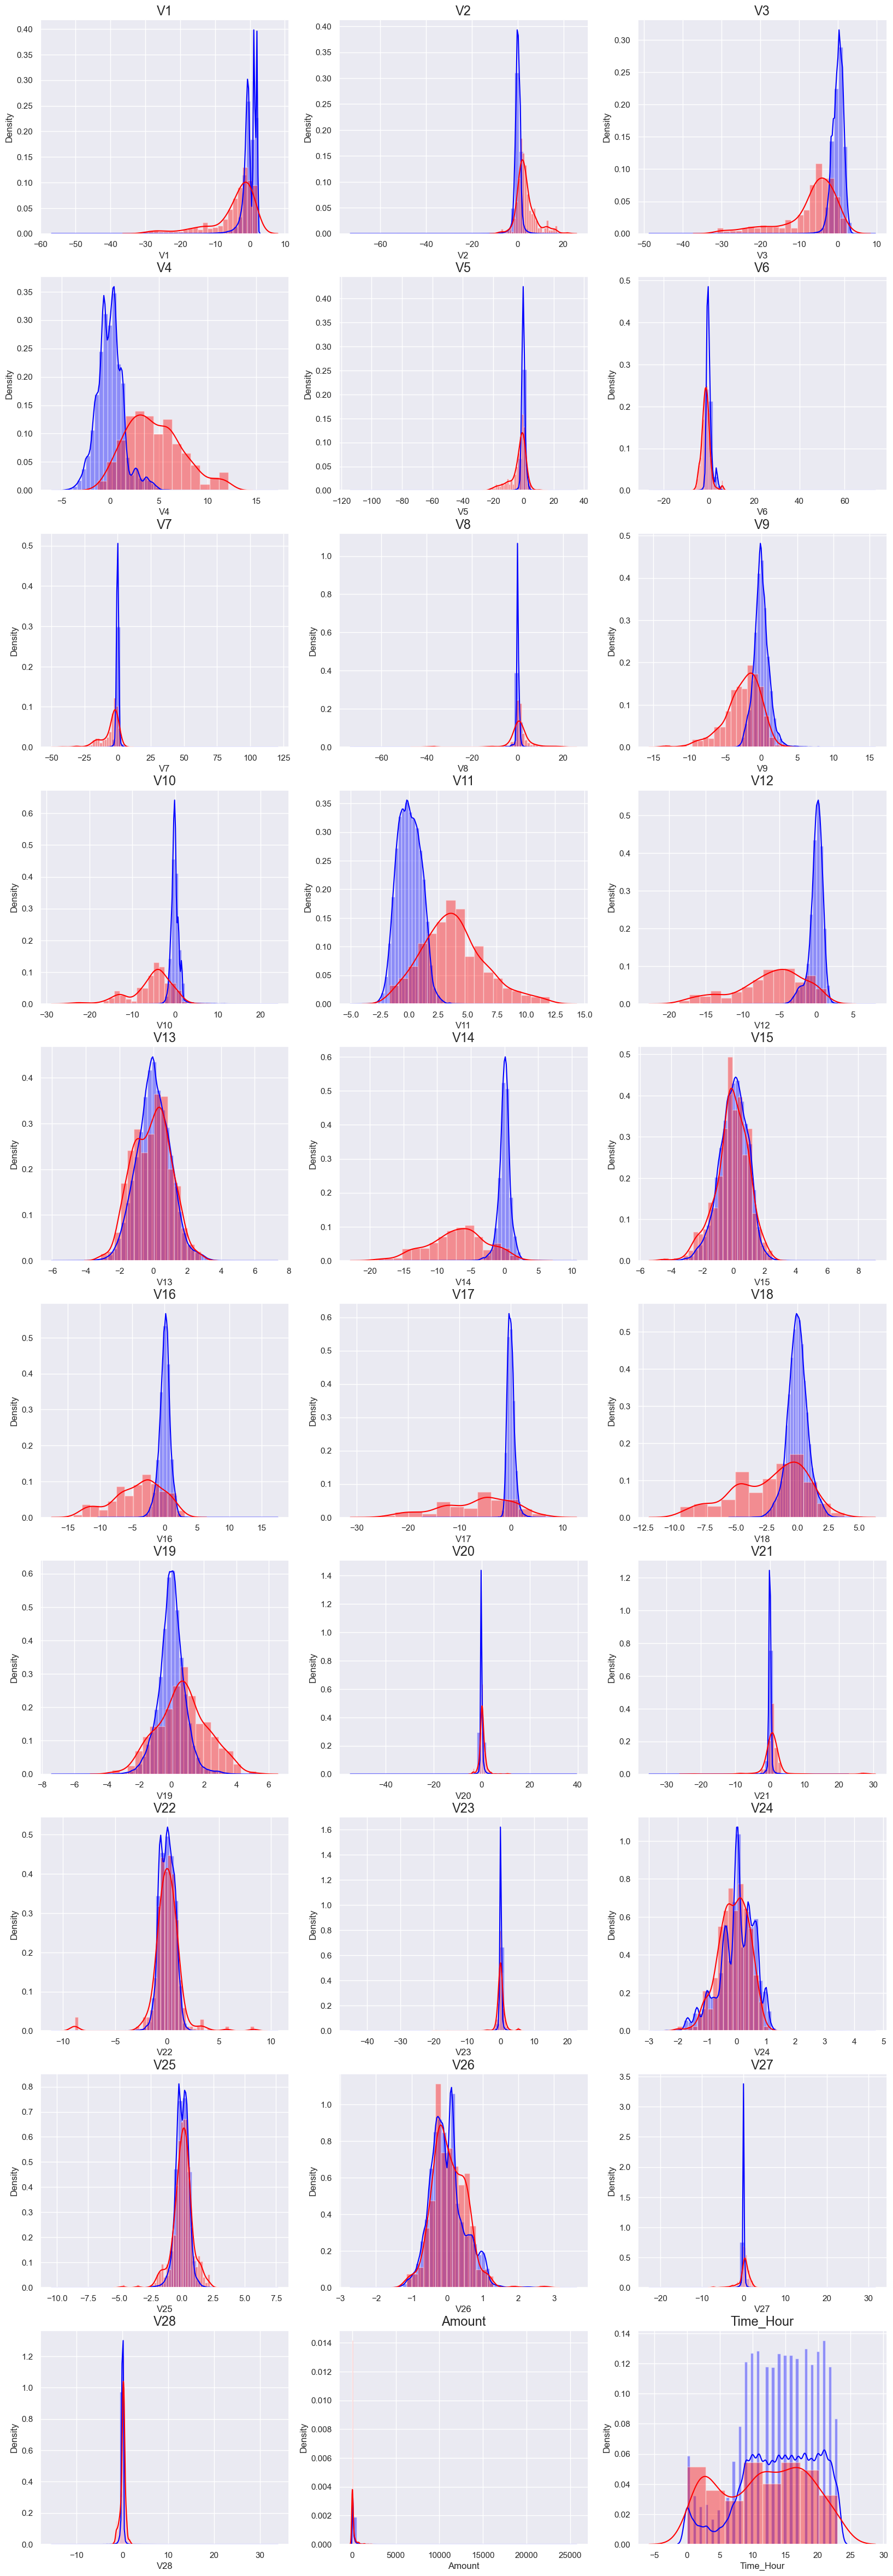

In [39]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='blue')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [40]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [41]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

# 1)Logistic Regression Model

In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def buildAndRunLogisticModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):

# Logistic Regression
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit models
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)

    # Print and store results
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    
    print("Parameters for l2 regularization")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    print("Parameters for l1 regularization")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    # Predictions
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)

    # Predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of Logistic model with L2 regularization : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    # Assuming Plot_confusion_matrix is defined elsewhere
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of Logistic model with L1 regularization : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    # ROC and AUC for L2
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("L2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L2 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results for Logistic Regression with L2 Regularization
    new_row_l2 = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Logistic Regression with L2 Regularisation',
        'Accuracy': Accuracy_l2,
        'roc_value': l2_roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_l2], ignore_index=True)

    # ROC and AUC for L1
    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("L1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results for Logistic Regression with L1 Regularization
    new_row_l1 = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Logistic Regression with L1 Regularisation',
        'Accuracy': Accuracy_l1,
        'roc_value': l1_roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_l1], ignore_index=True)

    return df_Results

# 2)KNN model

In [43]:
def buildAndRunKNNModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate KNN model
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Model score:", score)
    
    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    # Assuming Plot_confusion_matrix is defined elsewhere
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Predicted probabilities
    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value:", knn_roc_value)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold:", threshold)

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset:", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    # Append results for KNN
    new_row_knn = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'KNN',
        'Accuracy': score,
        'roc_value': knn_roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_knn], ignore_index=True)

    return df_Results

# 3)SVM model

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
def buildAndRunSVMModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    # Assuming Plot_confusion_matrix is defined elsewhere
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier with probability estimates
    classifier = SVC(kernel='sigmoid', probability=True, random_state=42)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results for SVM
    new_row_svm = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'SVM',
        'Accuracy': SVM_Score,
        'roc_value': roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_svm], ignore_index=True)

    return df_Results

# 4) Decision Tree model

In [45]:
def buildAndRunTreeModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix")
        # Assuming Plot_confusion_matrix is defined elsewhere
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        # Append results for Decision Tree
        new_row_tree = pd.DataFrame({
            'Data_Imbalance_Handling': DataImbalance,
            'Model': 'Tree Model with {0} criteria'.format(c),
            'Accuracy': test_score,
            'roc_value': tree_roc_value,
            'threshold': threshold
        }, index=[0])

        df_Results = pd.concat([df_Results, new_row_tree], ignore_index=True)

    return df_Results

# 5)Random Forest model

In [46]:
def buildAndRunRandomForestModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate Random Forest model

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                      bootstrap=True,
                                      max_features='sqrt', 
                                      random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)
    print('Model Accuracy: {0}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    # Assuming Plot_confusion_matrix is defined elsewhere
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results for Random Forest
    new_row_rf = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Random Forest',
        'Accuracy': RF_test_score,
        'roc_value': roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_rf], ignore_index=True)

    return df_Results

# 6) XGBoost model

In [47]:
def buildAndRunXGBoostModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model

    # Fit model on training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    # Assuming Plot_confusion_matrix is defined elsewhere
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results for XGBoost
    new_row_xgb = pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'XGBoost',
        'Accuracy': XGB_test_score,
        'roc_value': XGB_roc_value,
        'threshold': threshold
    }, index=[0])

    df_Results = pd.concat([df_Results, new_row_xgb], ignore_index=True)

    return df_Results

# If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [48]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [49]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

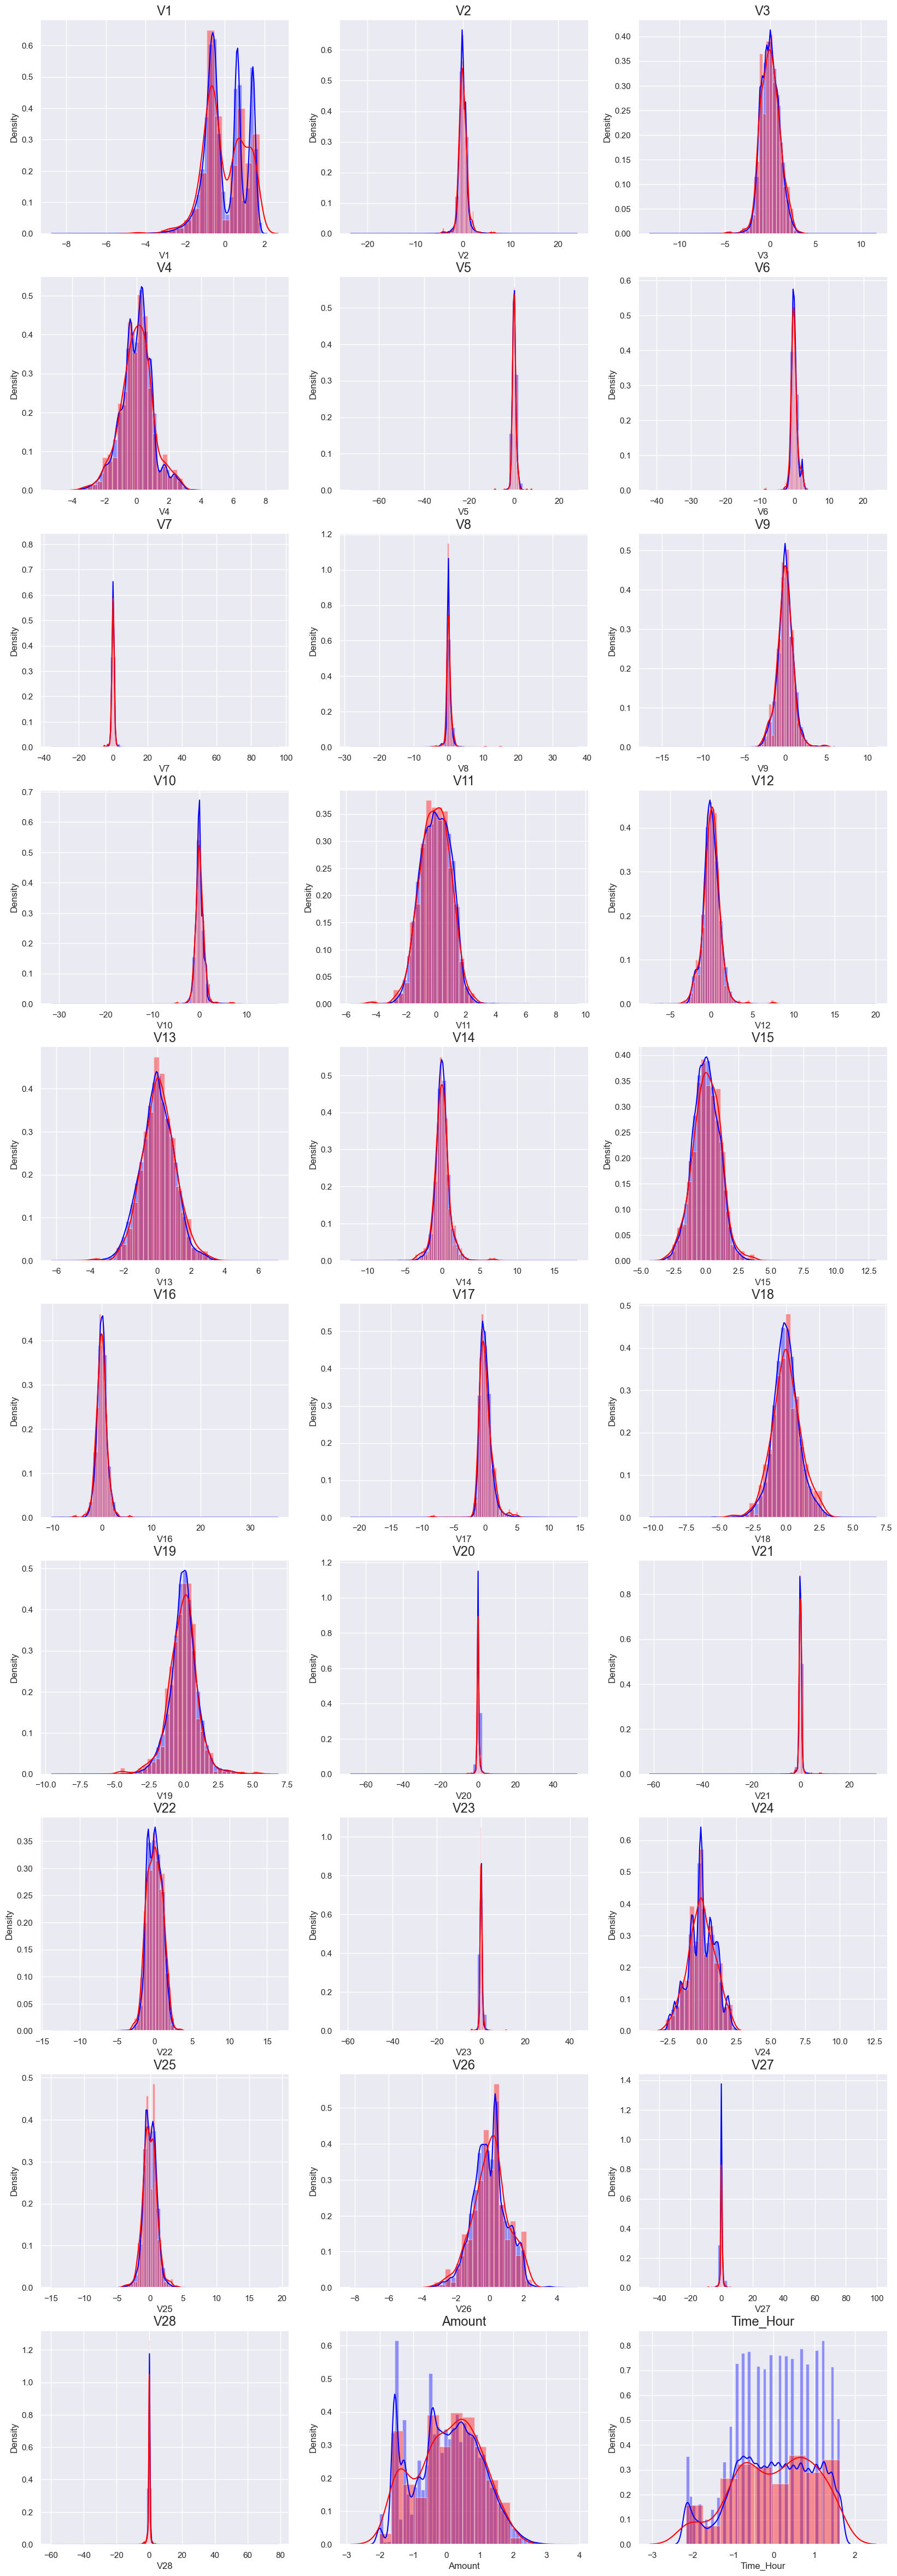

In [50]:
# plot the histogram of a variable from the train dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='blue')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

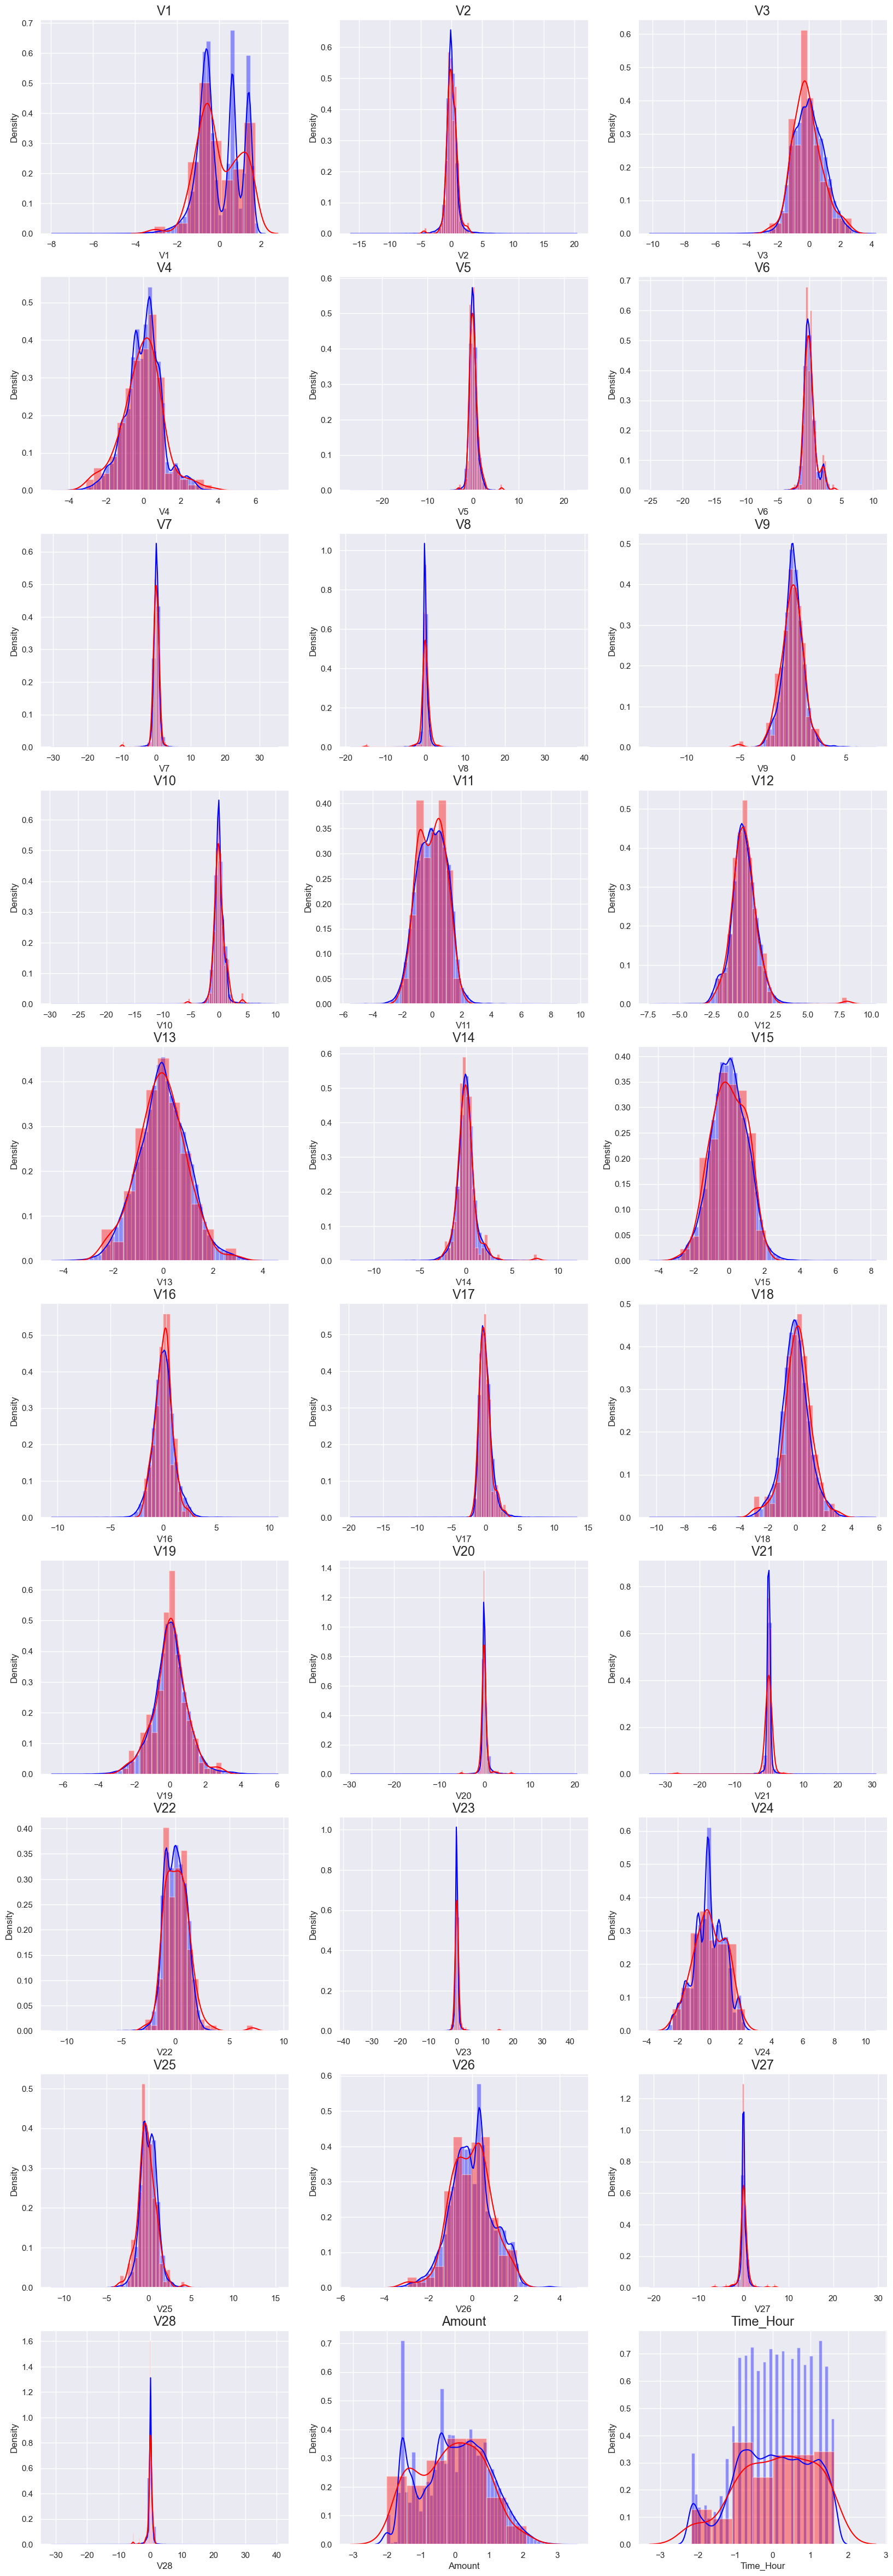

In [51]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='blue')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularization
[[-0.09276542 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143667 -0.20371291  0.17699967 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164991  0.03866811
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.97856203

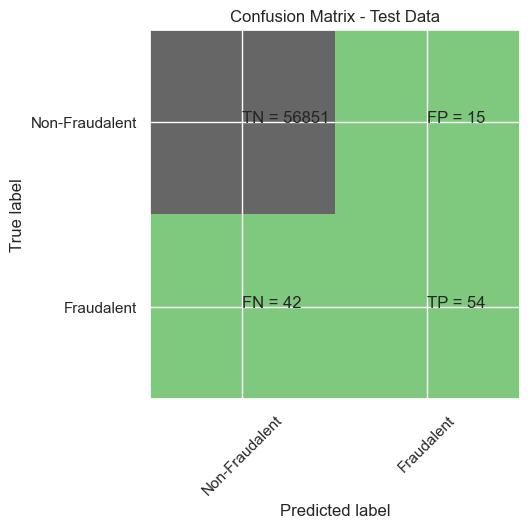

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic model with L1 regularization : 0.9988413328183702
Confusion Matrix


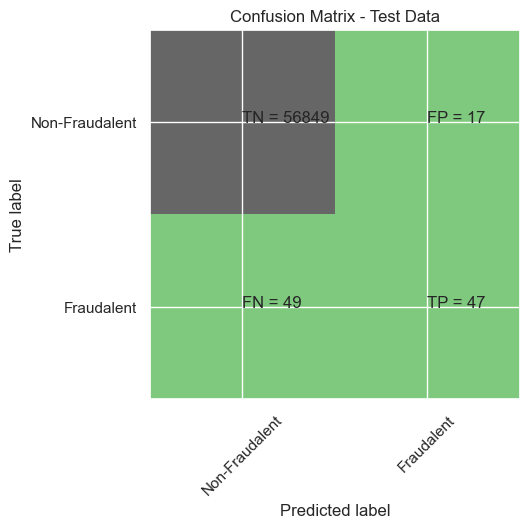

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

L2 roc_value: 0.9668061026506759
L2 threshold: 0.0012891785637957997
ROC for the test dataset: 96.7%


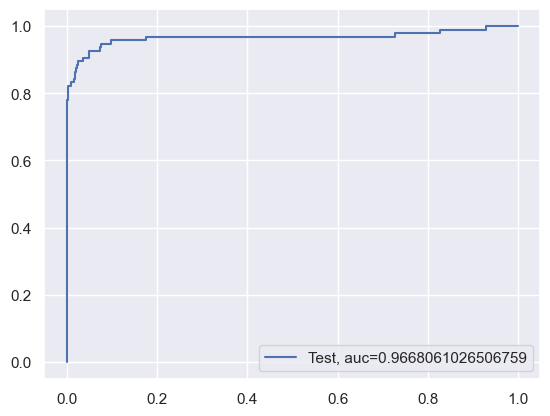

L1 roc_value: 0.9639030791685718
L1 threshold: 0.00927649384990859
ROC for the test dataset: 96.4%


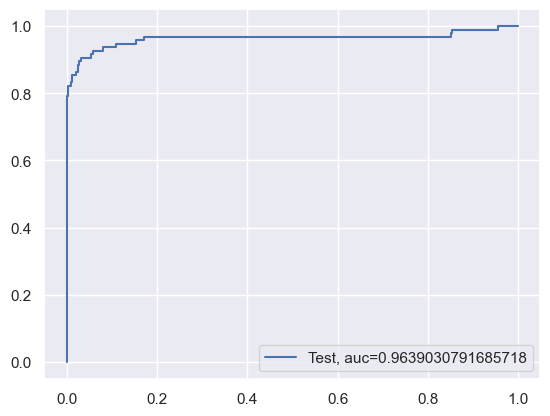

Time Taken by Model: --- 187.53143453598022 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9992977774656788
Confusion Matrix


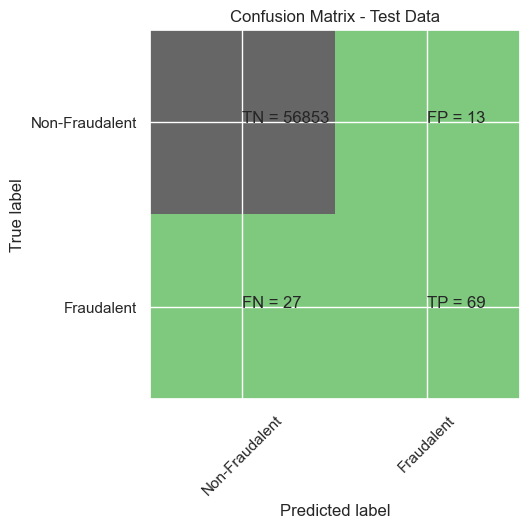

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset: 90.1%


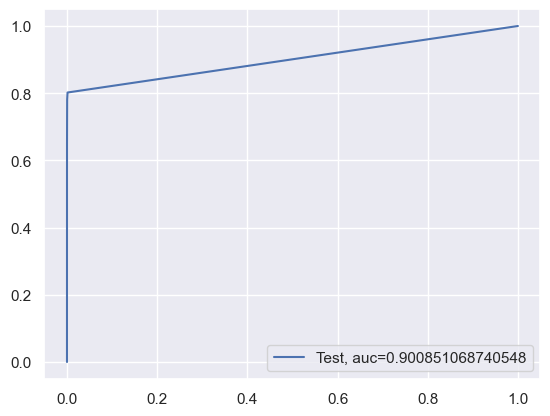

Time Taken by Model: --- 142.1600694656372 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


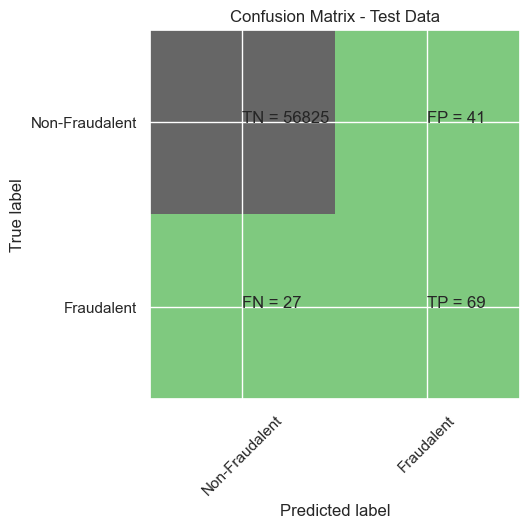

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


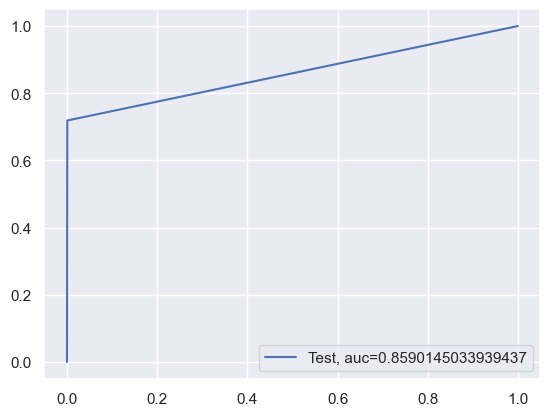

entropy score: 0.9990519995786665
Confusion Matrix


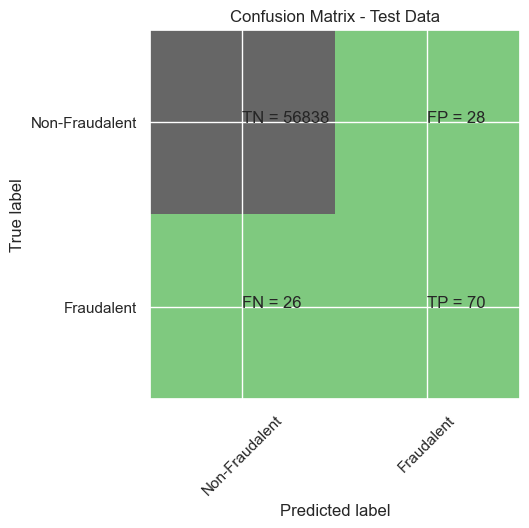

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


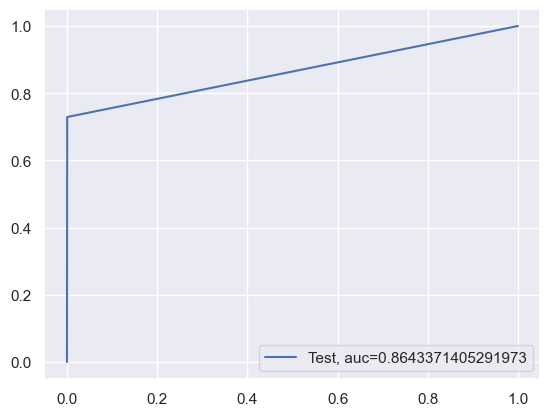

Time Taken by Model: --- 42.78994822502136 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


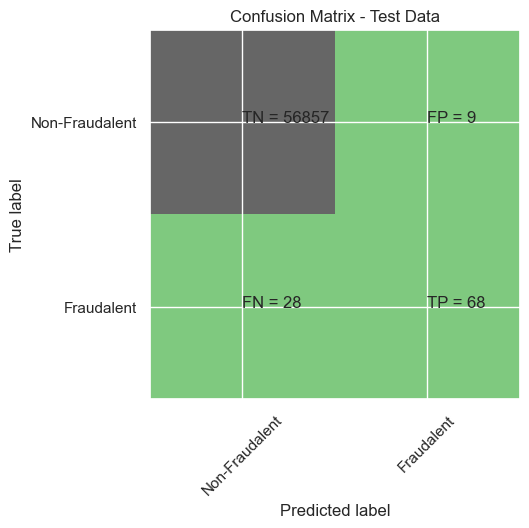

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


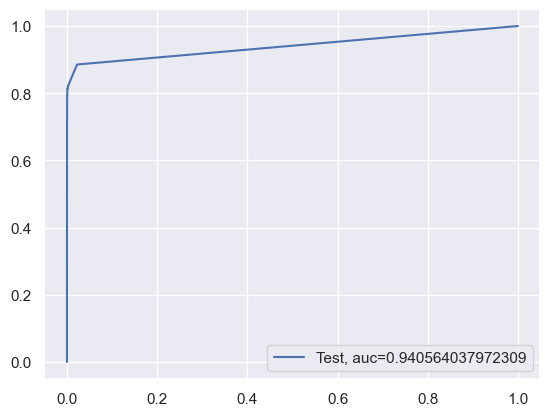

Time Taken by Model: --- 247.2336311340332 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999385555282469
Confusion Matrix


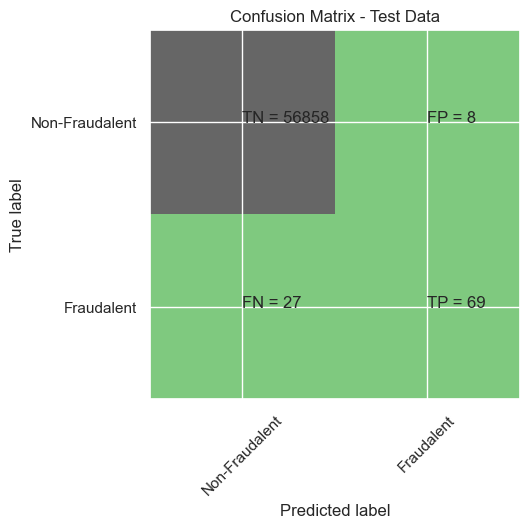

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9775861967901147
XGBoost threshold: 2.300571941304952e-05
ROC for the test dataset 97.8%


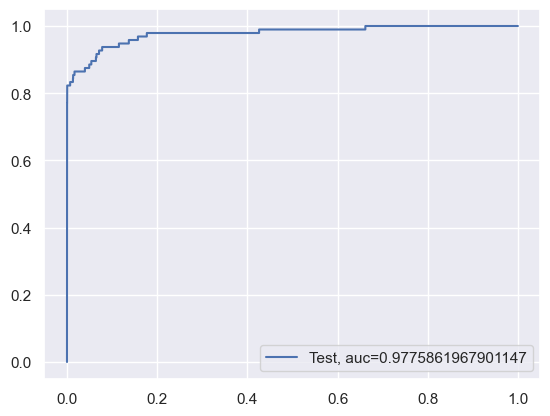

Time Taken by Model: --- 5.351052761077881 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


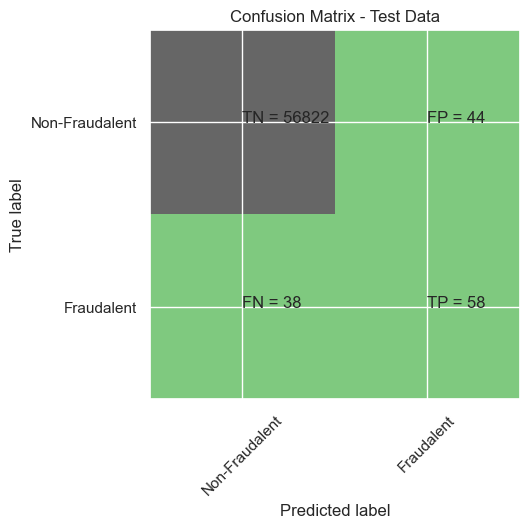

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913403146578507
SVM threshold: 0.0013106012580396203
ROC for the test dataset 89.1%


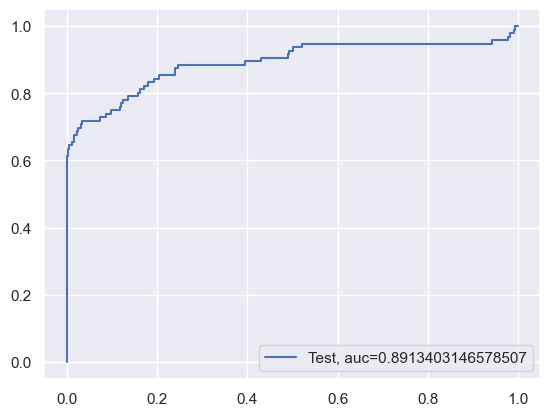

Time Taken by Model: --- 104.89627766609192 seconds ---
--------------------------------------------------------------------------------


In [52]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [53]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0                      NaN  Logistic Regression with L2 Regularisation   
1                      NaN  Logistic Regression with L1 Regularisation   
2                      NaN                                         KNN   
3                      NaN               Tree Model with gini criteria   
4                      NaN            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold Data_Imbalance_Handling  
0  0.998999   0.966806   0.001289       Power Transformer  
1  0.998841   0.963903   0.009276       Power Transformer  
2  0.999298   0.900851   0.200000       Power Transformer  
3  0.998806   0.859015   1.000000       Power Transformer  
4  0.999052   0.864337   1.000000       Power Transformer

# Perform cross validation with RepeatedKFold

In [54]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      4      8 ... 284785 284793 284797]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      6      9 ... 284789 284794 284804]
TRAIN: [     1      2      4 ... 284804 284805 284806] TEST: [     0      3     13 ... 284786 284790 284791]
TRAIN: [     0      1      2 ... 284798 284803 284804] TEST: [    11     15     16 ... 284802 284805 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      7     23 ... 284795 284798 284803]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      9     12 ... 284791 284797 284802]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4     11     13 ... 284786 284796 284805]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     6      7     17 ... 284799 284800 284804]
TRAIN: [     0      1      4 ... 284804 284805 284806] TEST: [     2      3      5 ... 284798 284801 284803]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9818768914759911
Max auc_roc for l1: 0.9711983372127209
Parameters for l2 regularization
[[ 7.94524361e-03  3.63730082e-02 -8.39904029e-02  2.38389259e-01
   8.77977407e-02 -5.25595898e-02 -3.17432792e-02 -1.13376175e-01
  -8.66284725e-02 -1.70171681e-01  1.39595066e-01 -1.99157653e-01
  -3.93624157e-02 -3.68327428e-01 -1.05168217e-02 -9.82825718e-02
  -9.68533520e-02 -4.84113990e-03  5.66130151e-03 -1.60181011e-02
   4.18082051e-02  2.63738004e-02 -1.39370063e-02 -9.39947631e-03
  -1.07317783e-02  5.00598594e-03 -1.00379621e-02 -4.34090094e-03
   3.07326889e-04  1.26836465e-02]]
[-7.58882541]
{1: array([[0.59610788, 0.59818905, 0.62267535, 0.79794407, 0.96275735,
        0.97111745, 0.97426188, 0.98563882, 0.98500512, 0.98292395,
        0.98292395, 0.98292395, 0.98292395, 0.98292395, 0.98292395,
        0.98292395, 0.98292395, 0.98292395, 0.98292395, 0.98292395],
       [0.57521646, 0.57721001, 0.59539334, 0.7326

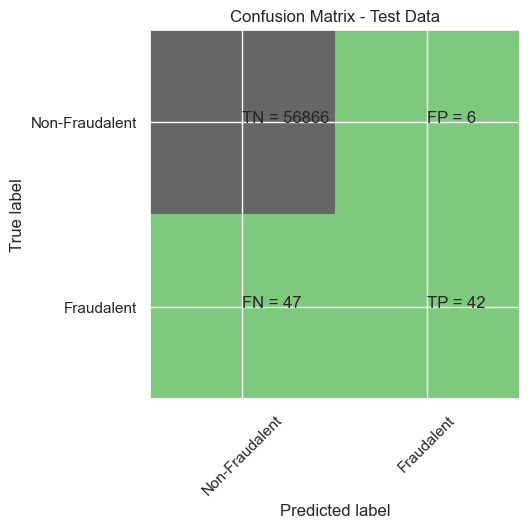

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.88      0.47      0.61        89

    accuracy                           1.00     56961
   macro avg       0.94      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization : 0.9991573181650603
Confusion Matrix


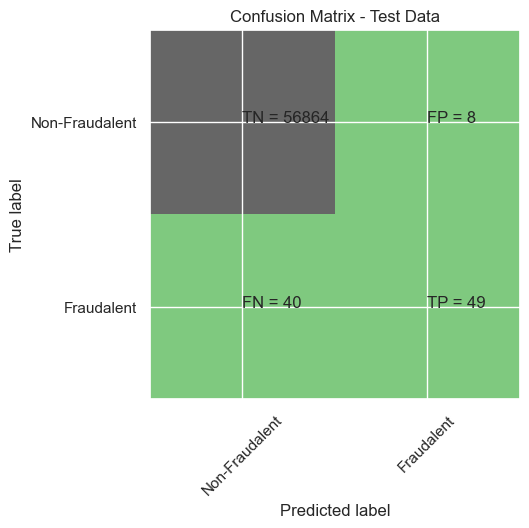

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.86      0.55      0.67        89

    accuracy                           1.00     56961
   macro avg       0.93      0.78      0.84     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.9904350554211231
L2 threshold: 0.0018384456491808837
ROC for the test dataset: 99.0%


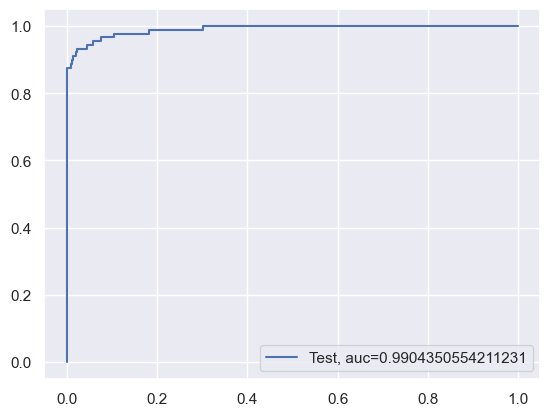

L1 roc_value: 0.8794999533745007
L1 threshold: 0.04619638118554897
ROC for the test dataset: 87.9%


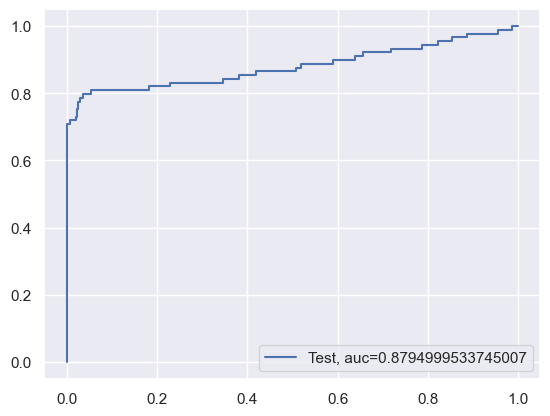

Time Taken by Model: --- 367.0384442806244 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.999350432752234
Confusion Matrix


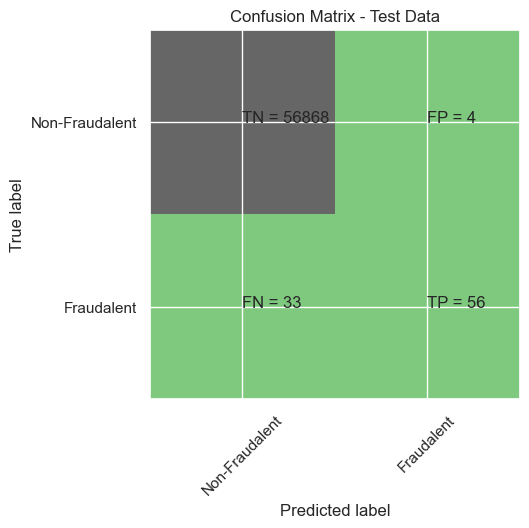

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.93      0.63      0.75        89

    accuracy                           1.00     56961
   macro avg       0.97      0.81      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8761849001345026
KNN threshold: 0.2
ROC for the test dataset: 87.6%


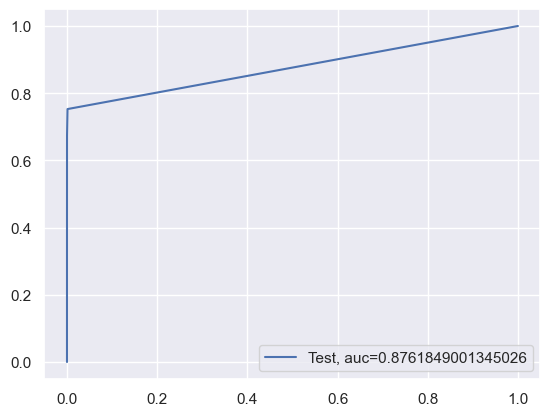

Time Taken by Model: --- 140.0942645072937 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992099857797441
Confusion Matrix


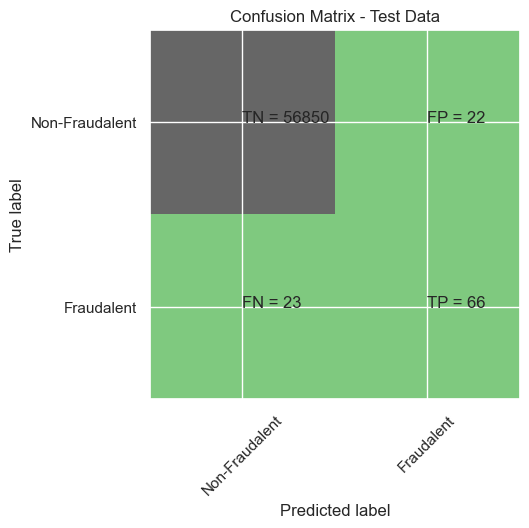

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.75      0.74      0.75        89

    accuracy                           1.00     56961
   macro avg       0.87      0.87      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8705931000583215
Tree threshold: 1.0
ROC for the test dataset 87.1%


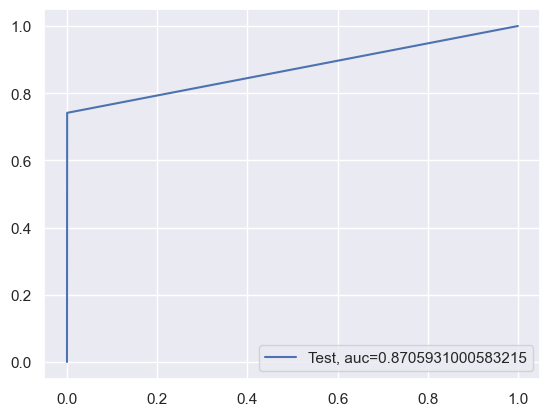

entropy score: 0.9990870946788153
Confusion Matrix


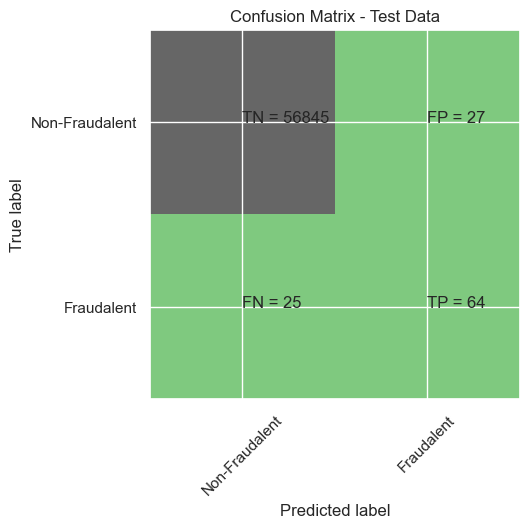

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.70      0.72      0.71        89

    accuracy                           1.00     56961
   macro avg       0.85      0.86      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8593131866395026
Tree threshold: 1.0
ROC for the test dataset 85.9%


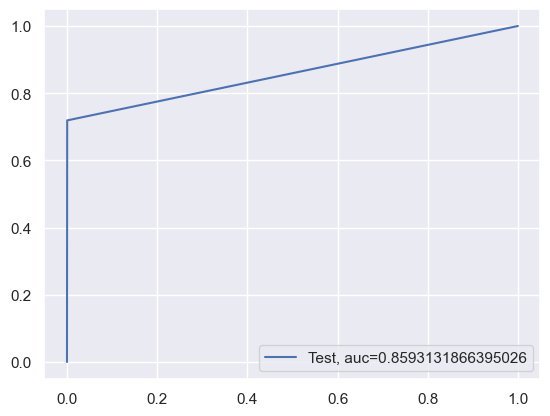

Time Taken by Model: --- 37.650346517562866 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


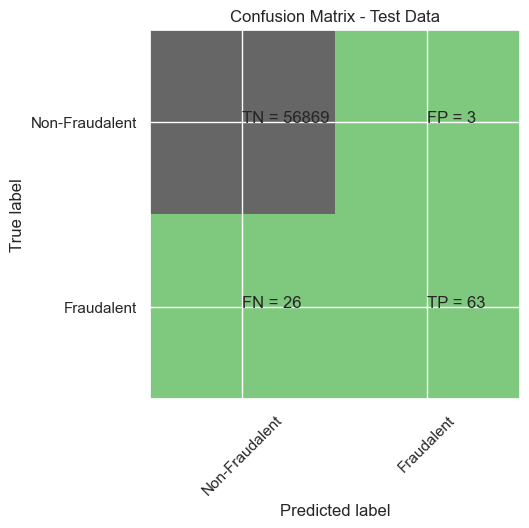

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.95      0.71      0.81        89

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9479276150978108
Random Forest threshold: 0.02
ROC for the test dataset 94.8%


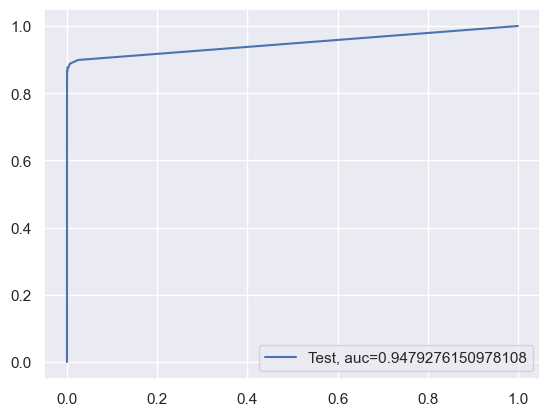

Time Taken by Model: --- 244.21249341964722 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


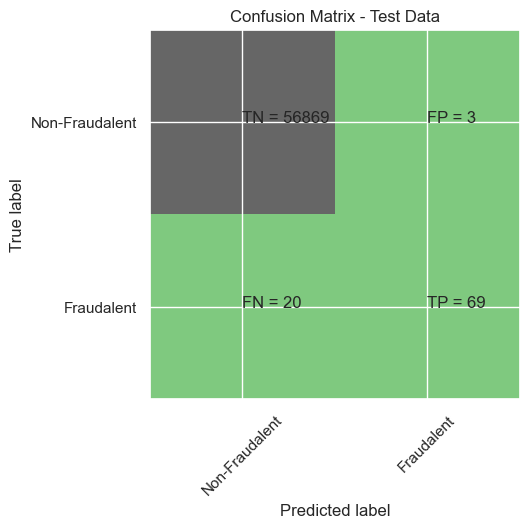

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.96      0.78      0.86        89

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.978969529050847
XGBoost threshold: 0.00014130742056295276
ROC for the test dataset 97.9%


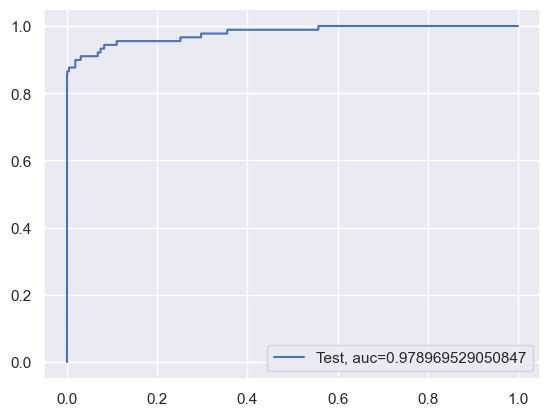

Time Taken by Model: --- 5.244079113006592 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9984726391741718
Confusion Matrix


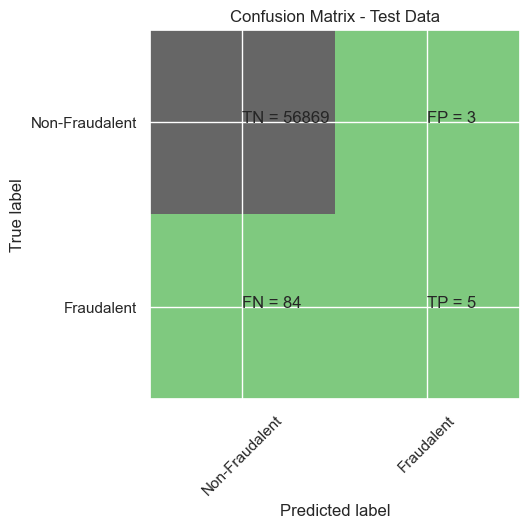

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.62      0.06      0.10        89

    accuracy                           1.00     56961
   macro avg       0.81      0.53      0.55     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.45642768068961487
SVM threshold: 0.00293647864186716
ROC for the test dataset 45.6%


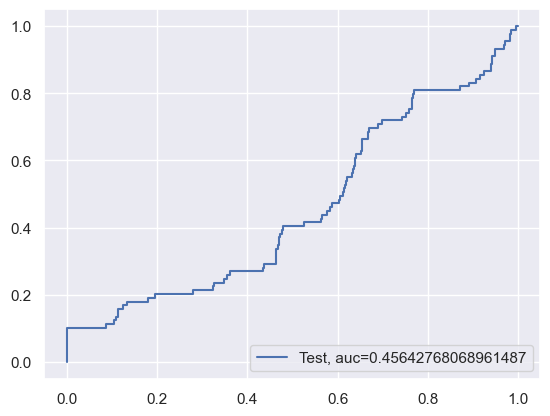

Time Taken by Model: --- 289.63881635665894 seconds ---
--------------------------------------------------------------------------------


In [55]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [56]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   

    Accuracy  roc_value  threshold         Data_Imbalance_Handling  
0   0.998999   0.966806   0.001289               Power Transformer  
1   0.998841   0.963903   0.009276               Power Transformer  
2   0.999298   0.900851   0.200000               Power Transformer  
3   0.998806   0.859015   1.000000               Power Transformer  
4   0.999052   0.864337   1.000000               Power Transformer  
5   0.999350   0.940564   0.010000               Power Transformer  
6   0.999386   0.977586   0.000023               Power Transformer  
7   0.998560   0.891340   0.001311               Power Transformer  
8   0.999070   0.990435   0.001838  RepeatedKFold Cross Validation  
9   0.999157   0.879500   0.046196  RepeatedKFold Cross Validation  
10  0.999350   0.876185   0.200000  RepeatedKFold Cross Validation  
11  0.999210   0.870593   1.000000  RepeatedKFold Cross Validation  
12  0.999087   0.859313   1.000000  RepeatedKFold Cross Validation  
13  0.999491   0.947928   0.020000  RepeatedKFold Cross Validation  
14  0.999596   0.978970   0.000141  RepeatedKFold Cross Validation  
15  0.998473   0.456428   0.002936  RepeatedKFold Cross Validation

# It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value 

In [57]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

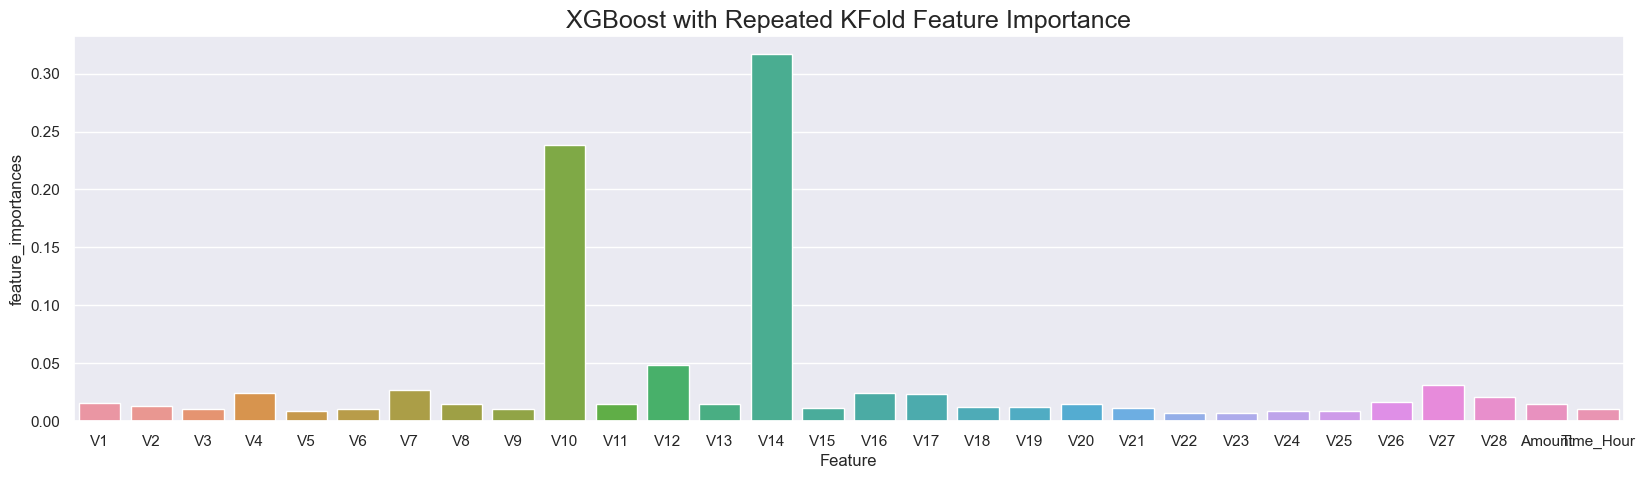

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [59]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


# Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9825772612725892
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularization
[[ 0.00684159  0.06183853 -0.06727856  0.21868952  0.05428118 -0.03203433
  -0.02288827 -0.11503486 -0.06924849 -0.16371528  0.12811167 -0.19238937
  -0.03676911 -0.36055991  0.00341793 -0.08796678 -0.0726498  -0.00065895
   0.00390903 -0.02814429  0.03823499  0.02342351 -0.01161719 -0.00998408
  -0.00657443  0.00630863 -0.01023258 -0.00170232  0.00040051  0.00062125]]
[-7.43234047]
{1: array([[0.69244409, 0.69420715, 0.71448234, 0.83769251, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99130081, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226],
       [0.60698184, 0.60863341, 0.62911463, 0.7688161 , 0.90899478,
        0.94877915, 0.96037283, 0.98250936, 0.98528848, 0.98292108,
        0.97947854, 0.97947854, 0.979478

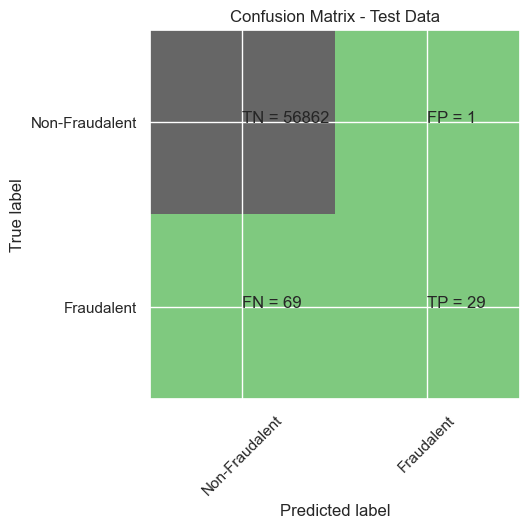

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization : 0.9987535331191517
Confusion Matrix


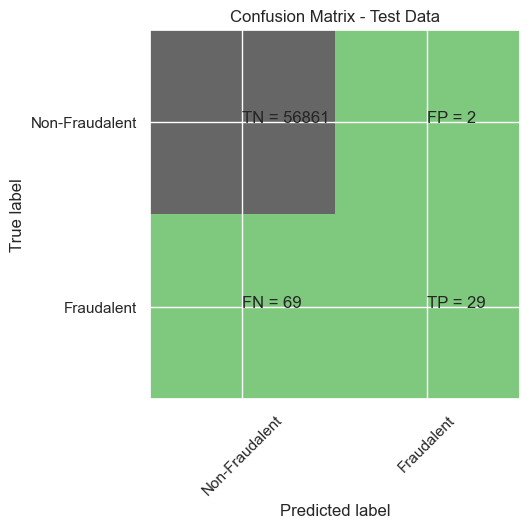

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.9833272738953309
L2 threshold: 0.0015731519624109657
ROC for the test dataset: 98.3%


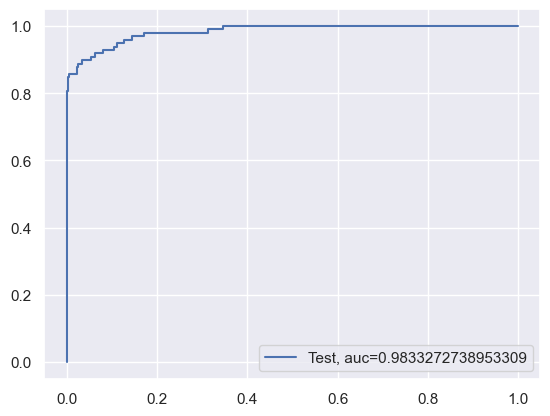

L1 roc_value: 0.8890758561483437
L1 threshold: 0.02108749276779219
ROC for the test dataset: 88.9%


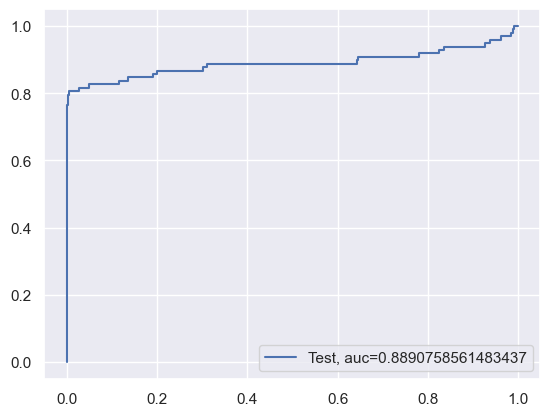

Time Taken by Model: --- 367.3153078556061 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9991924299081828
Confusion Matrix


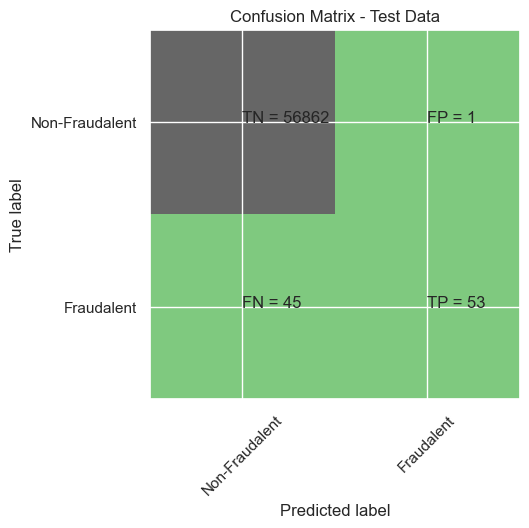

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset: 80.6%


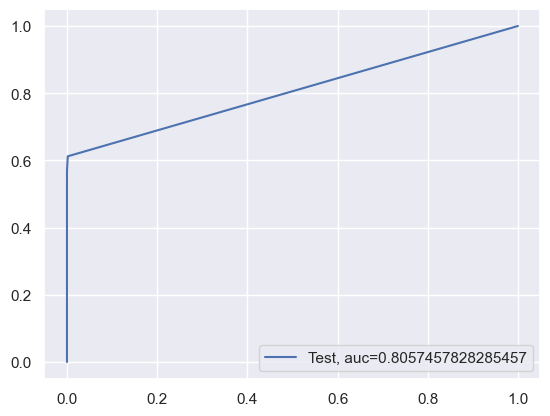

Time Taken by Model: --- 170.97610640525818 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


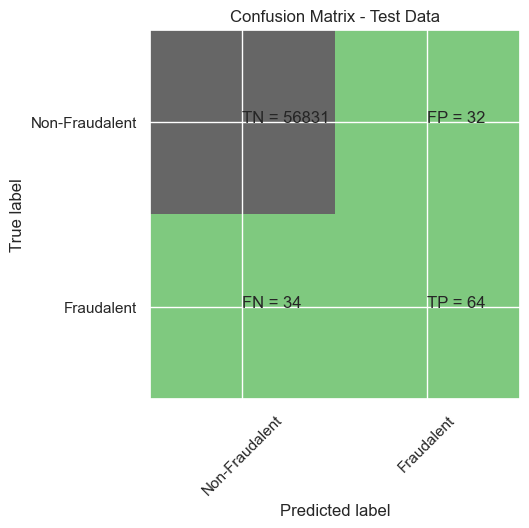

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


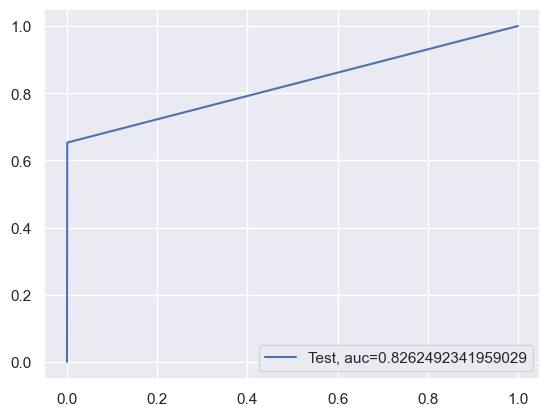

entropy score: 0.9990168711925703
Confusion Matrix


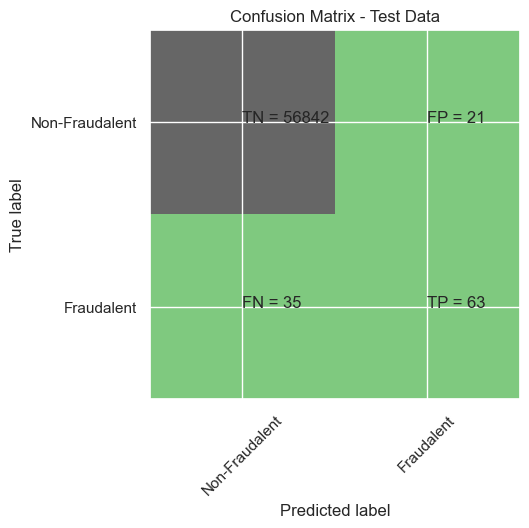

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


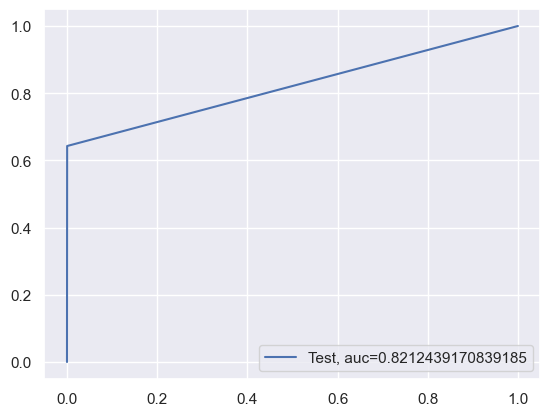

Time Taken by Model: --- 40.23431897163391 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


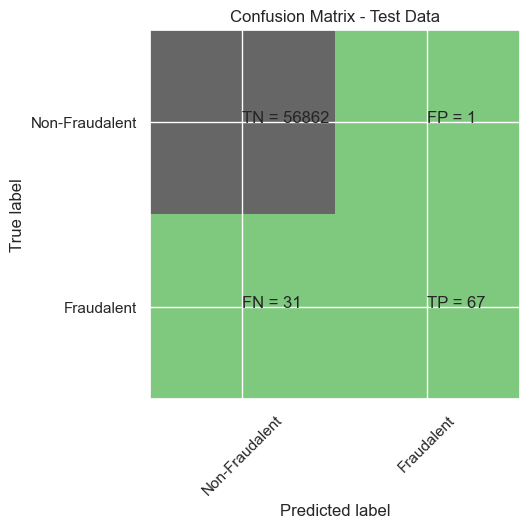

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


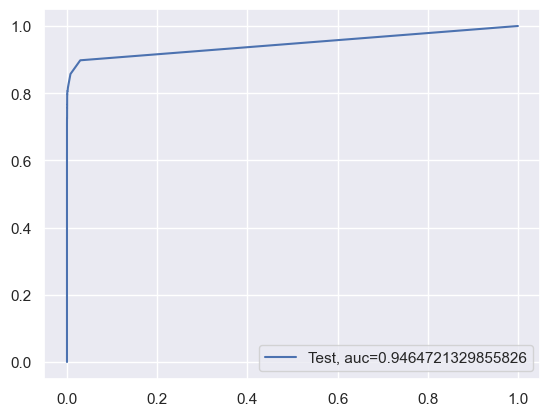

Time Taken by Model: --- 338.06061935424805 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


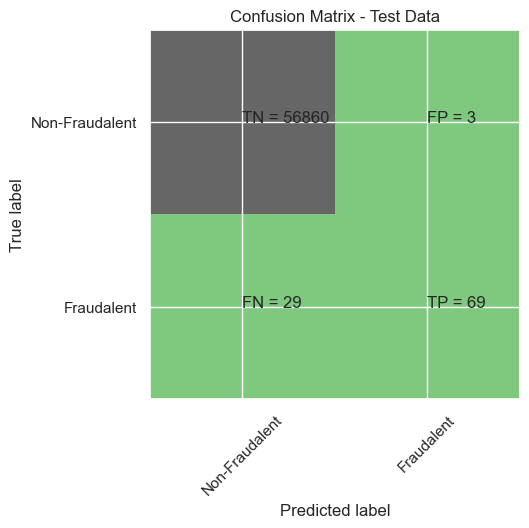

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


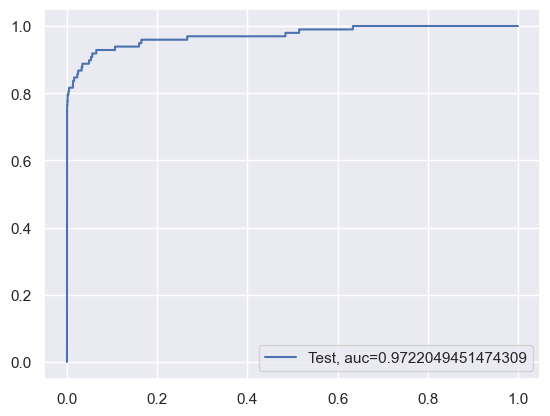

Time Taken by Model: --- 5.479910135269165 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


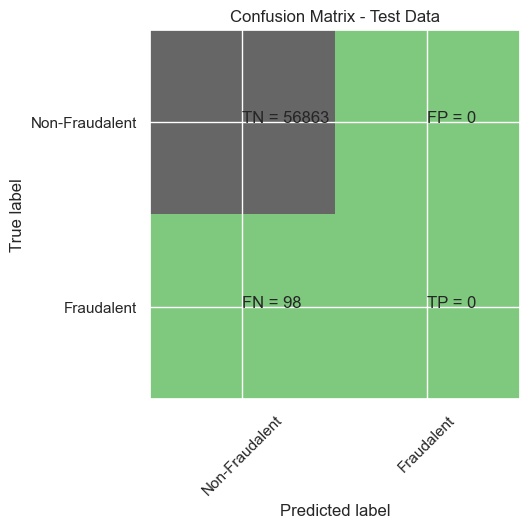

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.004317729871829684
ROC for the test dataset 40.2%


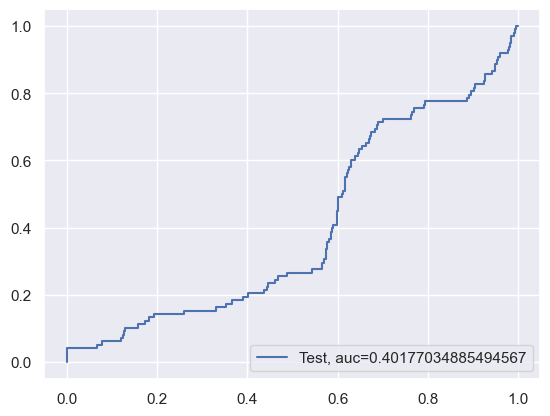

Time Taken by Model: --- 186.79968094825745 seconds ---
--------------------------------------------------------------------------------


In [60]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [61]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   
16                      NaN  Logistic Regression with L2 Regularisation   
17                      NaN  Logistic Regression with L1 Regularisation   
18                      NaN                                         KNN   
19                      NaN               Tree Model with gini criteria   
20                      NaN            Tree Model with entropy criteria   
21                      NaN                               Random Forest   
22                      NaN                                     XGBoost   
23                      NaN                                         SVM   

    Accuracy  roc_value  threshold           Data_Imbalance_Handling  
0   0.998999   0.966806   0.001289                 Power Transformer  
1   0.998841   0.963903   0.009276                 Power Transformer  
2   0.999298   0.900851   0.200000                 Power Transformer  
3   0.998806   0.859015   1.000000                 Power Transformer  
4   0.999052   0.864337   1.000000                 Power Transformer  
5   0.999350   0.940564   0.010000                 Power Transformer  
6   0.999386   0.977586   0.000023                 Power Transformer  
7   0.998560   0.891340   0.001311                 Power Transformer  
8   0.999070   0.990435   0.001838    RepeatedKFold Cross Validation  
9   0.999157   0.879500   0.046196    RepeatedKFold Cross Validation  
10  0.999350   0.876185   0.200000    RepeatedKFold Cross Validation  
11  0.999210   0.870593   1.000000    RepeatedKFold Cross Validation  
12  0.999087   0.859313   1.000000    RepeatedKFold Cross Validation  
13  0.999491   0.947928   0.020000    RepeatedKFold Cross Validation  
14  0.999596   0.978970   0.000141    RepeatedKFold Cross Validation  
15  0.998473   0.456428   0.002936    RepeatedKFold Cross Validation  
16  0.998771   0.983327   0.001573  StratifiedKFold Cross Validation  
17  0.998754   0.889076   0.021087  StratifiedKFold Cross Validation  
18  0.999192   0.805746   0.200000  StratifiedKFold Cross Validation  
19  0.998841   0.826249   1.000000  StratifiedKFold Cross Validation  
20  0.999017   0.821244   1.000000  StratifiedKFold Cross Validation  
21  0.999438   0.946472   0.010000  StratifiedKFold Cross Validation  
22  0.999438   0.972205   0.000038  StratifiedKFold Cross Validation  
23  0.998280   0.401770   0.004318  StratifiedKFold Cross Validation

# **As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [62]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9858007314878634
Parameters for l2 regularisations
[[ 2.07892857e-02  3.26223909e-02 -8.97179176e-02  2.36412393e-01
   8.29301288e-02 -4.90474619e-02 -3.29617627e-02 -1.07717624e-01
  -9.19745692e-02 -1.74705676e-01  1.35527006e-01 -2.07942044e-01
  -4.28269397e-02 -3.77255550e-01 -1.07235663e-02 -1.04606450e-01
  -1.14817419e-01 -8.71744442e-03  1.49358144e-02 -5.48623613e-03
   3.94033485e-02  2.41823802e-02  1.90367683e-03 -1.56872059e-02
  -7.88768501e-03  5.14375520e-03 -3.33742436e-03 -2.03768436e-04
   3.02003675e-04  3.67856149e-03]]
[-7.47785388]
{1: array([[0.58216967, 0.58434192, 0.61022463, 0.77826132, 0.94270322,
        0.98595298, 0.9960218 , 0.99404614, 0.9934466 , 0.99441001,
        0.99441001, 0.99441001, 0.99441001, 0.99441001, 0.99441001,
        0.99441001, 0.99441001, 0.99441001, 0.99441001, 0.99441001],
       [0.56047827, 0.56222739, 0.57884592, 0.72008858, 0.88966742,
        0.93941572, 0.97557056, 0.97440966, 0.97923556, 0.98076878,
  

In [63]:
searchCV_l2.coef_

array([[ 2.07892857e-02,  3.26223909e-02, -8.97179176e-02,
         2.36412393e-01,  8.29301288e-02, -4.90474619e-02,
        -3.29617627e-02, -1.07717624e-01, -9.19745692e-02,
        -1.74705676e-01,  1.35527006e-01, -2.07942044e-01,
        -4.28269397e-02, -3.77255550e-01, -1.07235663e-02,
        -1.04606450e-01, -1.14817419e-01, -8.71744442e-03,
         1.49358144e-02, -5.48623613e-03,  3.94033485e-02,
         2.41823802e-02,  1.90367683e-03, -1.56872059e-02,
        -7.88768501e-03,  5.14375520e-03, -3.33742436e-03,
        -2.03768436e-04,  3.02003675e-04,  3.67856149e-03]])

In [64]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [65]:
coefficients

Feature  Importance Coefficient
0          V1                0.020789
1          V2                0.032622
2          V3               -0.089718
3          V4                0.236412
4          V5                0.082930
5          V6               -0.049047
6          V7               -0.032962
7          V8               -0.107718
8          V9               -0.091975
9         V10               -0.174706
10        V11                0.135527
11        V12               -0.207942
12        V13               -0.042827
13        V14               -0.377256
14        V15               -0.010724
15        V16               -0.104606
16        V17               -0.114817
17        V18               -0.008717
18        V19                0.014936
19        V20               -0.005486
20        V21                0.039403
21        V22                0.024182
22        V23                0.001904
23        V24               -0.015687
24        V25               -0.007888
25        V26                0.005144
26        V27               -0.003337
27        V28               -0.000204
28     Amount                0.000302
29  Time_Hour                0.003679

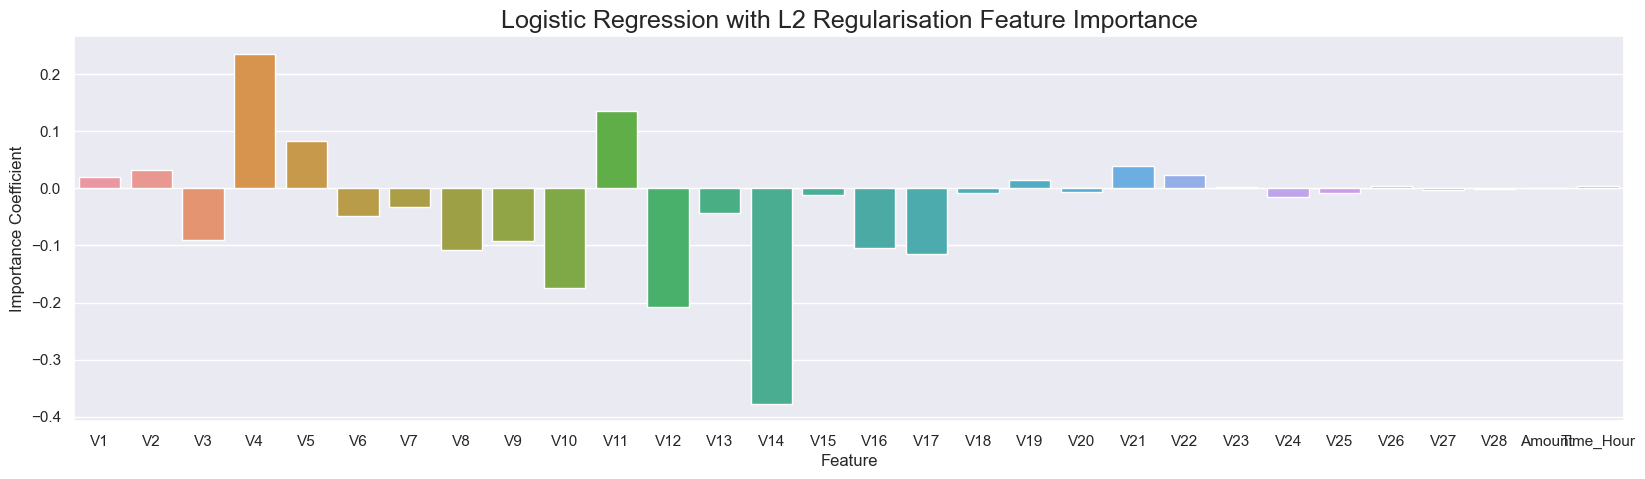

In [66]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [67]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9811839503764995
Max auc_roc for l1: 0.5
Parameters for l2 regularization
[[-0.01928243  0.04454757 -0.09983438  0.14642889  0.02528406 -0.04714375
  -0.05934083 -0.01790028 -0.04619498 -0.10202935  0.08362784 -0.12394979
  -0.01382041 -0.19318514 -0.00871635 -0.0506365  -0.06258677 -0.00489188
  -0.00320181  0.00939214  0.02048386  0.00086339  0.00502069 -0.00501182
   0.00198664 -0.00297736  0.00384733  0.00688062  0.00055466 -0.01121533]]
[-2.04647425]
{1: array([[0.5474359 , 0.54903846, 0.57019231, 0.67788462, 0.87628205,
        0.9474359 , 0.97692308, 0.98589744, 0.9875    , 0.98685897,
        0.98814103, 0.98814103, 0.98814103, 0.98814103, 0.98814103,
        0.98814103, 0.98814103, 0.98814103, 0.98814103, 0.98814103],
       [0.4619883 , 0.46458739, 0.48408057, 0.5899935 , 0.79109812,
        0.89798571, 0.94119558, 0.95646524, 0.95808967, 0.95906433,
        0.95906433, 0.95906433, 0.95906433, 0.95906433,

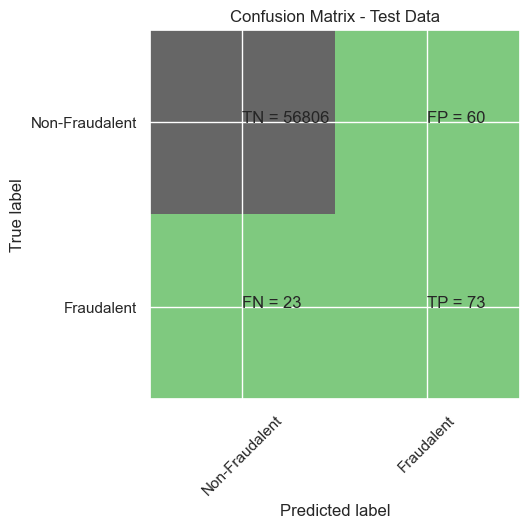

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.55      0.76      0.64        96

    accuracy                           1.00     56962
   macro avg       0.77      0.88      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic model with L1 regularization : 0.9983146659176293
Confusion Matrix


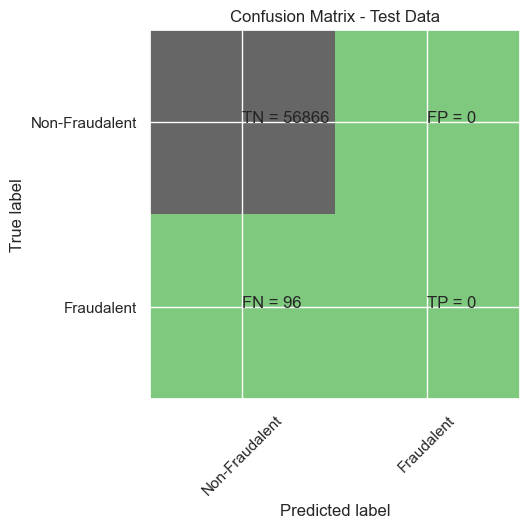

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

L2 roc_value: 0.9687001752658296
L2 threshold: 0.1477829953366224
ROC for the test dataset: 96.9%


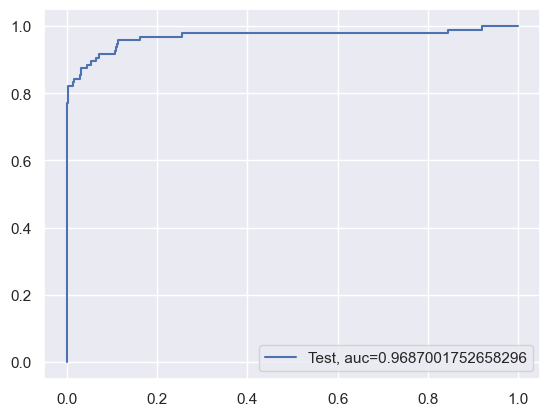

L1 roc_value: 0.5
L1 threshold: 1.5
ROC for the test dataset: 50.0%


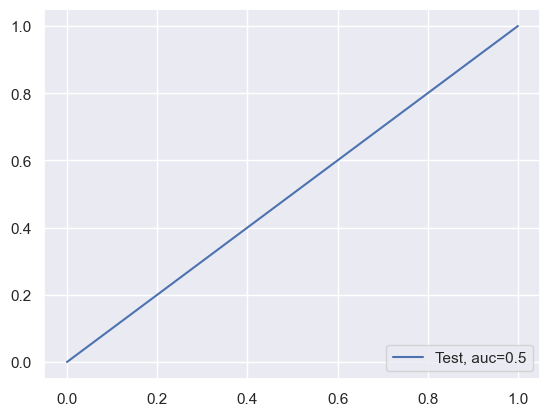

Time Taken by Model: --- 3.687185049057007 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9725430989080439
Confusion Matrix


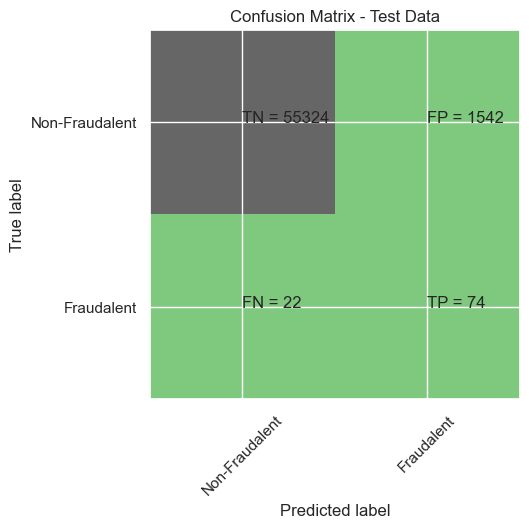

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.77      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.87      0.54     56962
weighted avg       1.00      0.97      0.98     56962

KNN roc_value: 0.9413118669327895
KNN threshold: 0.4
ROC for the test dataset: 94.1%


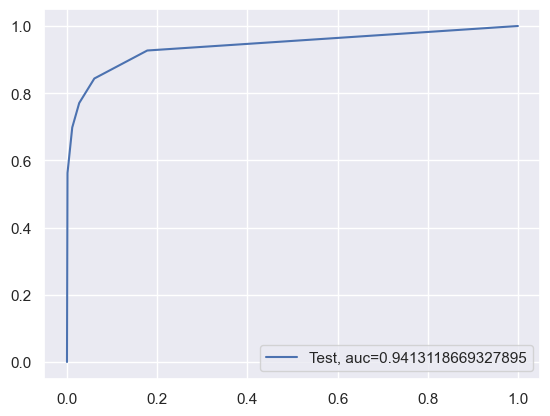

Time Taken by Model: --- 13.472875833511353 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9319721919876409
Confusion Matrix


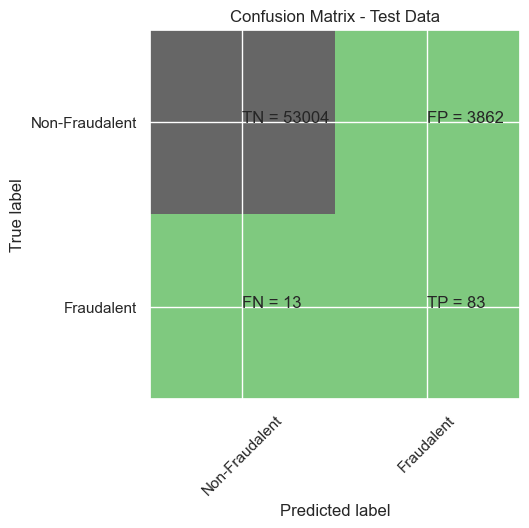

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56866
           1       0.02      0.86      0.04        96

    accuracy                           0.93     56962
   macro avg       0.51      0.90      0.50     56962
weighted avg       1.00      0.93      0.96     56962

gini tree_roc_value: 0.8983346448961887
Tree threshold: 1.0
ROC for the test dataset 89.8%


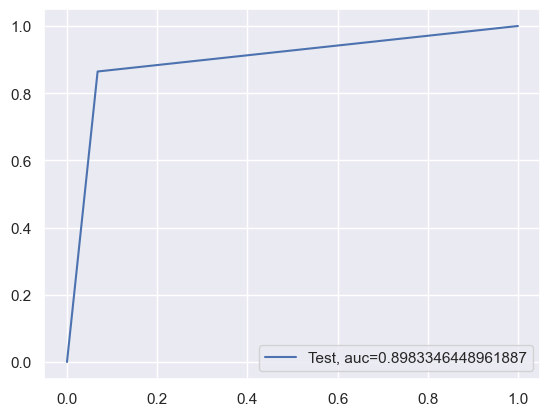

entropy score: 0.9493873108388048
Confusion Matrix


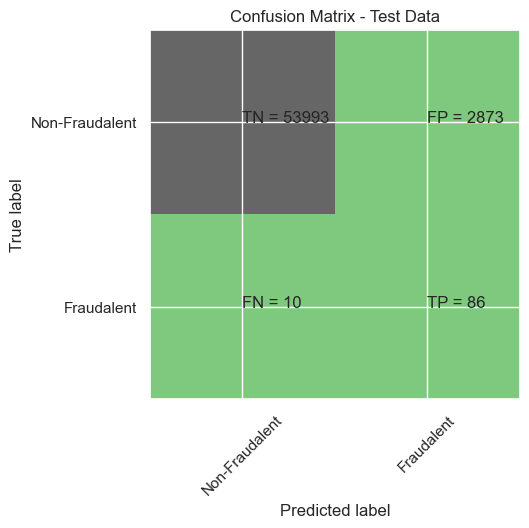

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.90      0.06        96

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962

entropy tree_roc_value: 0.9226555264422797
Tree threshold: 1.0
ROC for the test dataset 92.3%


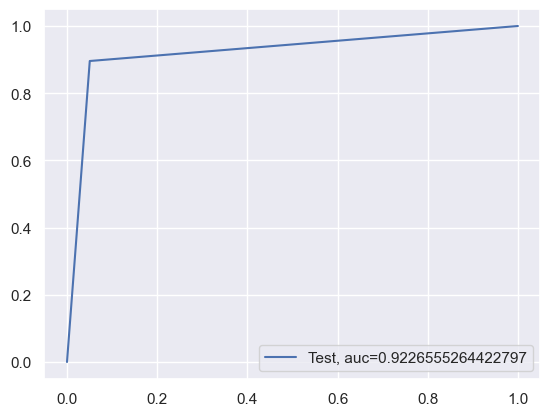

Time Taken by Model: --- 2.197777509689331 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9903444401530845
Confusion Matrix


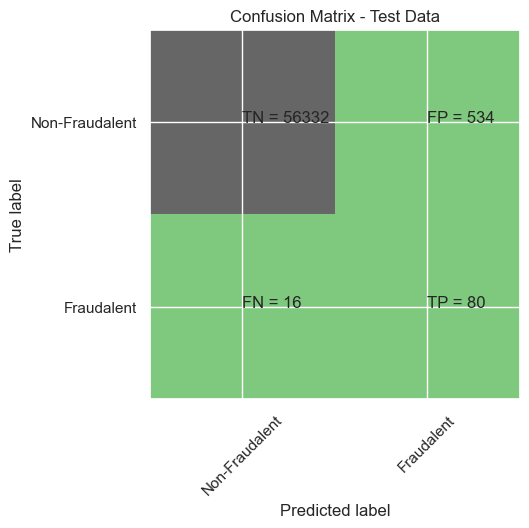

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.13      0.83      0.23        96

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9762074987690359
Random Forest threshold: 0.26
ROC for the test dataset 97.6%


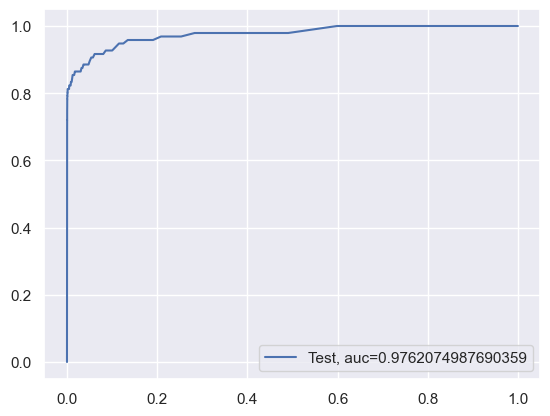

Time Taken by Model: --- 5.242565870285034 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9859906604402935
Confusion Matrix


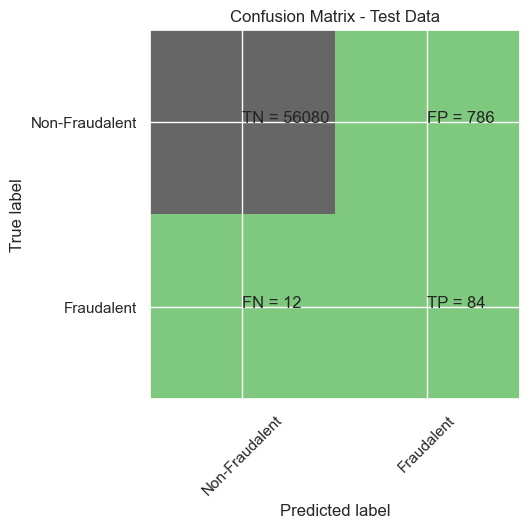

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.88      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.99      0.99     56962

XGBoost roc_value: 0.9780238118266333
XGBoost threshold: 0.19408154487609863
ROC for the test dataset 97.8%


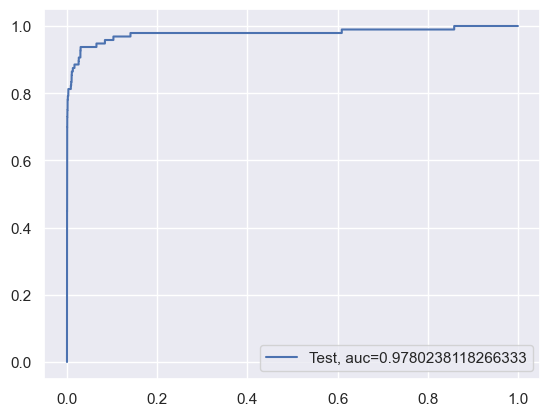

Time Taken by Model: --- 1.1993250846862793 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.7696534531793126
Confusion Matrix


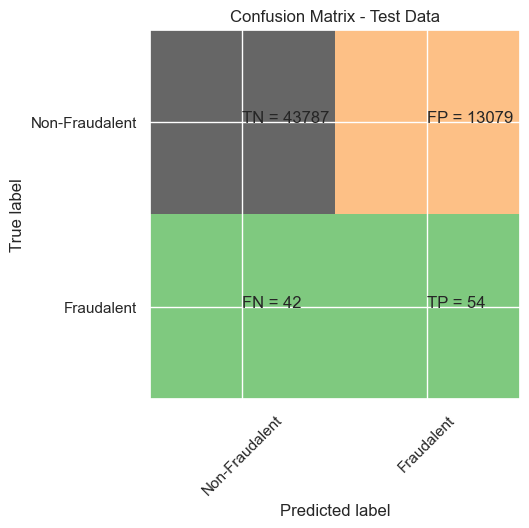

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56866
           1       0.00      0.56      0.01        96

    accuracy                           0.77     56962
   macro avg       0.50      0.67      0.44     56962
weighted avg       1.00      0.77      0.87     56962

SVM roc_value: 0.6827085824570042
SVM threshold: 0.3383000383706306
ROC for the test dataset 68.3%


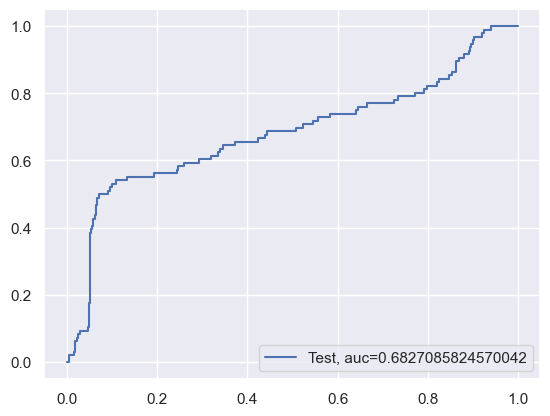

Time Taken by Model: --- 5.140100717544556 seconds ---
--------------------------------------------------------------------------------


In [68]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [69]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   
16                      NaN  Logistic Regression with L2 Regularisation   
17                      NaN  Logistic Regression with L1 Regularisation   
18                      NaN                                         KNN   
19                      NaN               Tree Model with gini criteria   
20                      NaN            Tree Model with entropy criteria   
21                      NaN                               Random Forest   
22                      NaN                                     XGBoost   
23                      NaN                                         SVM   
24                      NaN  Logistic Regression with L2 Regularisation   
25                      NaN  Logistic Regression with L1 Regularisation   
26                      NaN                                         KNN   
27                      NaN               Tree Model with gini criteria   
28                      NaN            Tree Model with entropy criteria   
29                      NaN                               Random Forest   
30                      NaN                                     XGBoost   
31                      NaN                                         SVM   

    Accuracy  roc_value  threshold           Data_Imbalance_Handling  
0   0.998999   0.966806   0.001289                 Power Transformer  
1   0.998841   0.963903   0.009276                 Power Transformer  
2   0.999298   0.900851   0.200000                 Power Transformer  
3   0.998806   0.859015   1.000000                 Power Transformer  
4   0.999052   0.864337   1.000000                 Power Transformer  
5   0.999350   0.940564   0.010000                 Power Transformer  
6   0.999386   0.977586   0.000023                 Power Transformer  
7   0.998560   0.891340   0.001311                 Power Transformer  
8   0.999070   0.990435   0.001838    RepeatedKFold Cross Validation  
9   0.999157   0.879500   0.046196    RepeatedKFold Cross Validation  
10  0.999350   0.876185   0.200000    RepeatedKFold Cross Validation  
11  0.999210   0.870593   1.000000    RepeatedKFold Cross Validation  
12  0.999087   0.859313   1.000000    RepeatedKFold Cross Validation  
13  0.999491   0.947928   0.020000    RepeatedKFold Cross Validation  
14  0.999596   0.978970   0.000141    RepeatedKFold Cross Validation  
15  0.998473   0.456428   0.002936    RepeatedKFold Cross Validation  
16  0.998771   0.983327   0.001573  StratifiedKFold Cross Validation  
17  0.998754   0.889076   0.021087  StratifiedKFold Cross Validation  
18  0.999192   0.805746   0.200000  StratifiedKFold Cross Validation  
19  0.998841   0.826249   1.000000  StratifiedKFold Cross Validation  
20  0.999017   0.821244   1.000000  

**It seems Undersampling has impoved the XGBoost Results**

# Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the Random Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [70]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [71]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9861537068868345
Max auc_roc for l1: 0.5
Parameters for l2 regularization
[[ 0.38165419  0.39192036  0.27963827  0.84120702  0.35395918 -0.49623883
  -0.34846849 -0.33357079 -0.21073688 -0.66578071  0.29533611 -0.92038621
  -0.29744181 -0.90730006  0.00385438 -0.53369959 -0.32039895 -0.12864669
   0.12403228 -0.71187821  0.06951132  0.54913827  0.14419961 -0.41952067
   0.19472155 -0.05088735 -0.32799091  0.19336585  0.00561235  0.0426331 ]]
[-5.15091451]
{1: array([[0.63320186, 0.76033684, 0.90595826, 0.95507823, 0.97597961,
        0.98361495, 0.98513686, 0.98575578, 0.98611734, 0.98622846,
        0.98624397, 0.98624397, 0.98624397, 0.98624397, 0.98624397,
        0.98624397, 0.98624397, 0.98624397, 0.98624397, 0.98624397],
       [0.62728057, 0.75372122, 0.90143291, 0.95317698, 0.97488861,
        0.98326851, 0.98490672, 0.98529822, 0.98560077, 0.98569101,
        0.985714  , 0.985714  , 0.985714  , 0.985714  ,

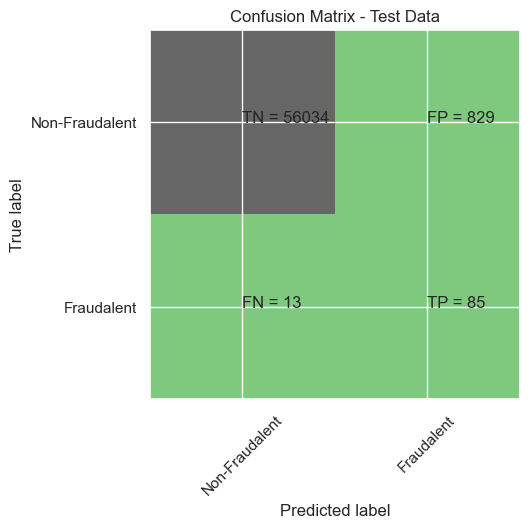

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of Logistic model with L1 regularization : 0.9982795245869981
Confusion Matrix


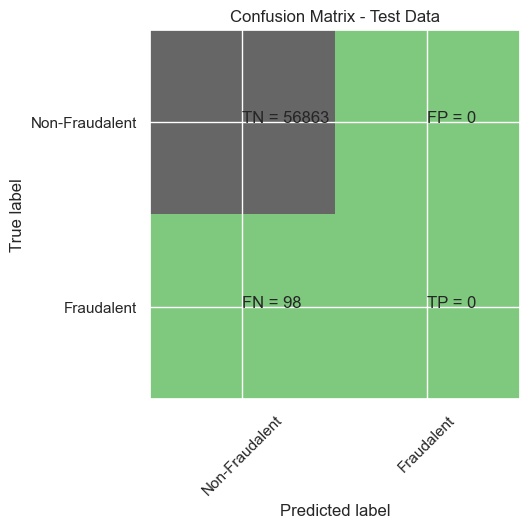

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.9807848222383408
L2 threshold: 0.4487182564955332
ROC for the test dataset: 98.1%


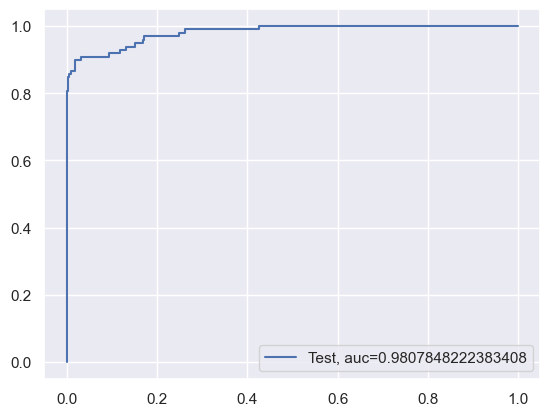

L1 roc_value: 0.5
L1 threshold: 1.5
ROC for the test dataset: 50.0%


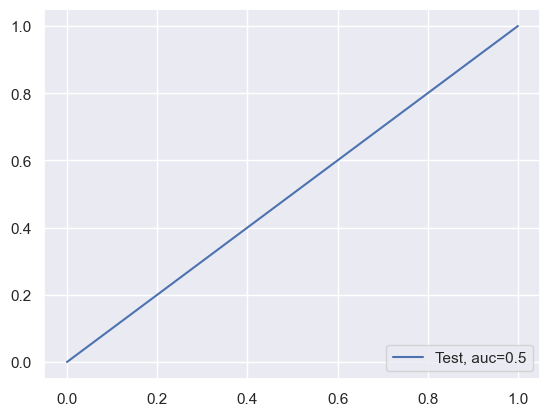

Time Taken by Model: --- 502.6169102191925 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9980688541282632
Confusion Matrix


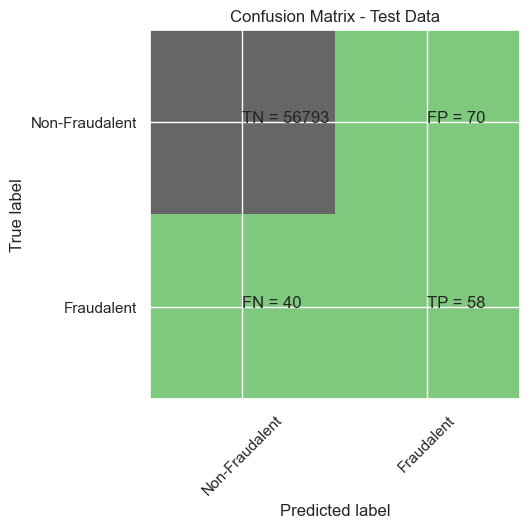

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset: 80.6%


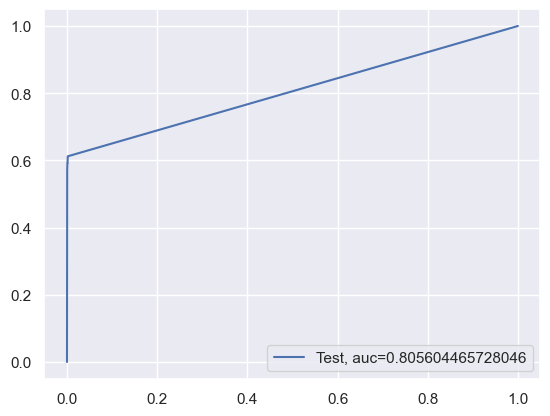

Time Taken by Model: --- 462.2774558067322 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988588683485191
Confusion Matrix


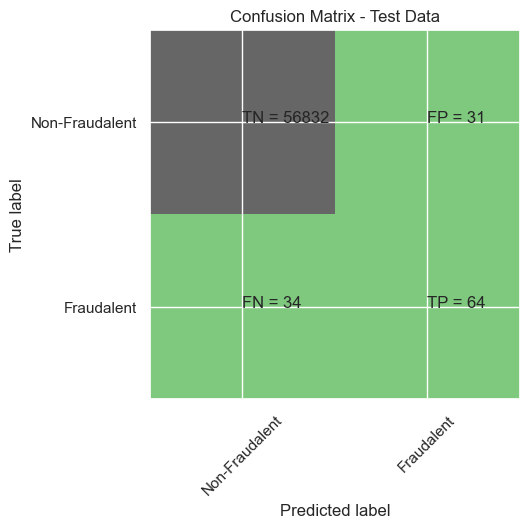

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.84      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.826258027259934
Tree threshold: 1.0
ROC for the test dataset 82.6%


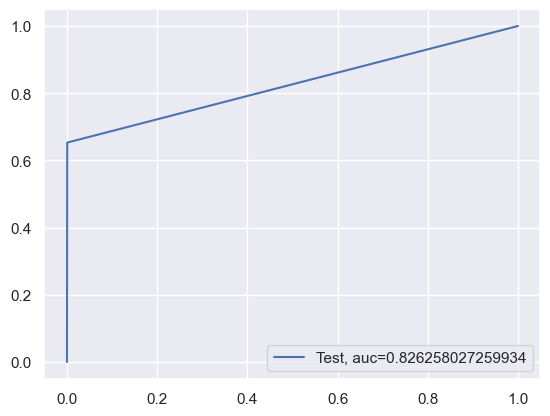

entropy score: 0.9992626533944278
Confusion Matrix


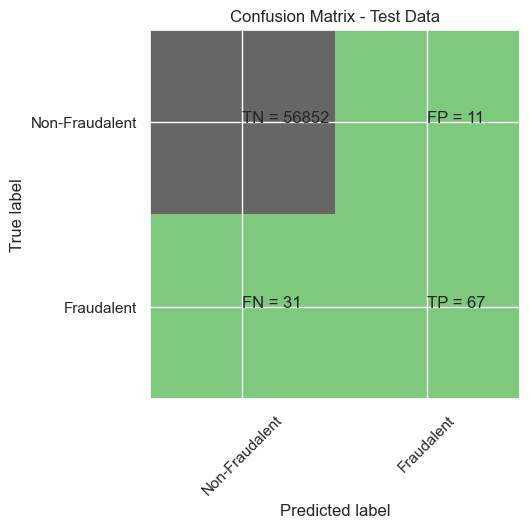

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.68      0.76        98

    accuracy                           1.00     56961
   macro avg       0.93      0.84      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417400109895357
Tree threshold: 1.0
ROC for the test dataset 84.2%


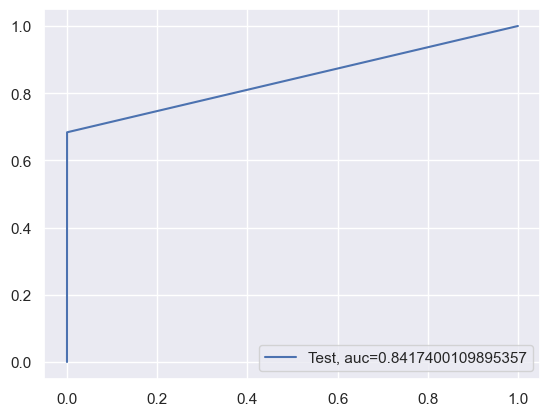

Time Taken by Model: --- 46.9137818813324 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


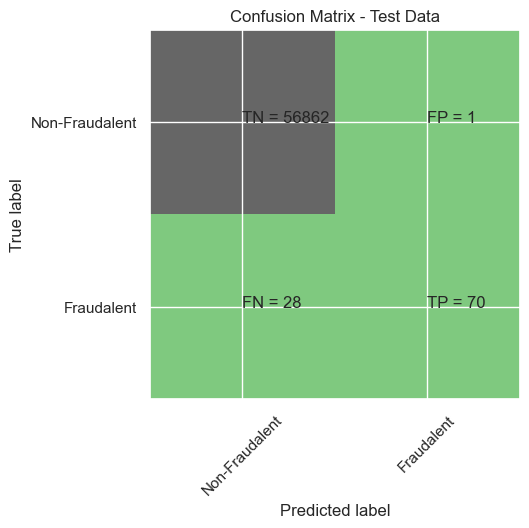

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9459329746002476
Random Forest threshold: 0.02
ROC for the test dataset 94.6%


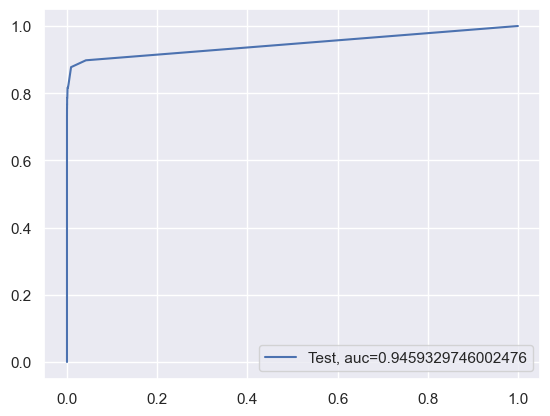

Time Taken by Model: --- 234.77371263504028 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


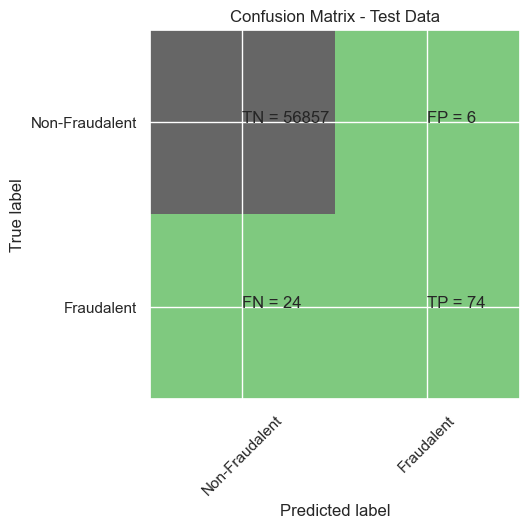

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9748164851646653
XGBoost threshold: 0.00025313295191153884
ROC for the test dataset 97.5%


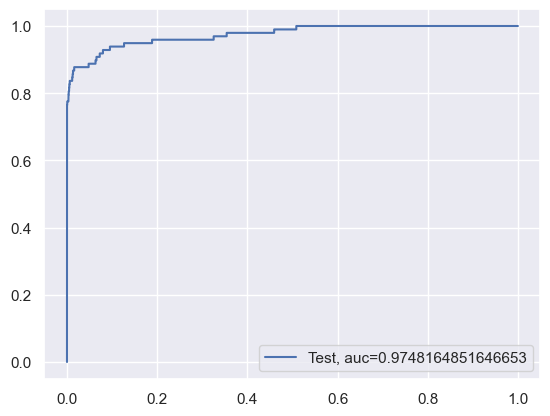

Time Taken by Model: --- 14.31488561630249 seconds ---
--------------------------------------------------------------------------------


In [72]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [73]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   
16                      NaN  Logistic Regression with L2 Regularisation   
17                      NaN  Logistic Regression with L1 Regularisation   
18                      NaN                                         KNN   
19                      NaN               Tree Model with gini criteria   
20                      NaN            Tree Model with entropy criteria   
21                      NaN                               Random Forest   
22                      NaN                                     XGBoost   
23                      NaN                                         SVM   
24                      NaN  Logistic Regression with L2 Regularisation   
25                      NaN  Logistic Regression with L1 Regularisation   
26                      NaN                                         KNN   
27                      NaN               Tree Model with gini criteria   
28                      NaN            Tree Model with entropy criteria   
29                      NaN                               Random Forest   
30                      NaN                                     XGBoost   
31                      NaN                                         SVM   
32                      NaN  Logistic Regression with L2 Regularisation   
33                      NaN  Logistic Regression with L1 Regularisation   
34                      NaN                                         KNN   
35                      NaN               Tree Model with gini criteria   
36                      NaN            Tree Model with entropy criteria   
37                      NaN                               Random Forest   
38                      NaN                                     XGBoost   

    Accuracy  roc_value  threshold  \
0   0.998999   0.966806   0.001289   
1   0.998841   0.963903   0.009276   
2   0.999298   0.900851   0.200000   
3   0.998806   0.859015   1.000000   
4   0.999052   0.864337   1.000000   
5   0.999350   0.940564   0.010000   
6   0.999386   0.977586   0.000023   
7   0.998560   0.891340   0.001311   
8   0.999070   0.990435   0.001838   
9   0.999157   0.879500   0.046196   
10  0.999350   0.876185   0.200000   
11  0.999210   0.870593   1.000000   
12  0.999087   0.859313   1.000000   
13  0.999491   0.947928   0.020000   
14  0.999596   0.978970   0.000141   
15  0.998473   0.456428   0.002936   
16  0.998771   0.983327   0.001573   
17  0.998754   0.889076   0.021087   
18  0.999192   0.805746   0.200000   
19  0.998841   0.826249   1.000000   
20  0.999017   0.821244   1.000000   
21  0.999438   0.946472   0.010000   
22  0.999438   0.972205   0.000038   
23  0.998280   0.401770   0.004318   
24  0.998543   0.968700   0.147783   
25  0.998315  

## Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

# Print the class distribution after applying SMOTE 

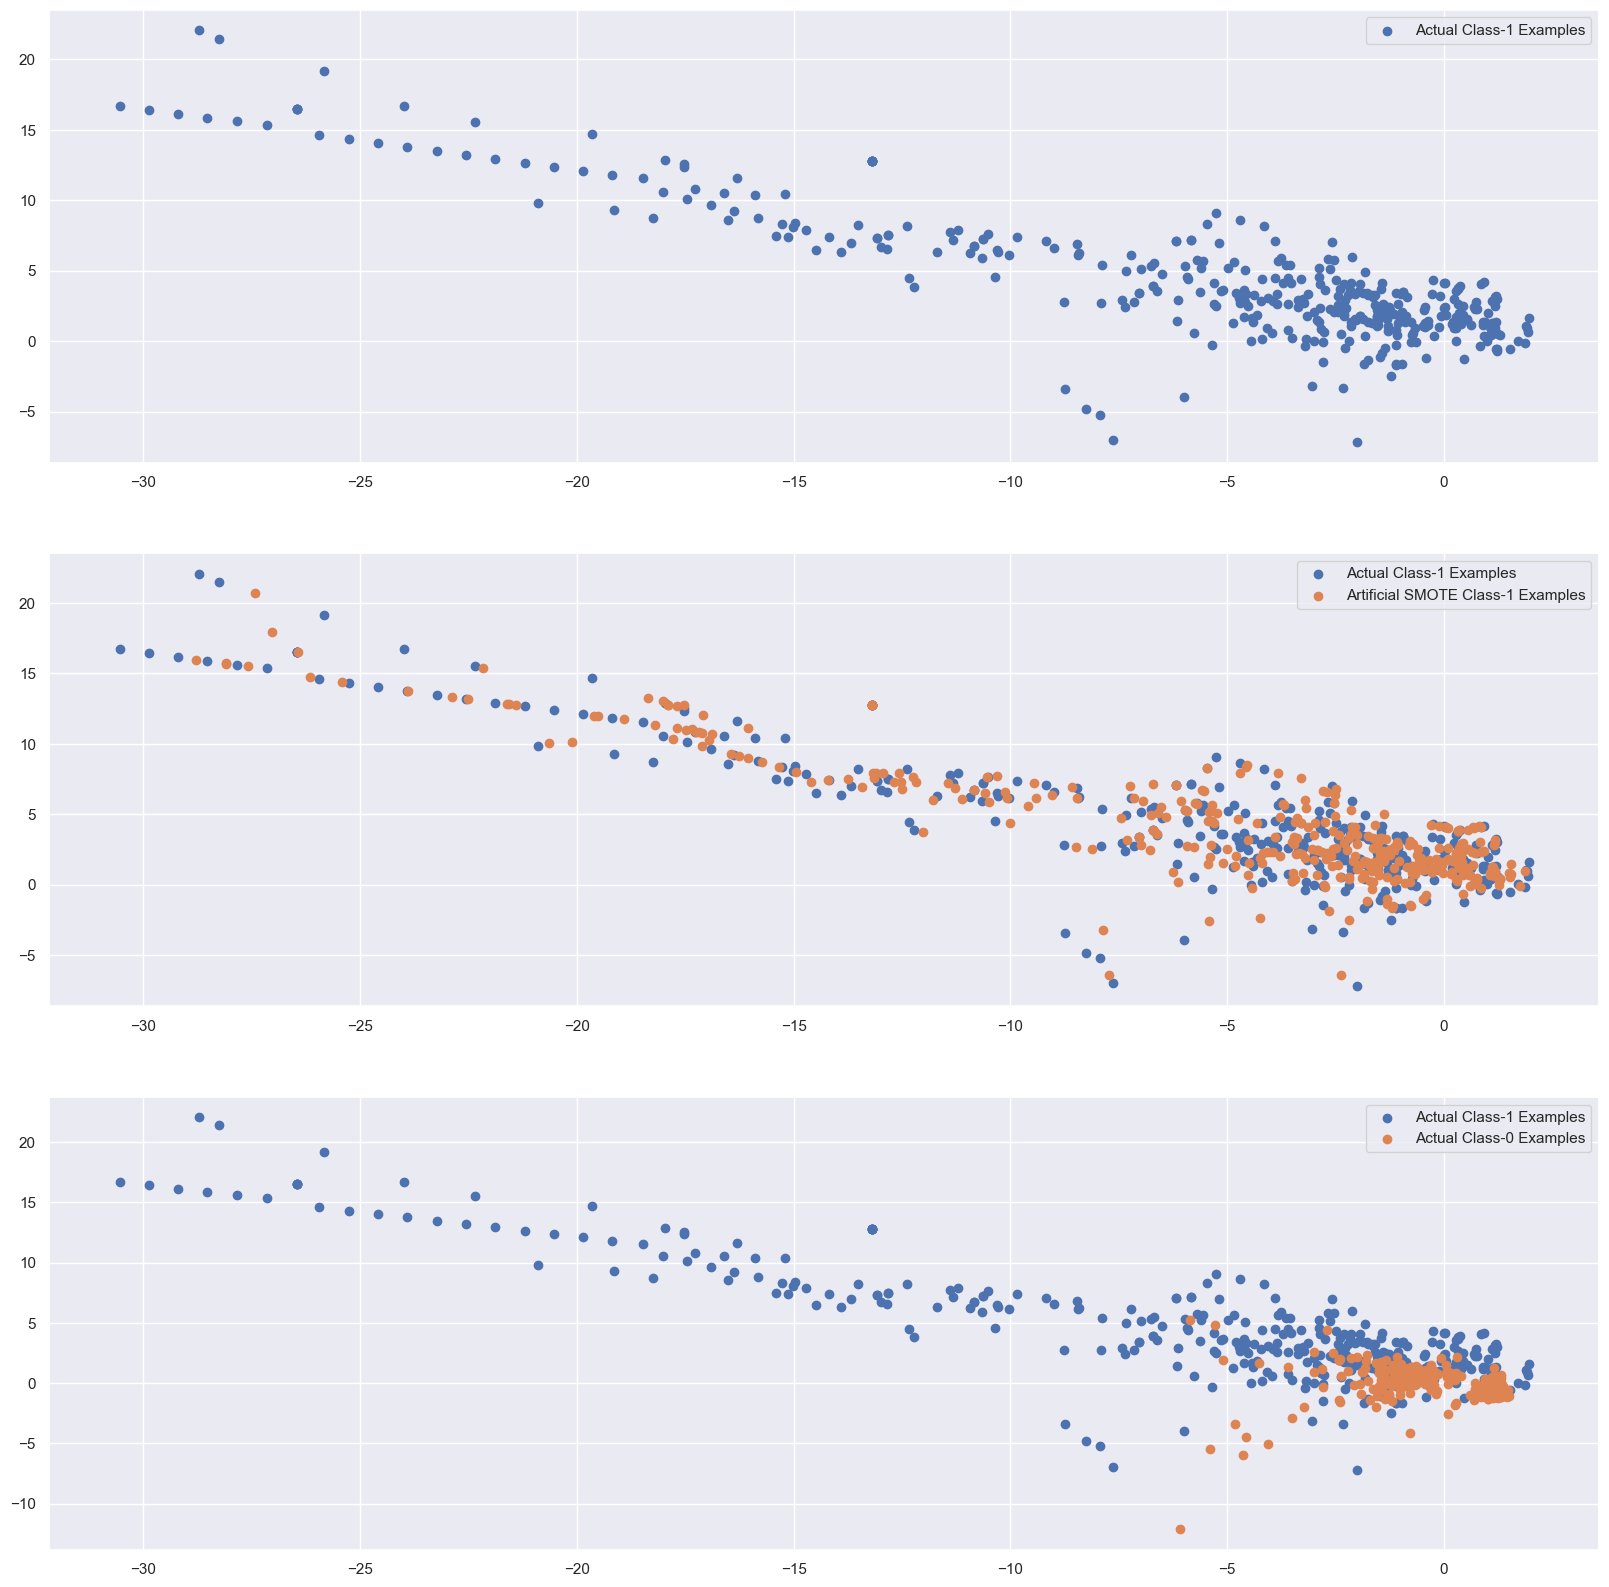

In [74]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are already defined
# cols should be defined as the column names of X_train
cols = X_train.columns

# Applying SMOTE
smote = SMOTE(random_state=0)
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

# Create dataframe with the synthetic samples
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

# Get the synthetic minority samples created by SMOTE
X_train_smote_1 = X_train_Smote.iloc[X_train.shape[0]:].to_numpy()

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [75]:
from imblearn.over_sampling import SMOTE
# StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    smote = SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)
  
    # Create DataFrame for X_train_Smote
    X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=X.columns)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9930146364892787
Max auc_roc for l1: 0.5
Parameters for l2 regularization
[[ 0.77301413  0.70994595  0.68897416  0.93836285  0.49726665 -0.93773053
  -0.69732885 -0.50685071 -0.42319638 -0.92045127  0.61725068 -1.25046802
  -0.23826741 -1.52836306  0.12540894 -0.78259227 -0.84408469 -0.43406163
   0.22154868 -1.08399755 -0.02374599  0.56552103  0.40559864 -0.91707769
   0.50607628  0.03409639 -0.18210601  0.84920533  0.00904263  0.0110401 ]]
[-5.30128143]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520455, 0.98466299,
        0.98956394, 0.99070011, 0.99160715, 0.99196057, 0.99205791,
        0.99206755, 0.99206755, 0.99206755, 0.99206755, 0.99206755,
        0.99206755, 0.99206755, 0.99206755, 0.99206755, 0.99206755],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766059, 0.98636753,
        0.99079354, 0.99182711, 0.99273061, 0.99311472, 0.99320763,
        0.9932216 , 0.9932216 , 0.9932216 , 0.9932216 ,

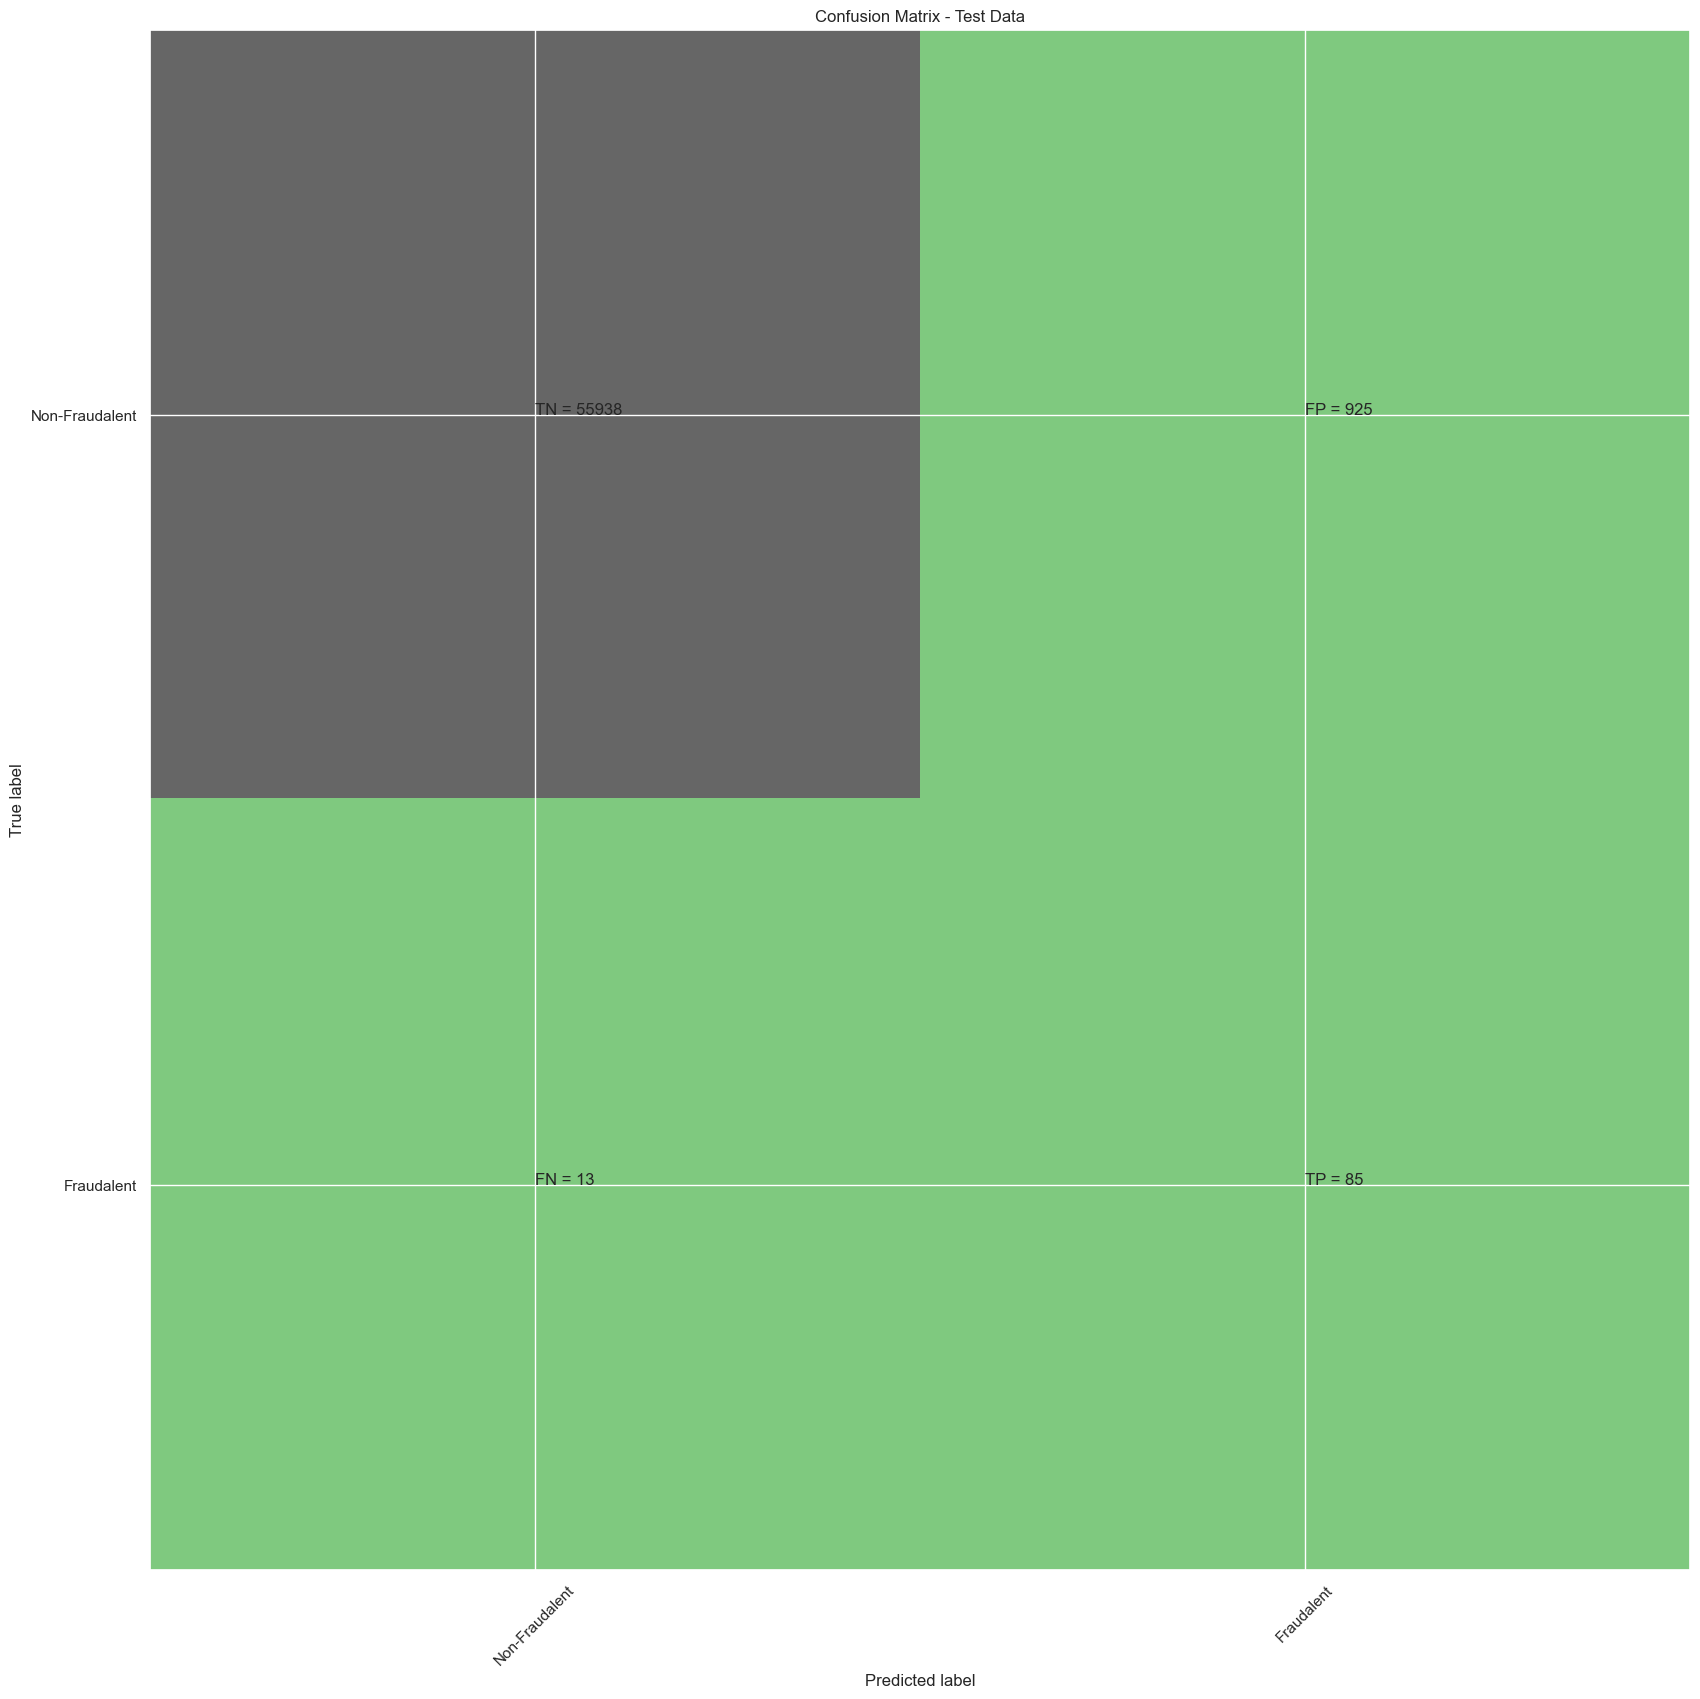

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy of Logistic model with L1 regularization : 0.9982795245869981
Confusion Matrix


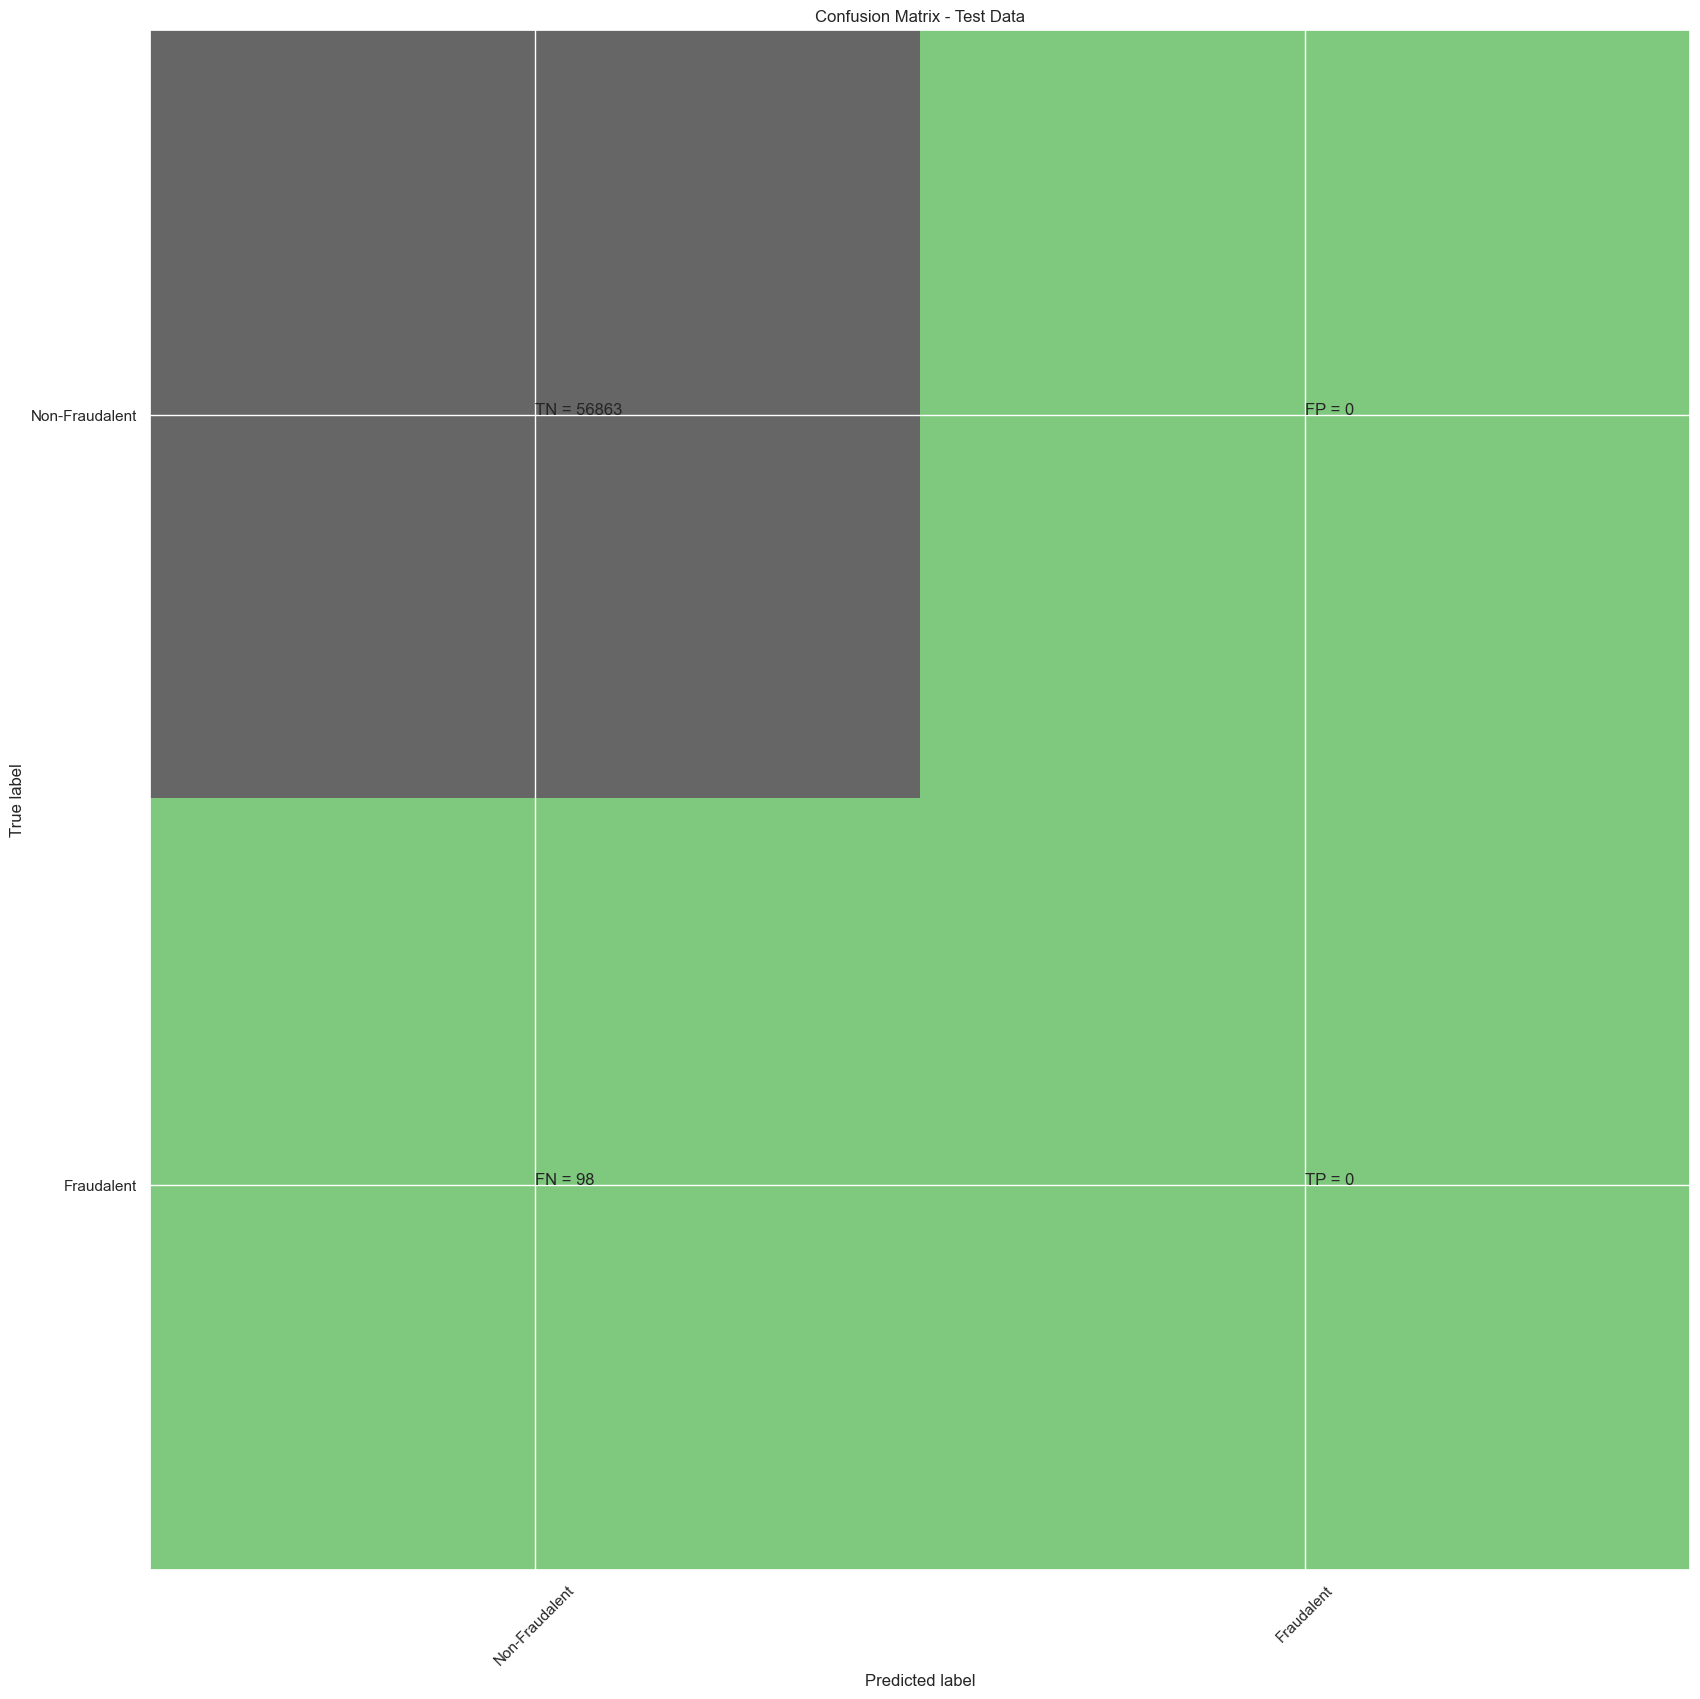

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.9745816744649779
L2 threshold: 0.3939438124834028
ROC for the test dataset: 97.5%


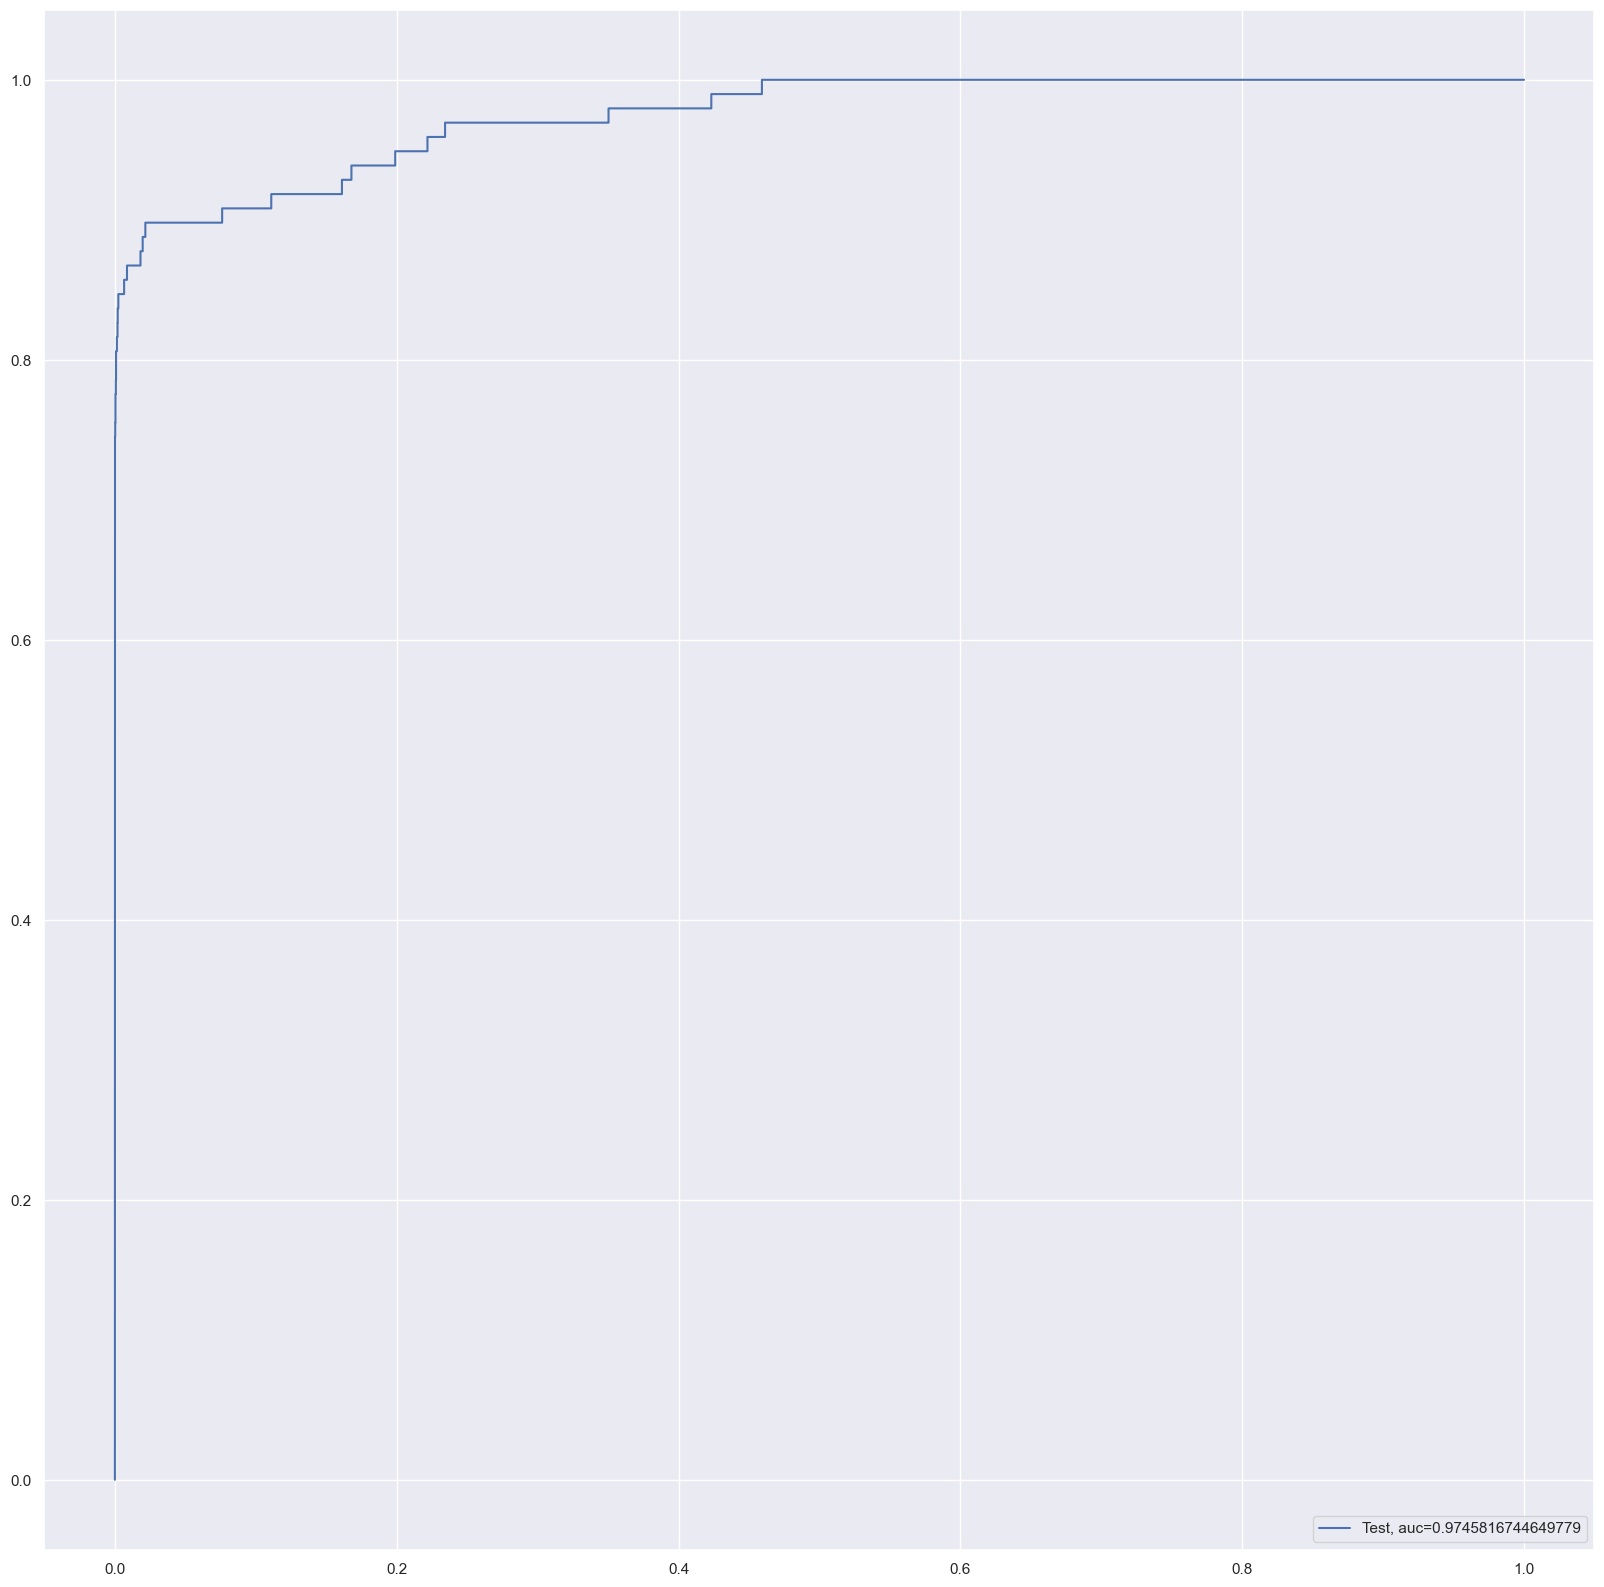

L1 roc_value: 0.5
L1 threshold: 1.5
ROC for the test dataset: 50.0%


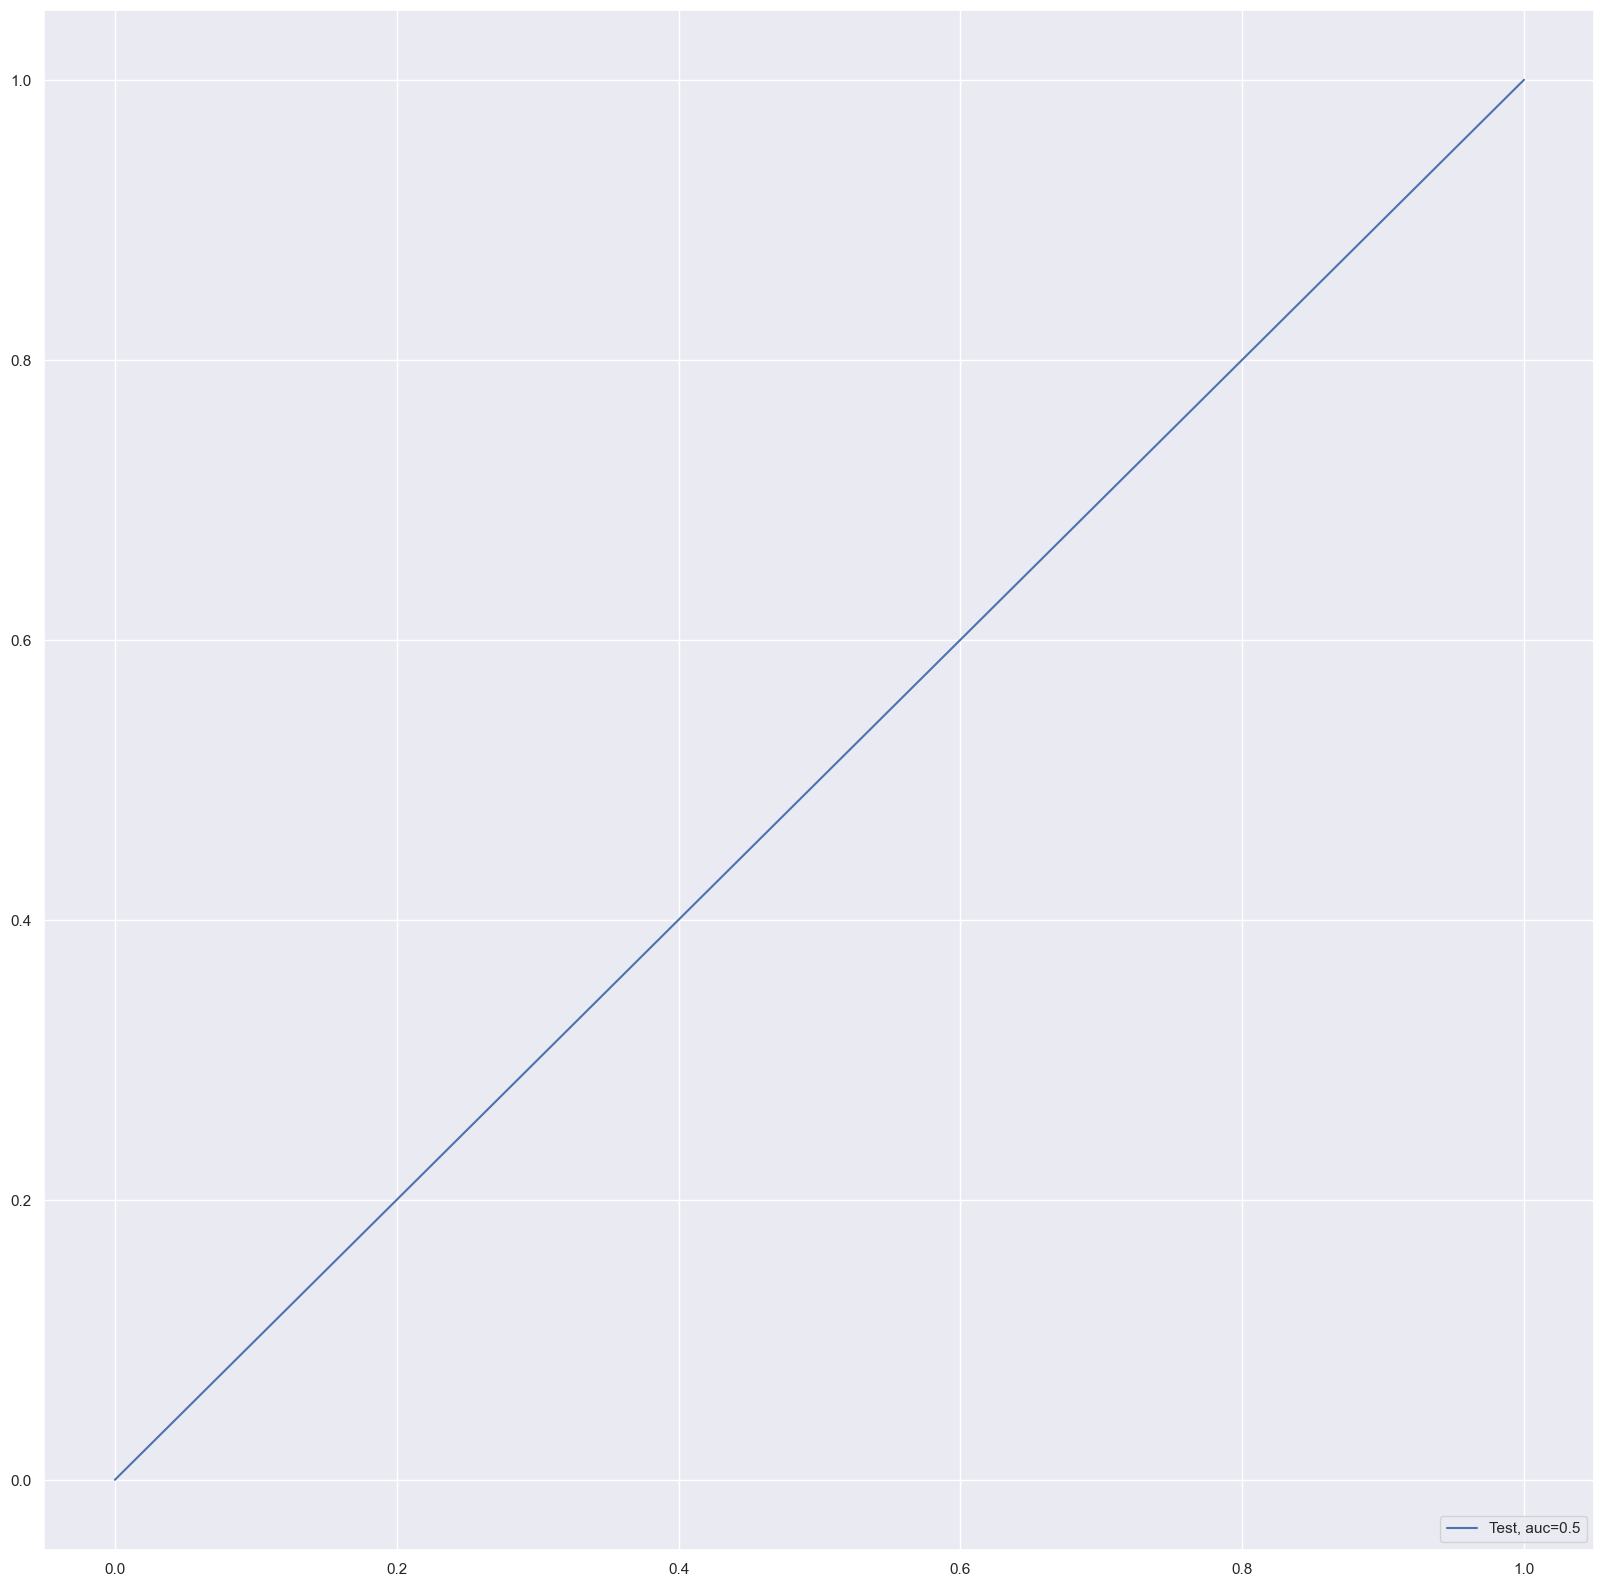

Time Taken by Model: --- 711.0418615341187 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9946805709169432
Confusion Matrix


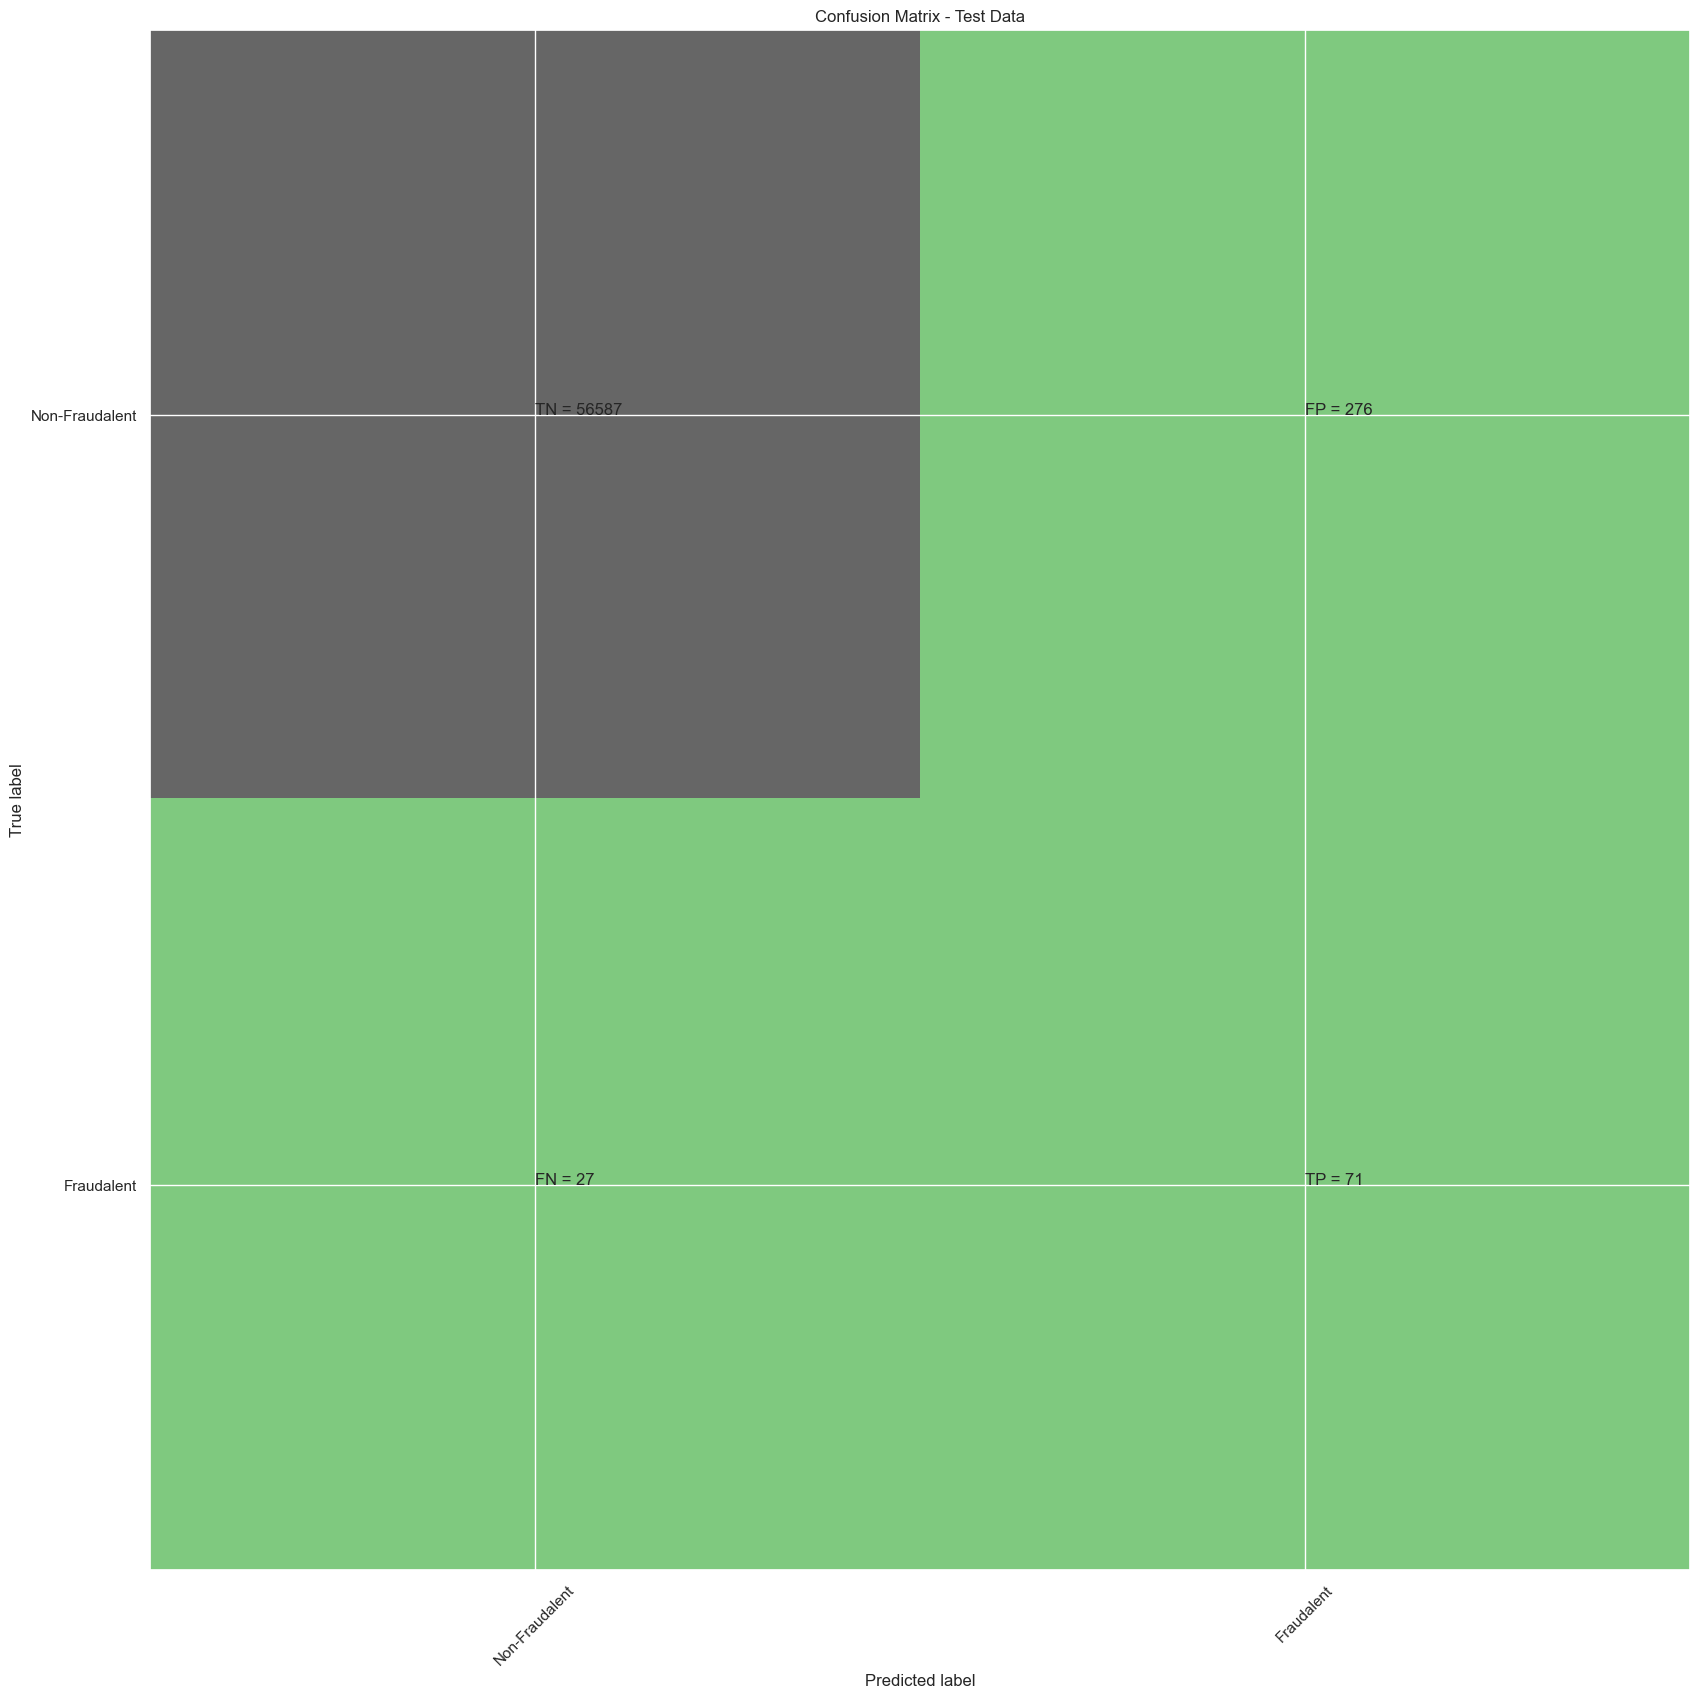

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset: 86.0%


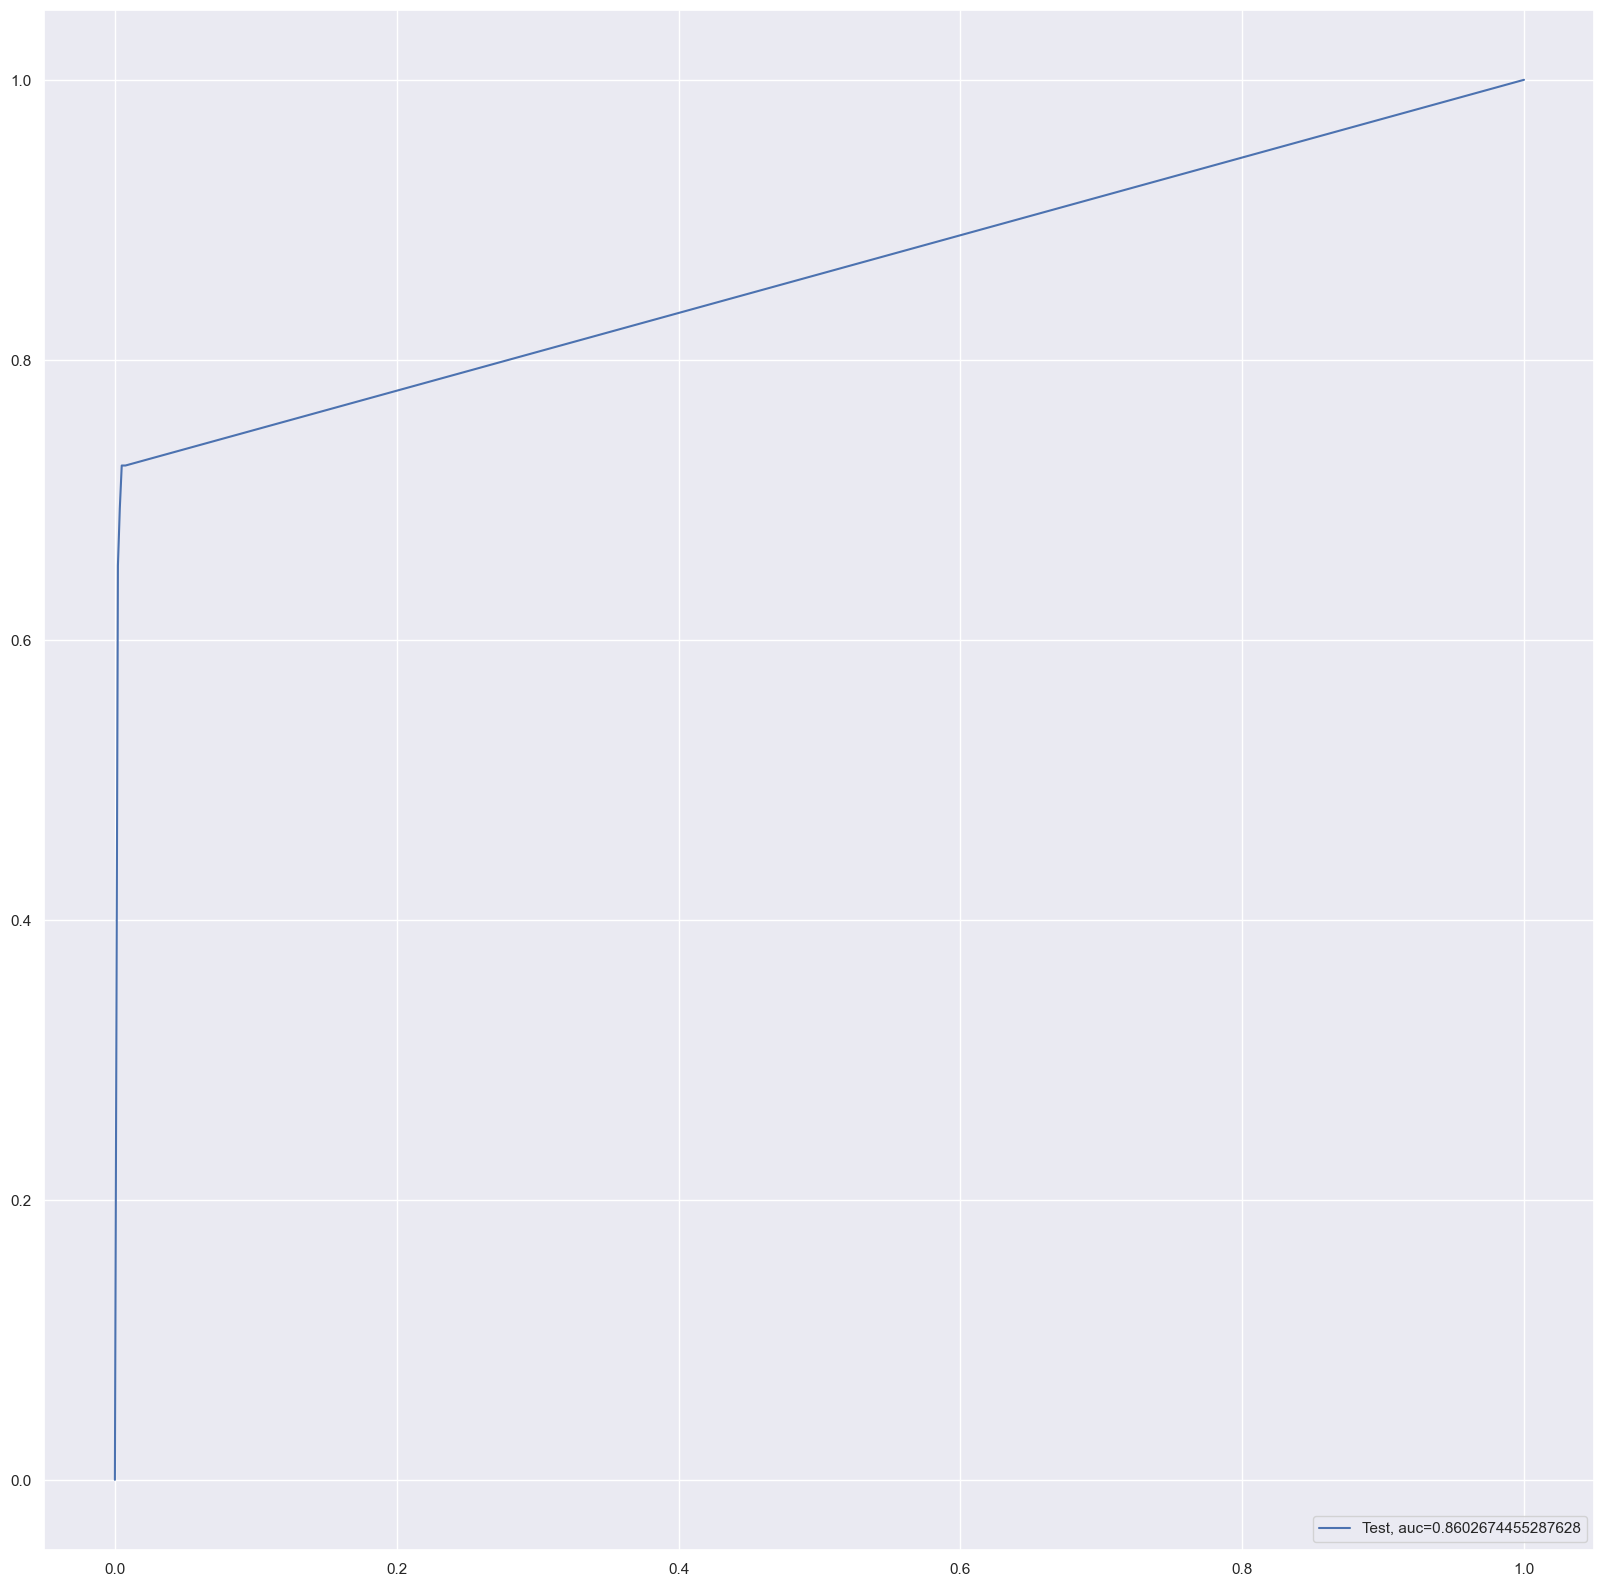

Time Taken by Model: --- 598.5234837532043 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


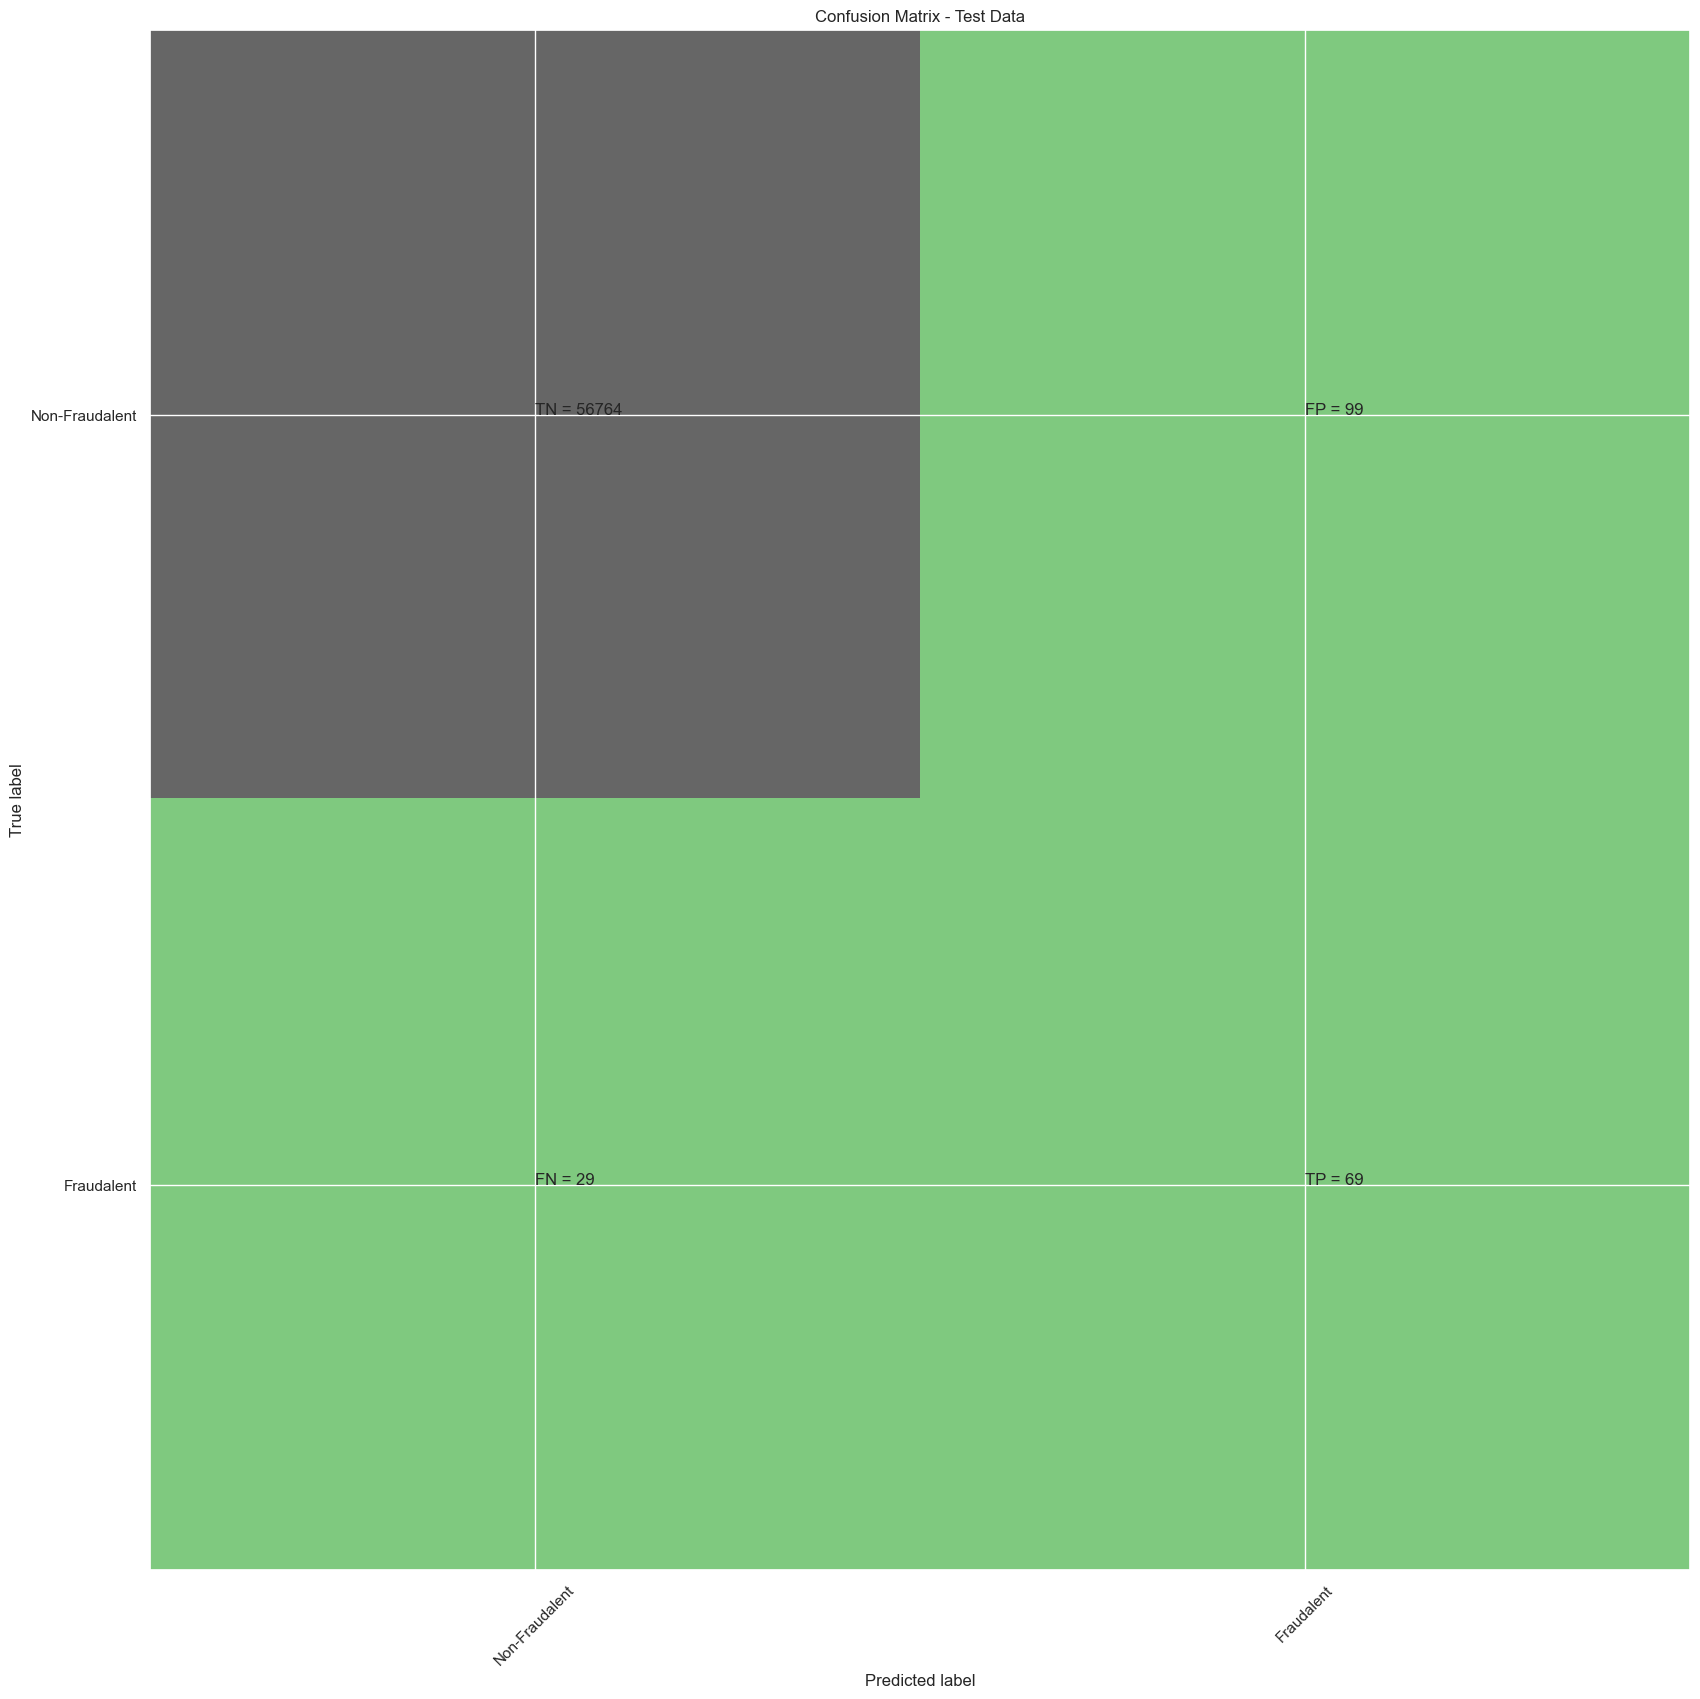

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


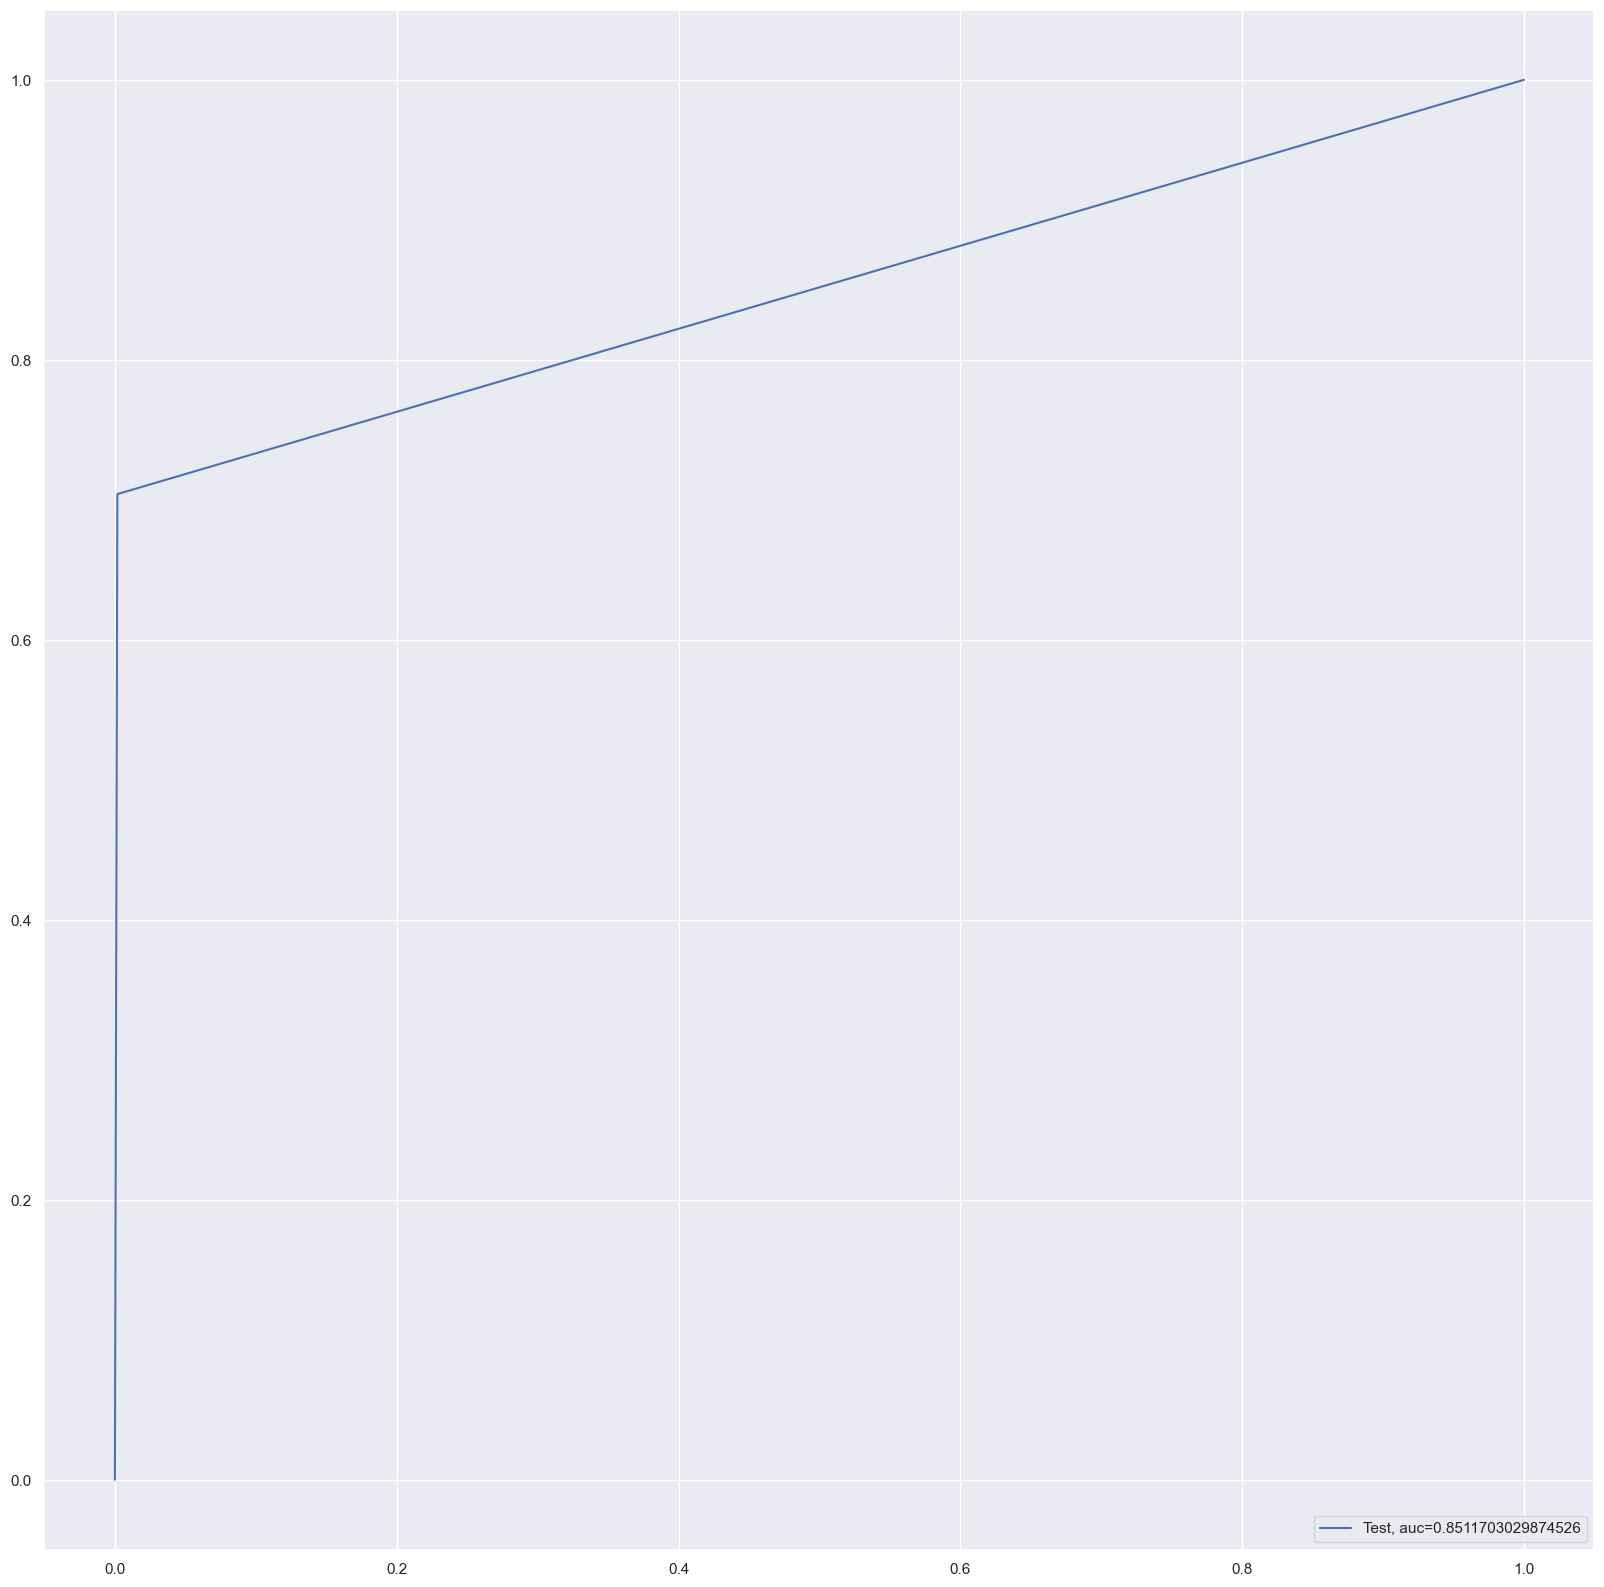

entropy score: 0.9969803900914661
Confusion Matrix


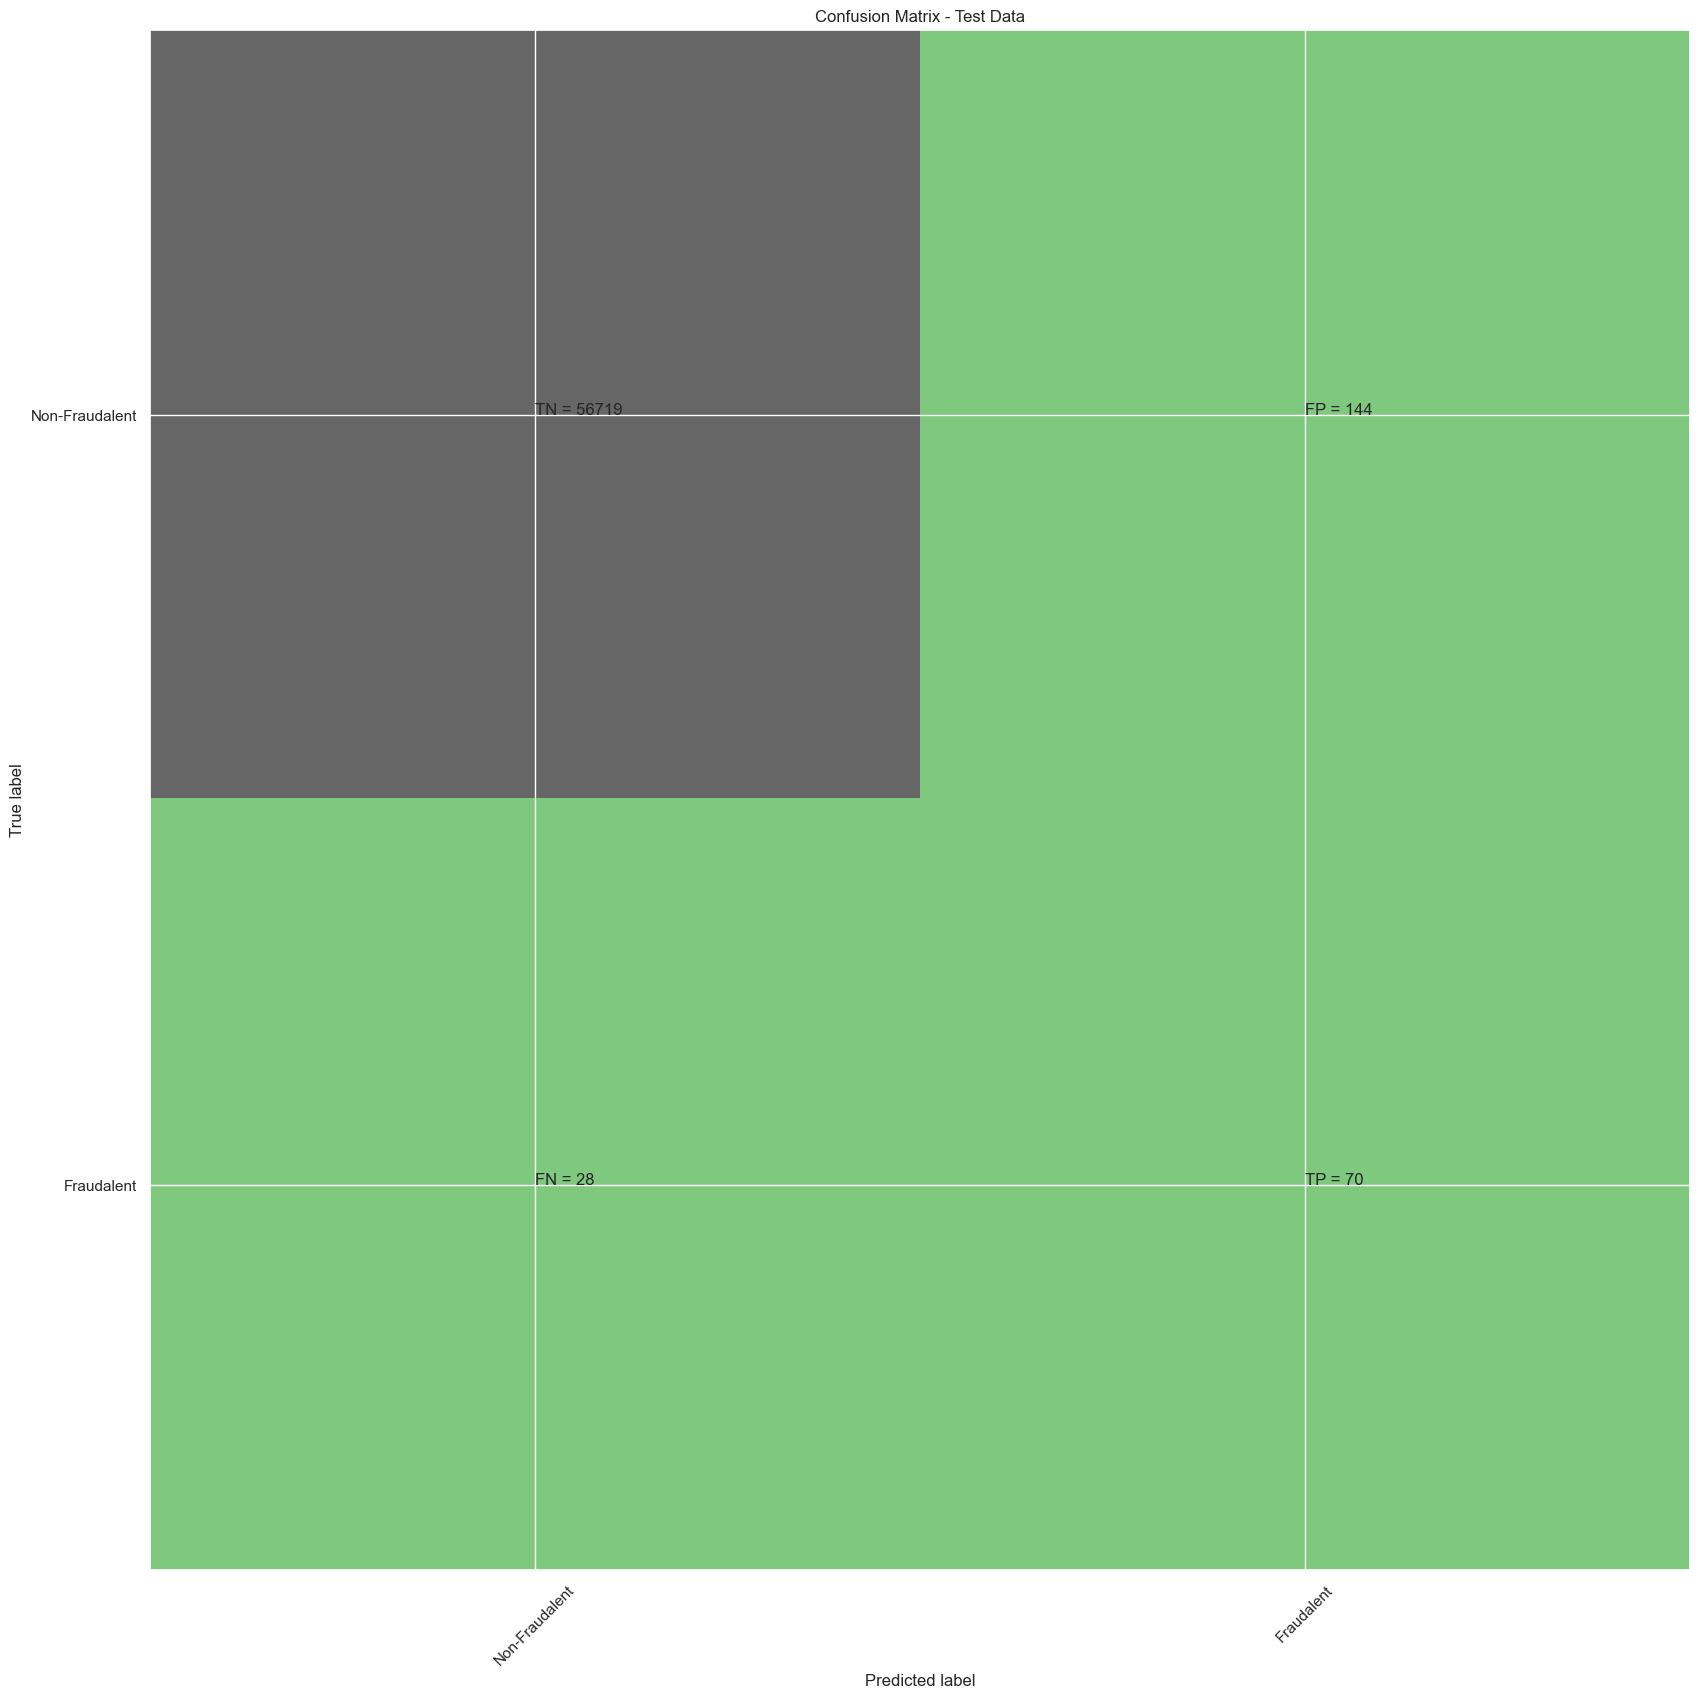

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


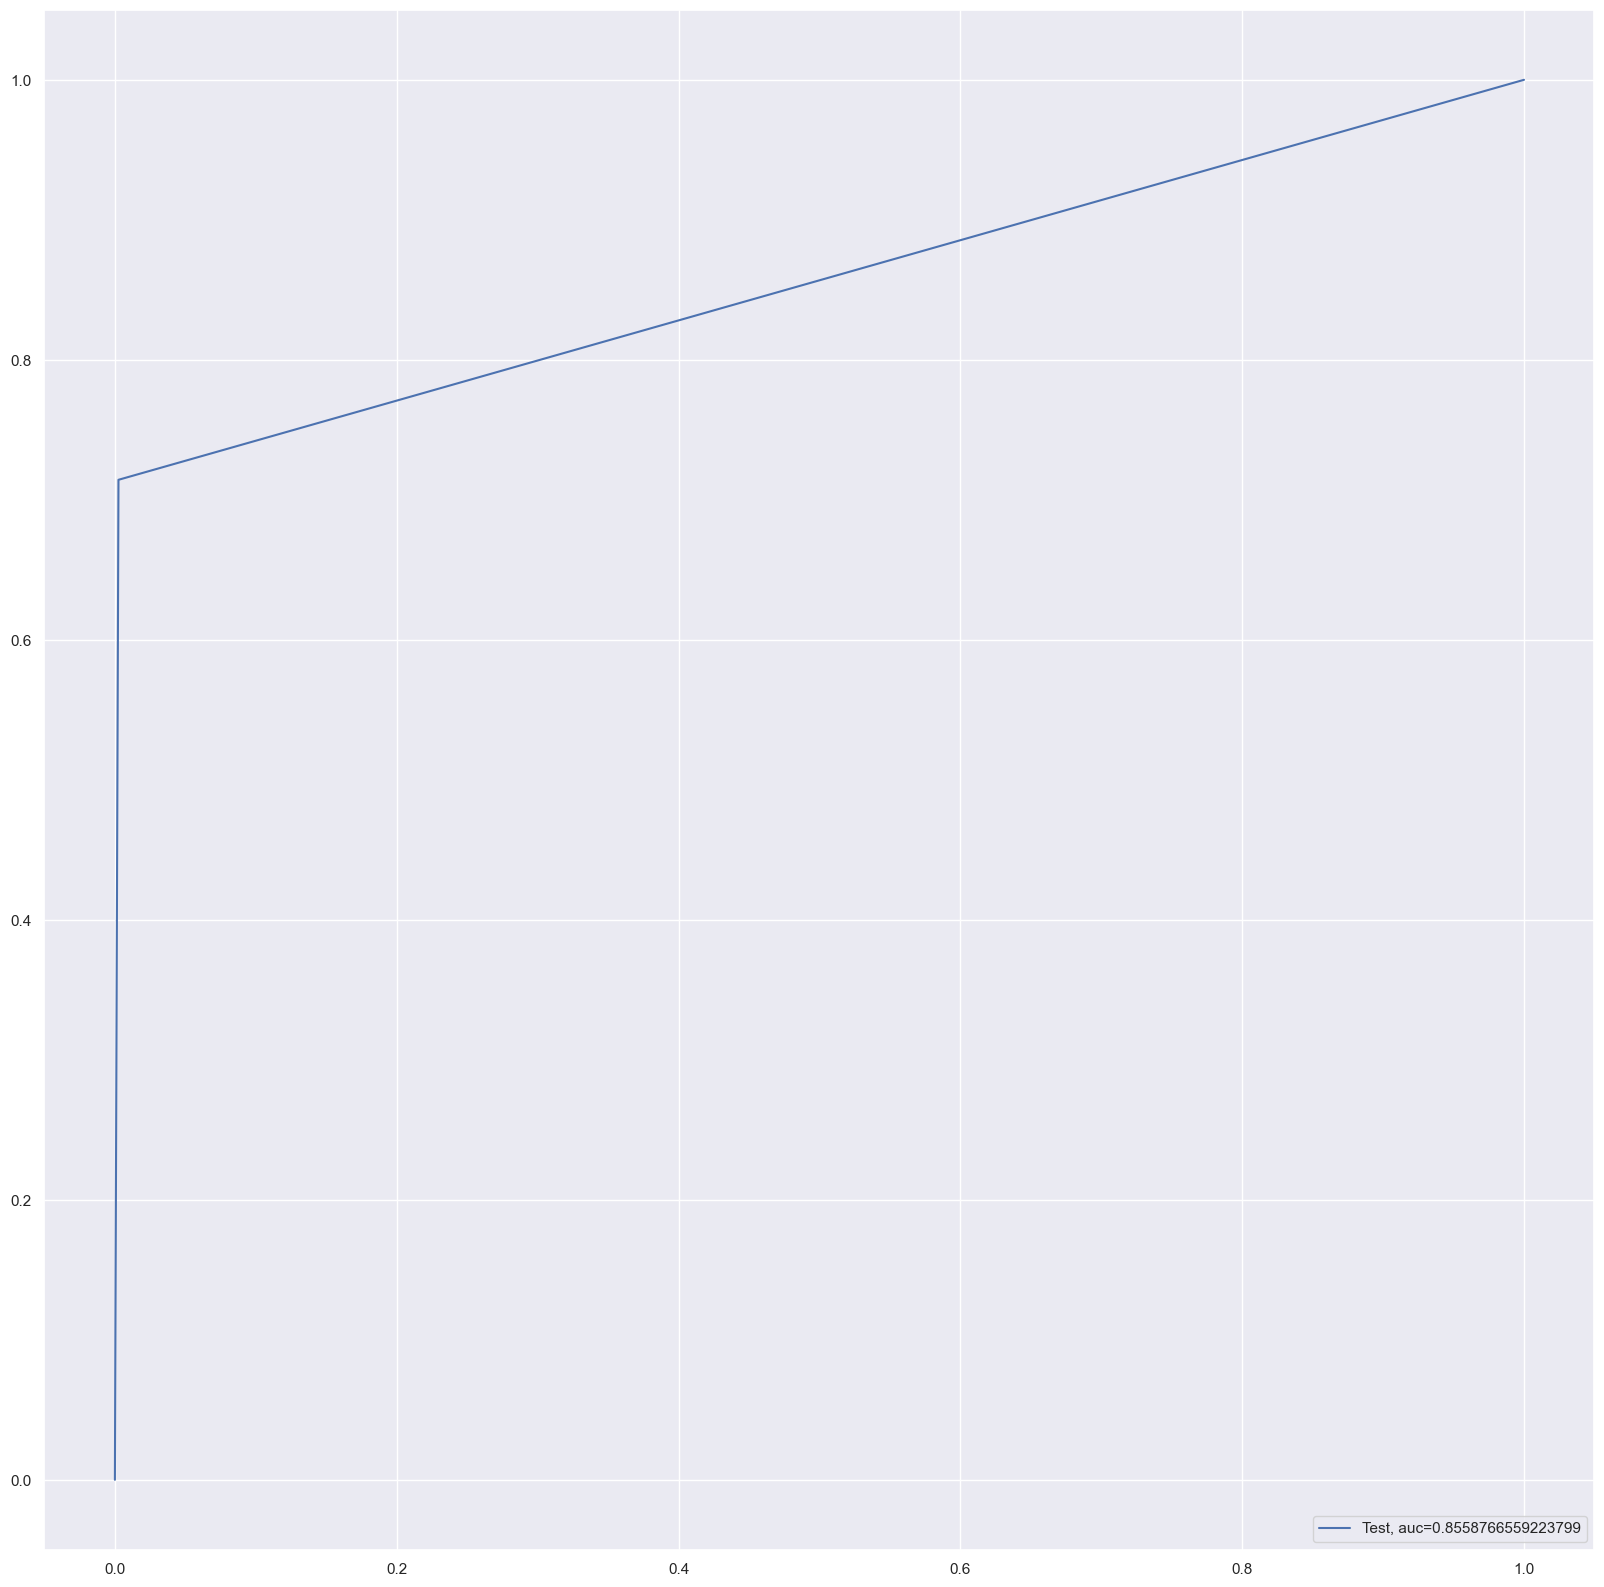

Time Taken by Model: --- 118.7703366279602 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


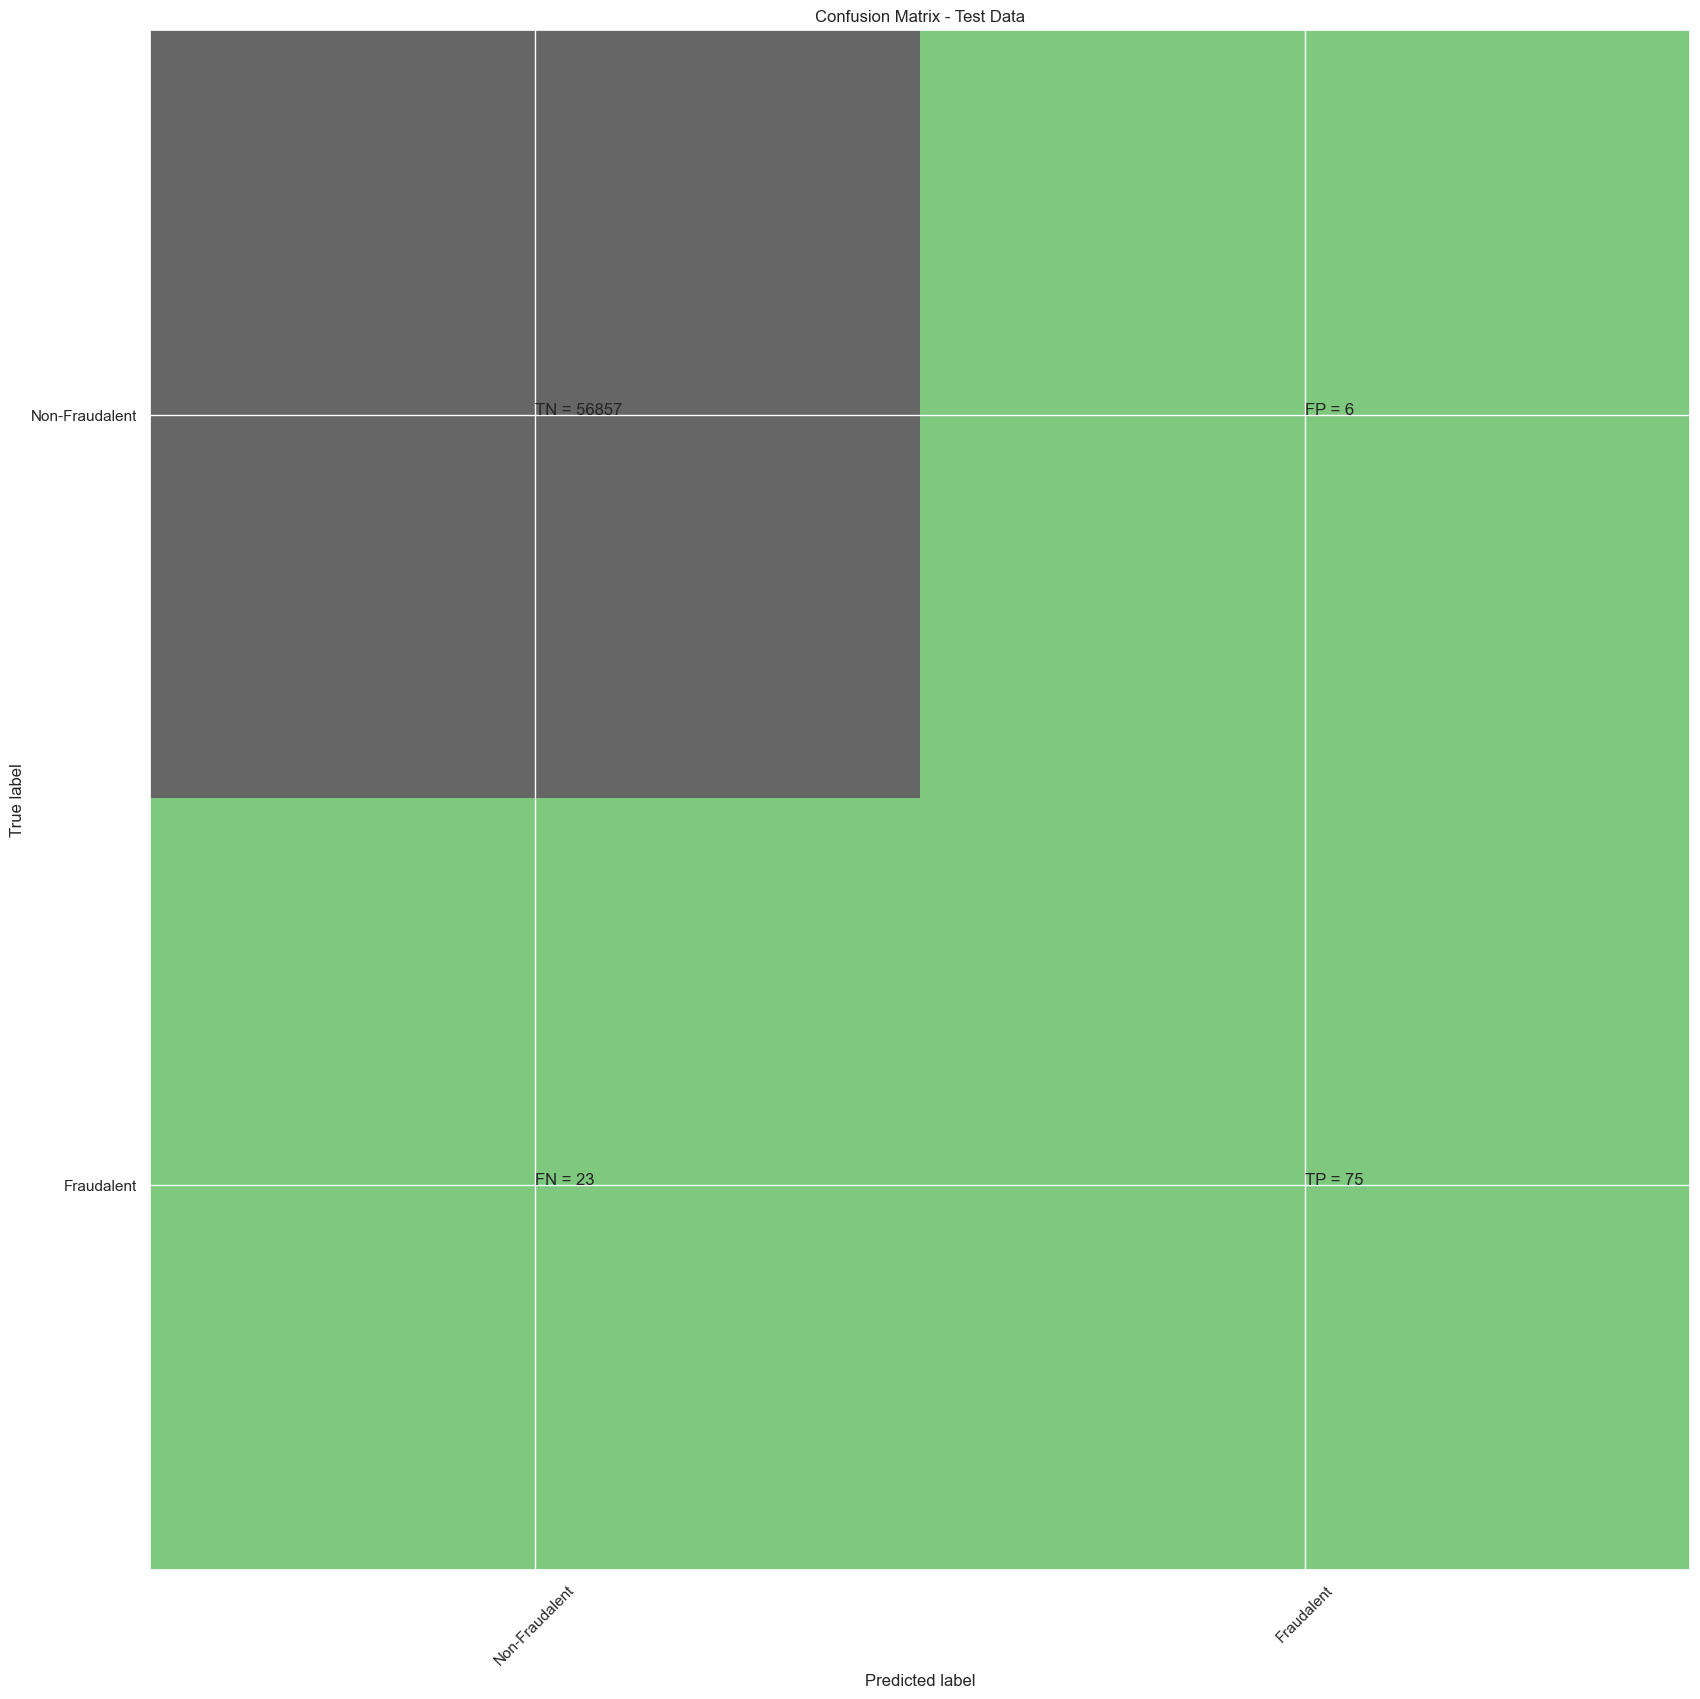

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


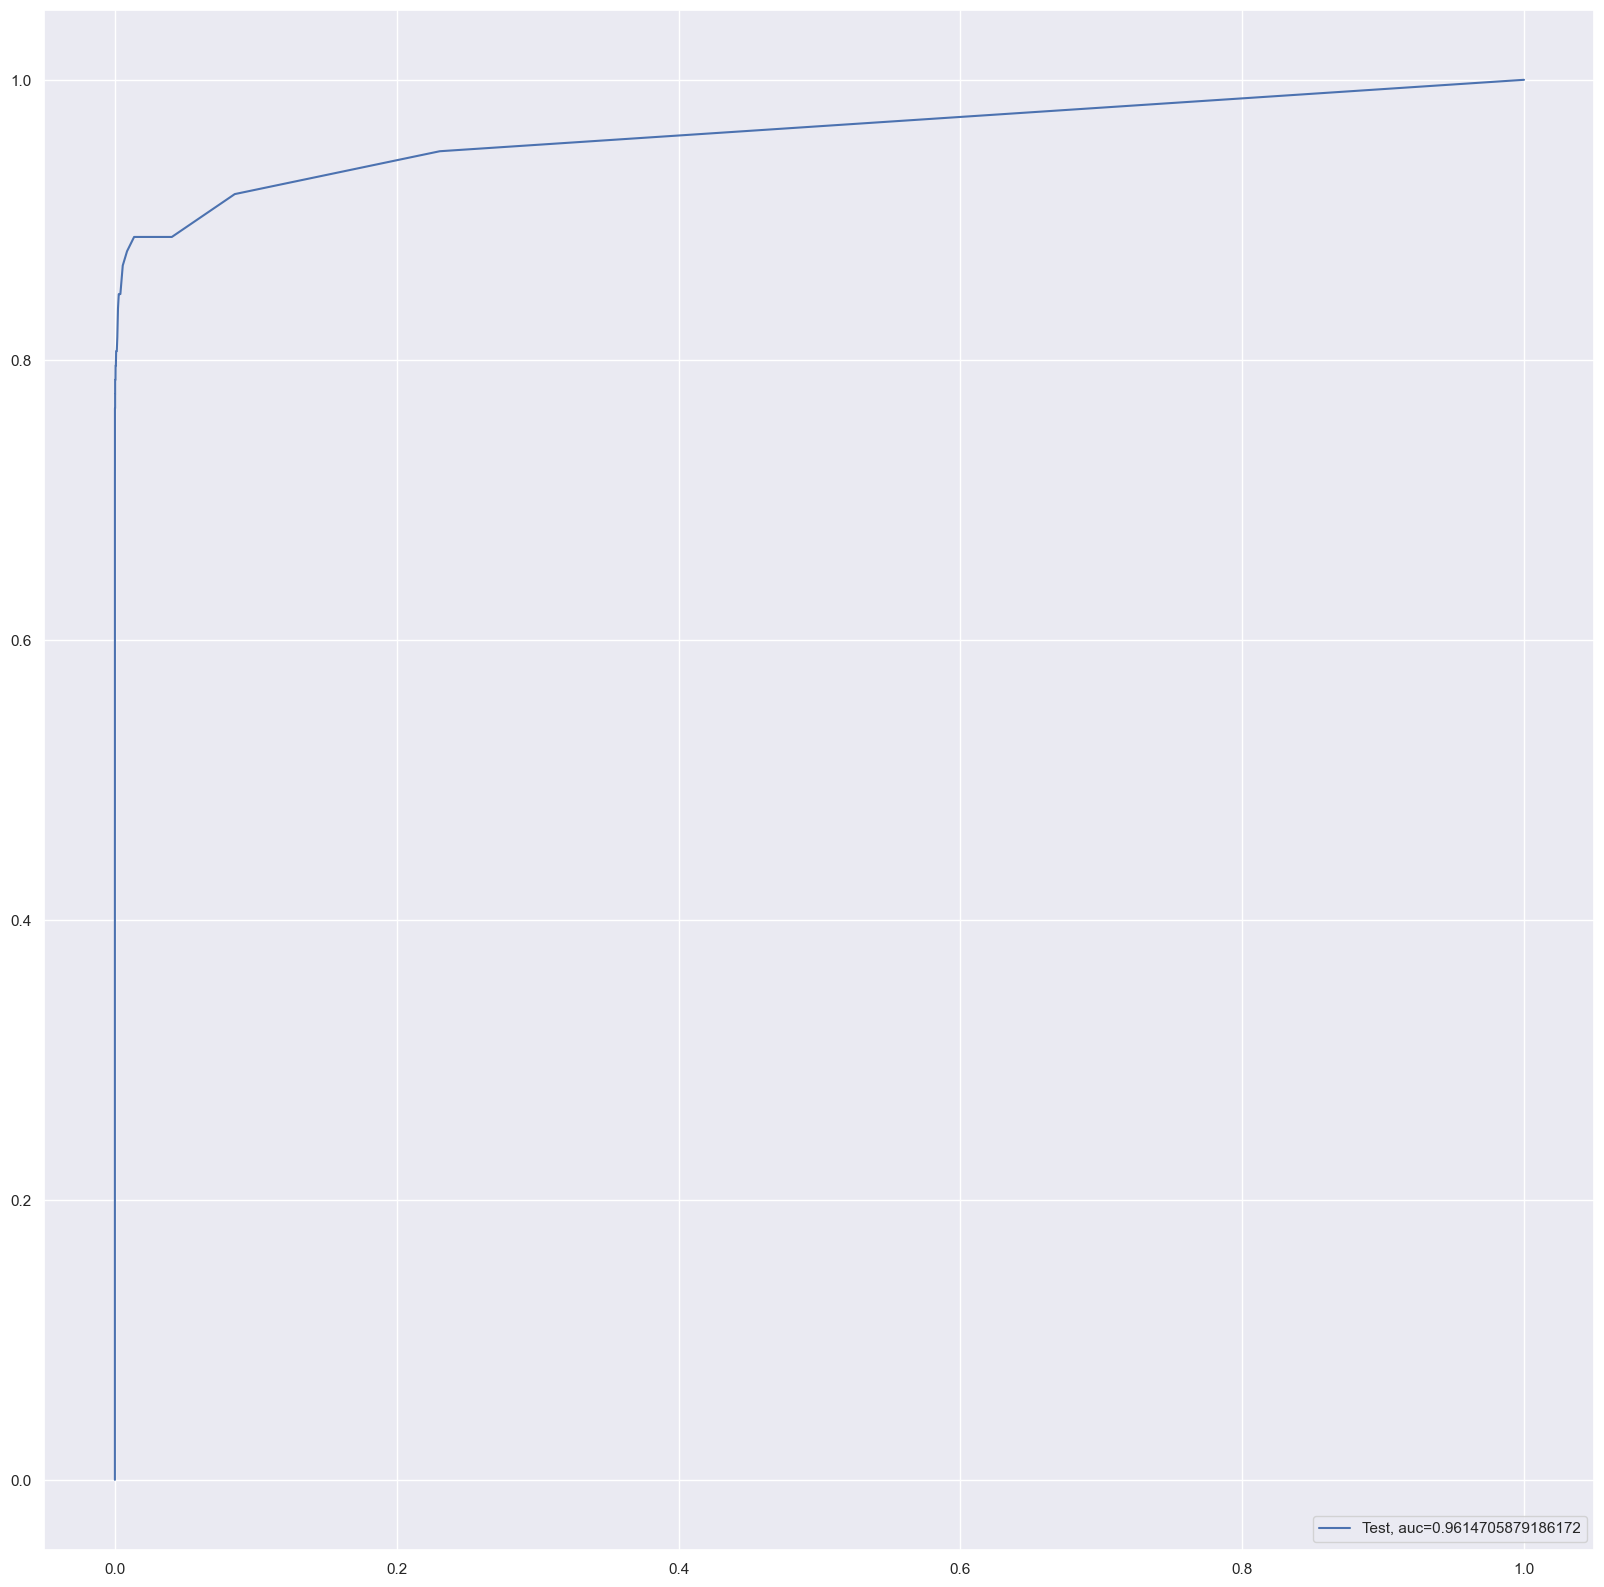

Time Taken by Model: --- 518.3163356781006 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


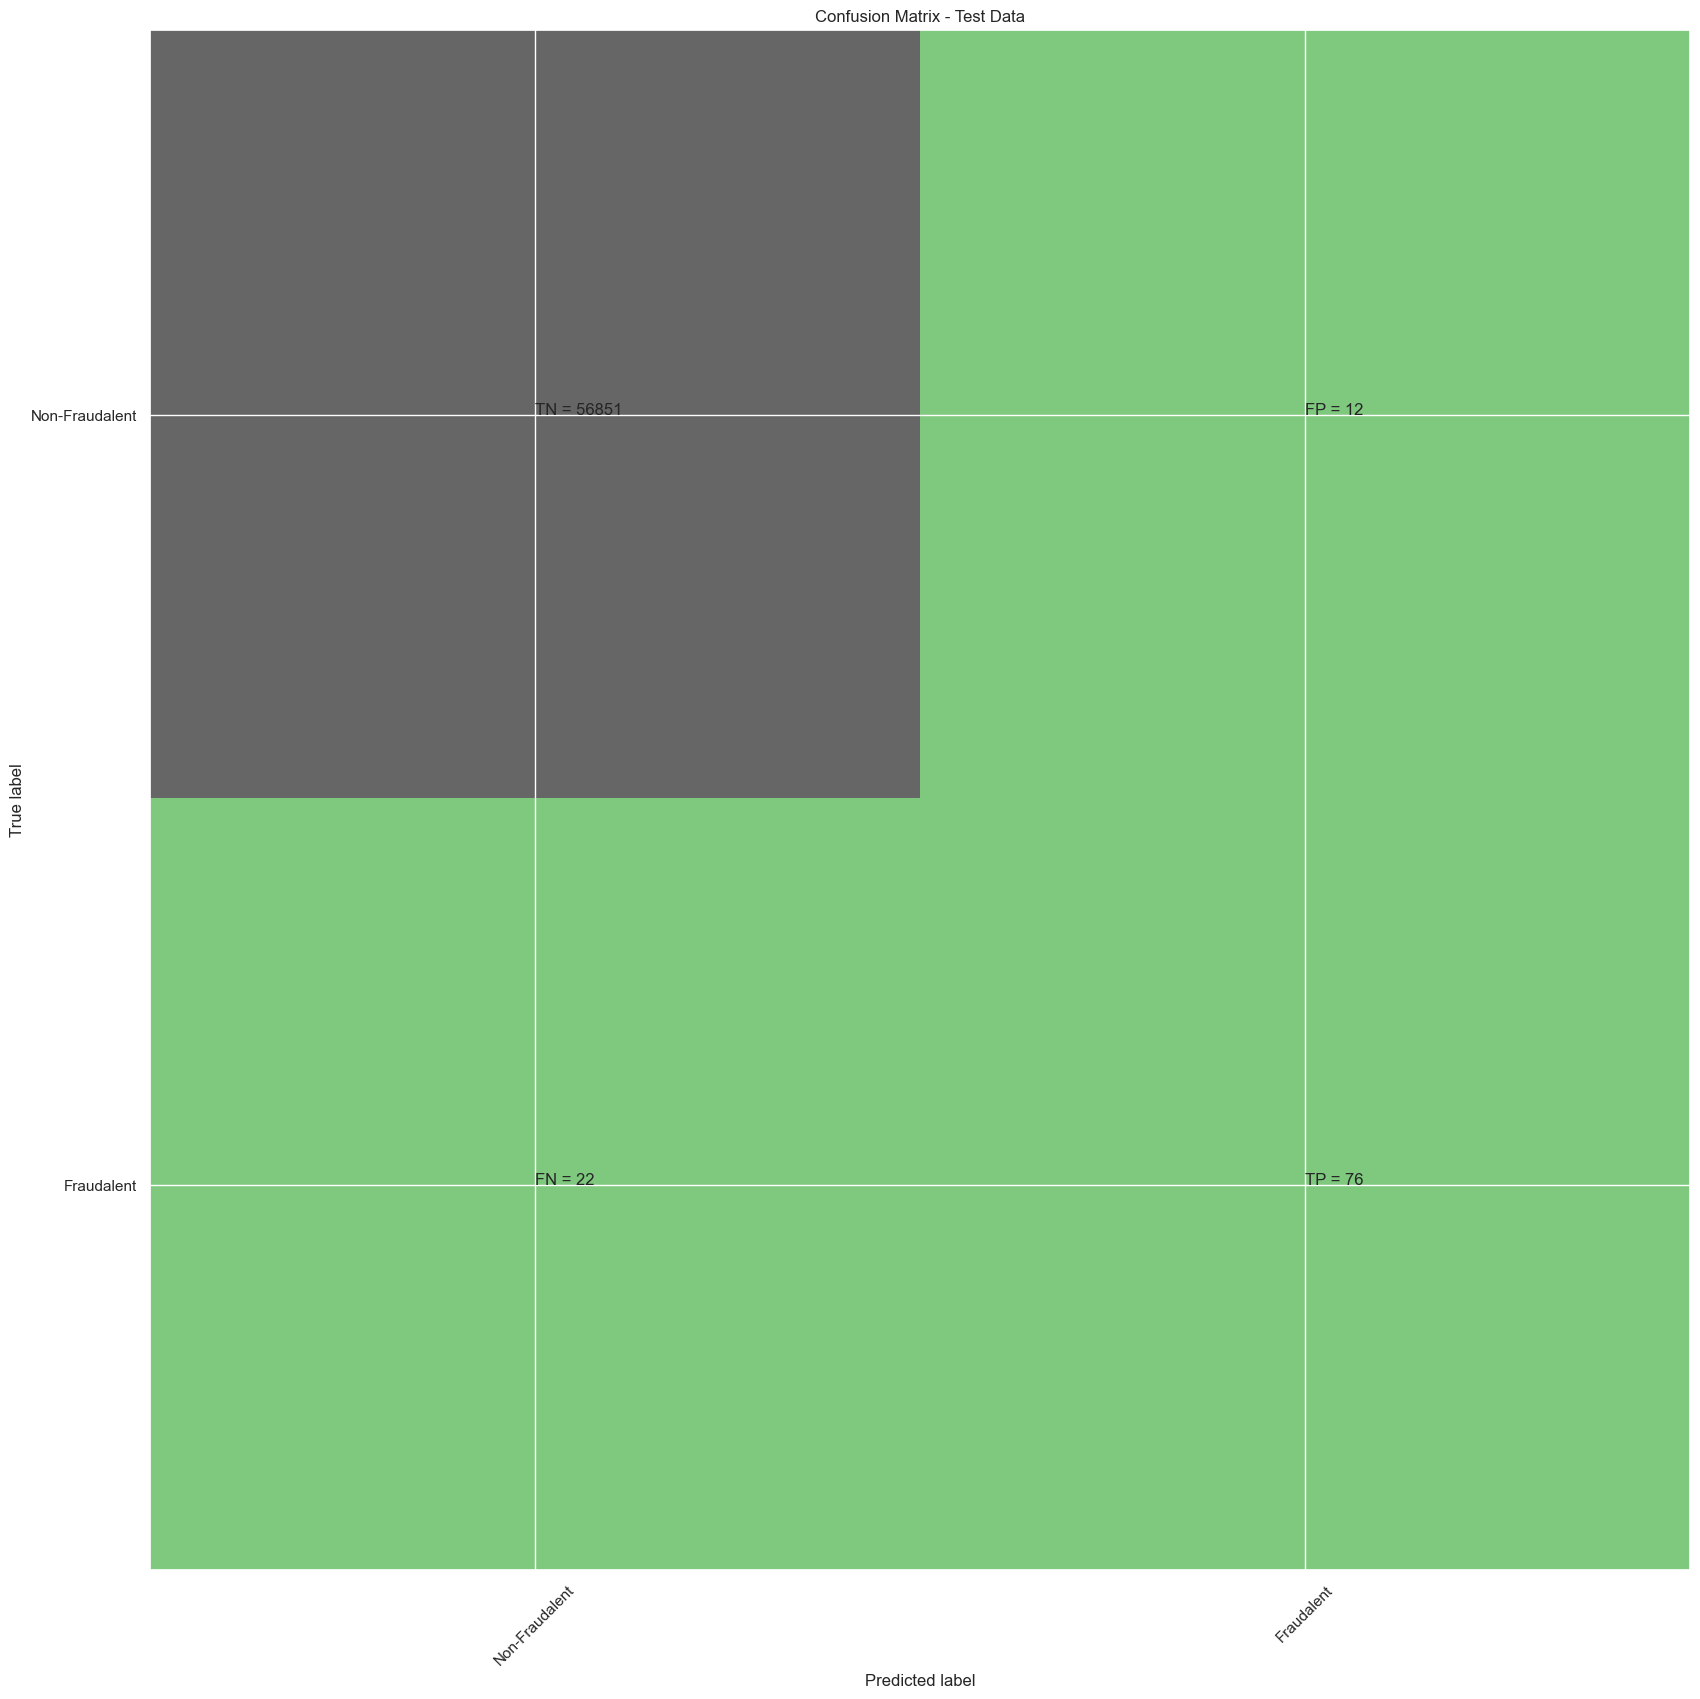

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704732498841648
XGBoost threshold: 0.00014416704652830958
ROC for the test dataset 97.0%


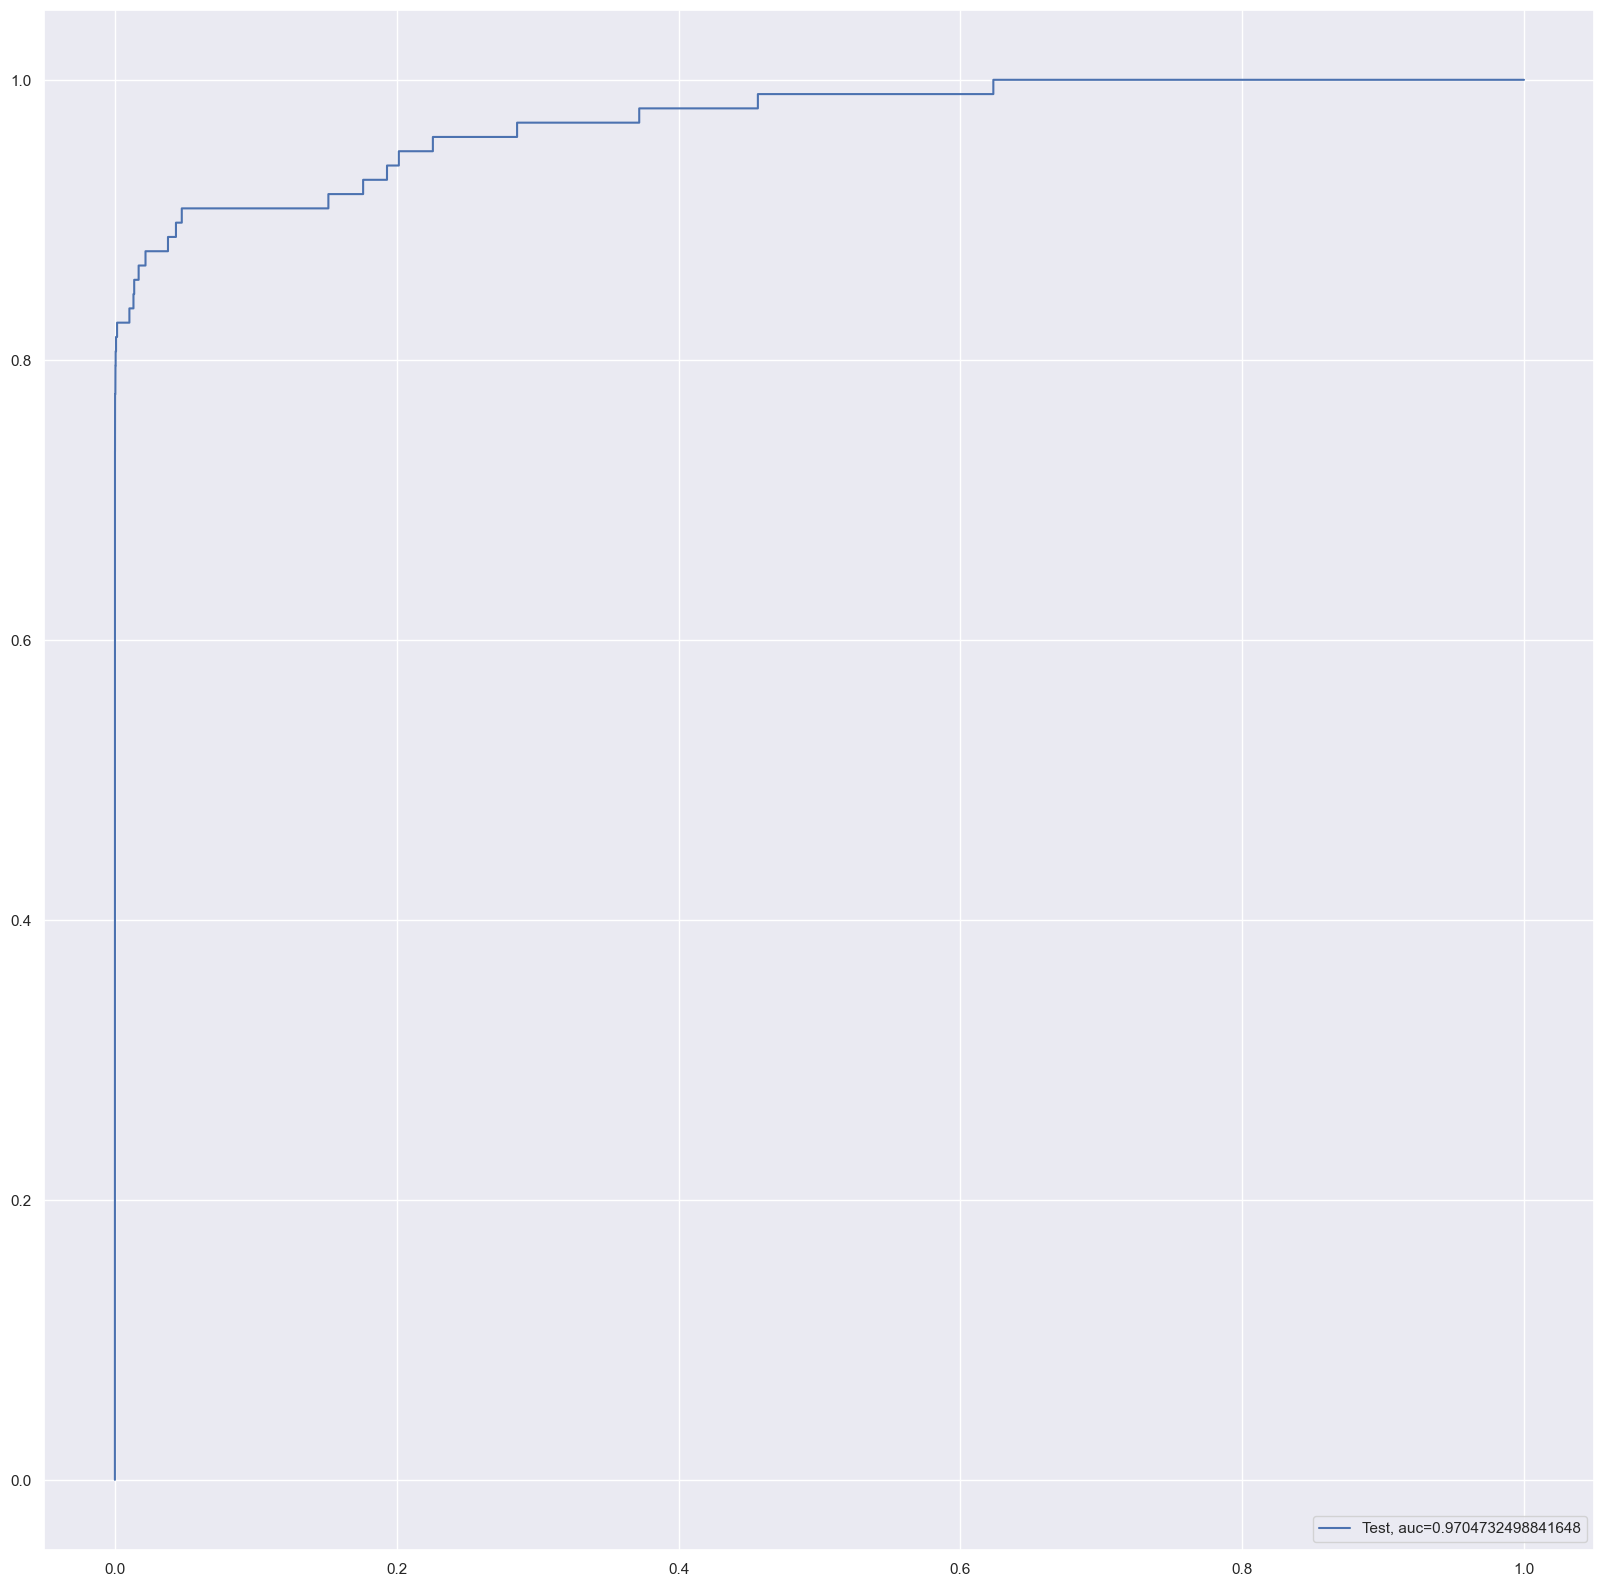

Time Taken by Model: --- 20.84260082244873 seconds ---
--------------------------------------------------------------------------------


In [76]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

##### Build models on other algorithms to see the better performing on SMOTE

In [77]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   
16                      NaN  Logistic Regression with L2 Regularisation   
17                      NaN  Logistic Regression with L1 Regularisation   
18                      NaN                                         KNN   
19                      NaN               Tree Model with gini criteria   
20                      NaN            Tree Model with entropy criteria   
21                      NaN                               Random Forest   
22                      NaN                                     XGBoost   
23                      NaN                                         SVM   
24                      NaN  Logistic Regression with L2 Regularisation   
25                      NaN  Logistic Regression with L1 Regularisation   
26                      NaN                                         KNN   
27                      NaN               Tree Model with gini criteria   
28                      NaN            Tree Model with entropy criteria   
29                      NaN                               Random Forest   
30                      NaN                                     XGBoost   
31                      NaN                                         SVM   
32                      NaN  Logistic Regression with L2 Regularisation   
33                      NaN  Logistic Regression with L1 Regularisation   
34                      NaN                                         KNN   
35                      NaN               Tree Model with gini criteria   
36                      NaN            Tree Model with entropy criteria   
37                      NaN                               Random Forest   
38                      NaN                                     XGBoost   
39                      NaN  Logistic Regression with L2 Regularisation   
40                      NaN  Logistic Regression with L1 Regularisation   
41                      NaN                                         KNN   
42                      NaN               Tree Model with gini criteria   
43                      NaN            Tree Model with entropy criteria   
44                      NaN                               Random Forest   
45                      NaN                                     XGBoost   

    Accuracy  roc_value  threshold  \
0   0.998999   0.966806   0.001289   
1   0.998841   0.963903   0.009276   
2   0.999298   0.900851   0.200000   
3   0.998806   0.859015   1.000000   
4   0.999052   0.864337   1.000000   
5   0.999350   0.940564   0.010000   
6   0.999386   0.977586   0.000023   
7   0.998560   0.891340   0.001311   
8   0.999070   0.990435   0.001838   
9   0.999157   0.879500   0.046196   
10  0.999350   0.876185   0.200000   
11  0.999210   0.8705

## Results for SMOTE Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the ADASYN Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


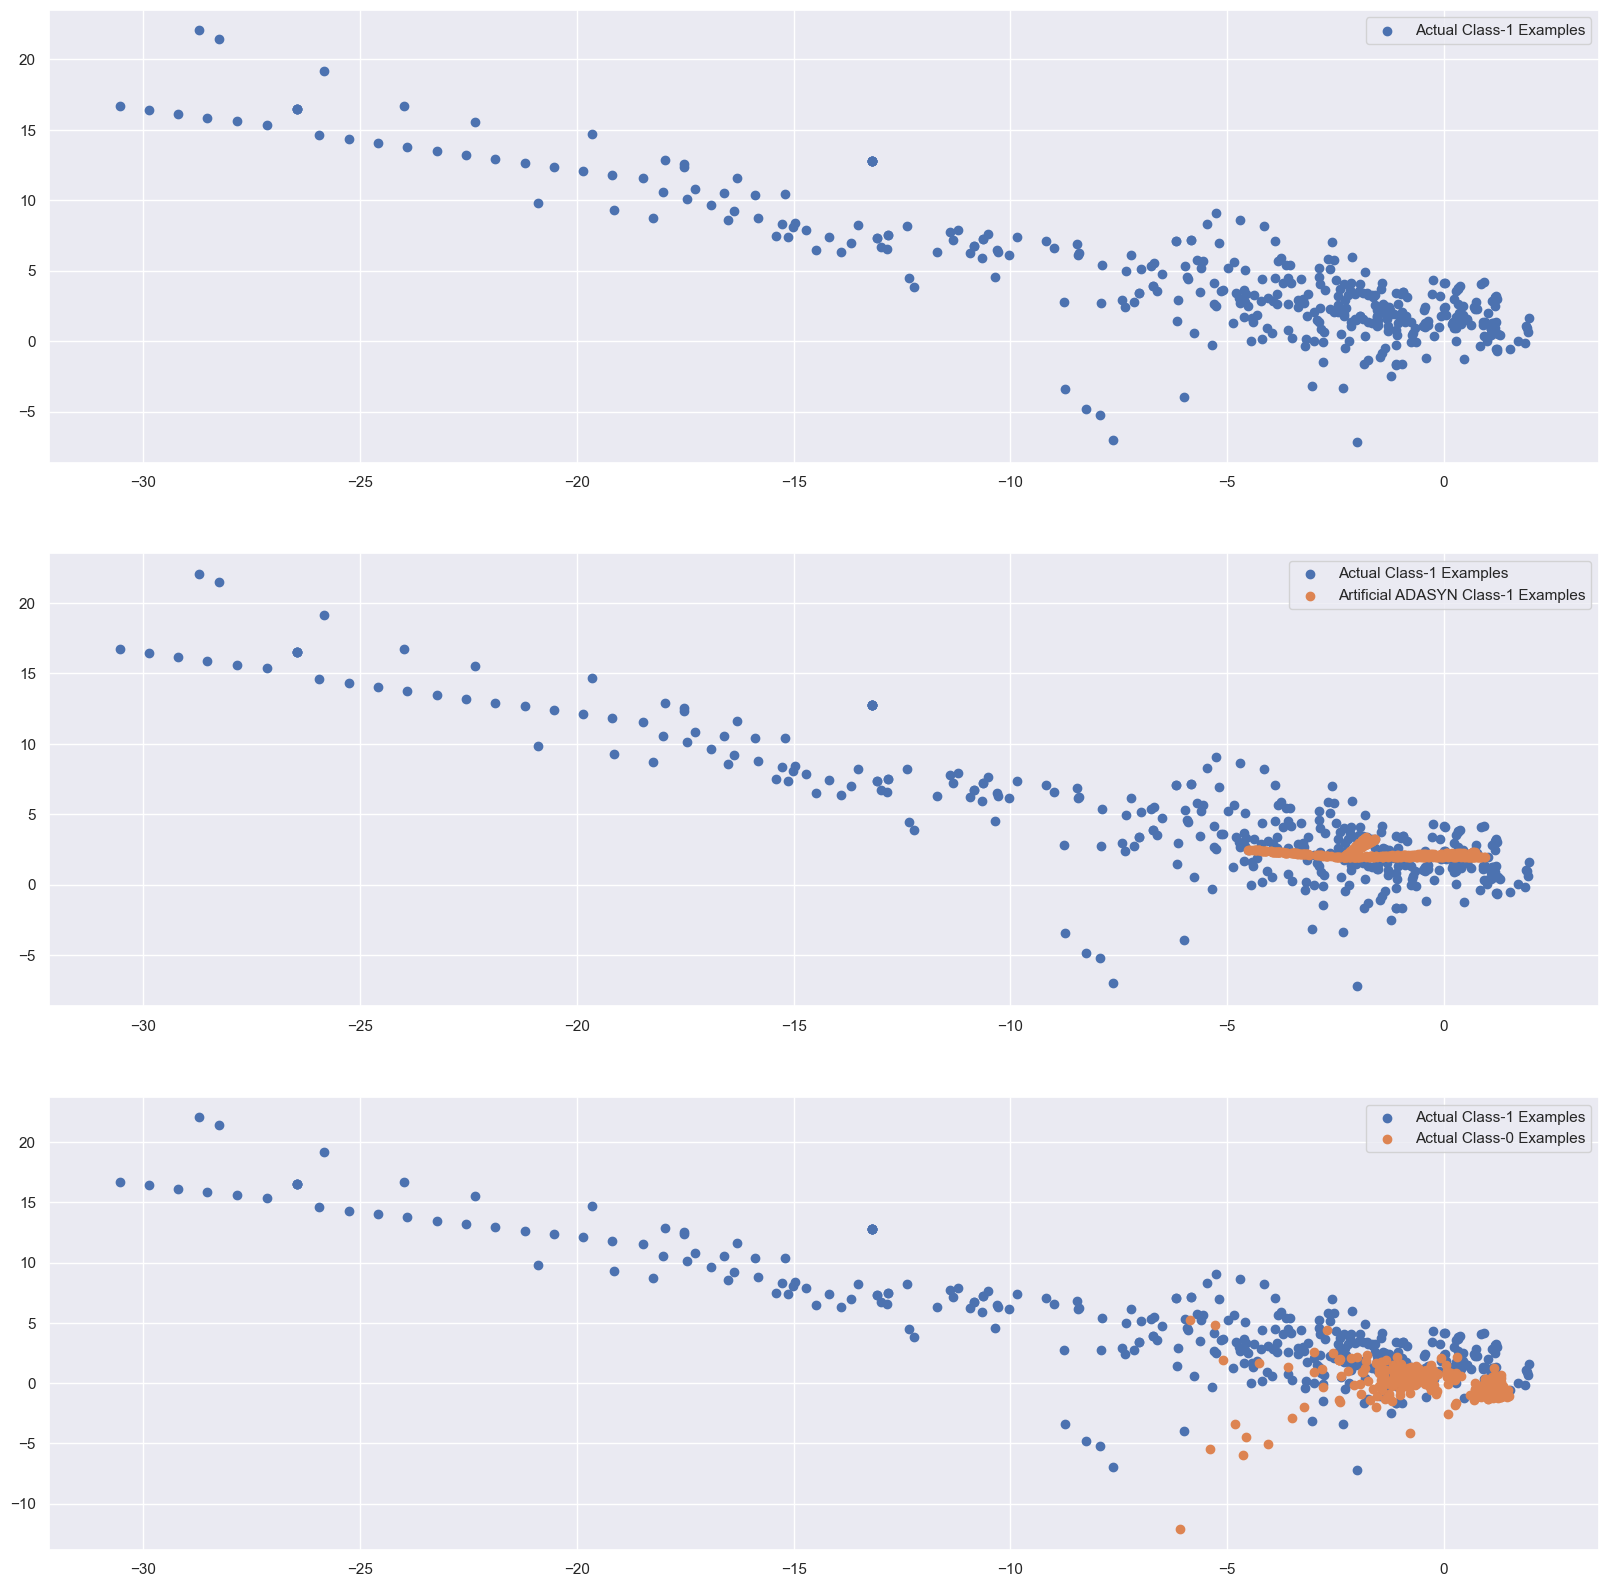

In [78]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

# Assuming X_train and y_train are already defined
# cols should be defined as the column names of X_train
cols = X_train.columns

# Applying ADASYN
adasyn = ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

# Create dataframe with the synthetic samples
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

# Get the synthetic minority samples created by ADASYN
X_train_adasyn_1 = X_train_ADASYN.iloc[X_train.shape[0]:].to_numpy()


# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [79]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
# Assuming you have defined X, y, and cols
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    ada = ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ada.fit_resample(X_train, y_train)
    
    # Create DataFrame for X_train_ADASYN
    X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9817834854848005
Max auc_roc for l1: 0.5
Parameters for l2 regularization
[[ 1.03387706  0.84701762  0.73032569  0.85032516  0.98397661 -0.90371887
  -0.93694871 -0.58536052 -0.52410592 -0.91234412  0.83892962 -1.3628066
  -0.28823903 -1.99114775  0.03103942 -0.98221315 -1.33401987 -0.3899288
   0.44209555 -1.16605453 -0.16433149  0.59152085  0.72331234 -0.44517339
   0.6857886  -0.33875296  1.41110207  1.03072652  0.01143151  0.0050882 ]]
[-4.42679024]
{1: array([[0.5951044 , 0.61362856, 0.69655986, 0.86227534, 0.95838403,
        0.97232914, 0.97668948, 0.97962765, 0.98088426, 0.98126709,
        0.98131281, 0.98131484, 0.98131484, 0.98131484, 0.98131484,
        0.98131484, 0.98131484, 0.98131484, 0.98131484, 0.98131484],
       [0.59576391, 0.61372951, 0.69671879, 0.86475619, 0.9606171 ,
        0.97380978, 0.97802713, 0.98106812, 0.98237858, 0.98269935,
        0.98274953, 0.98274953, 0.98274953, 0.98274953, 0

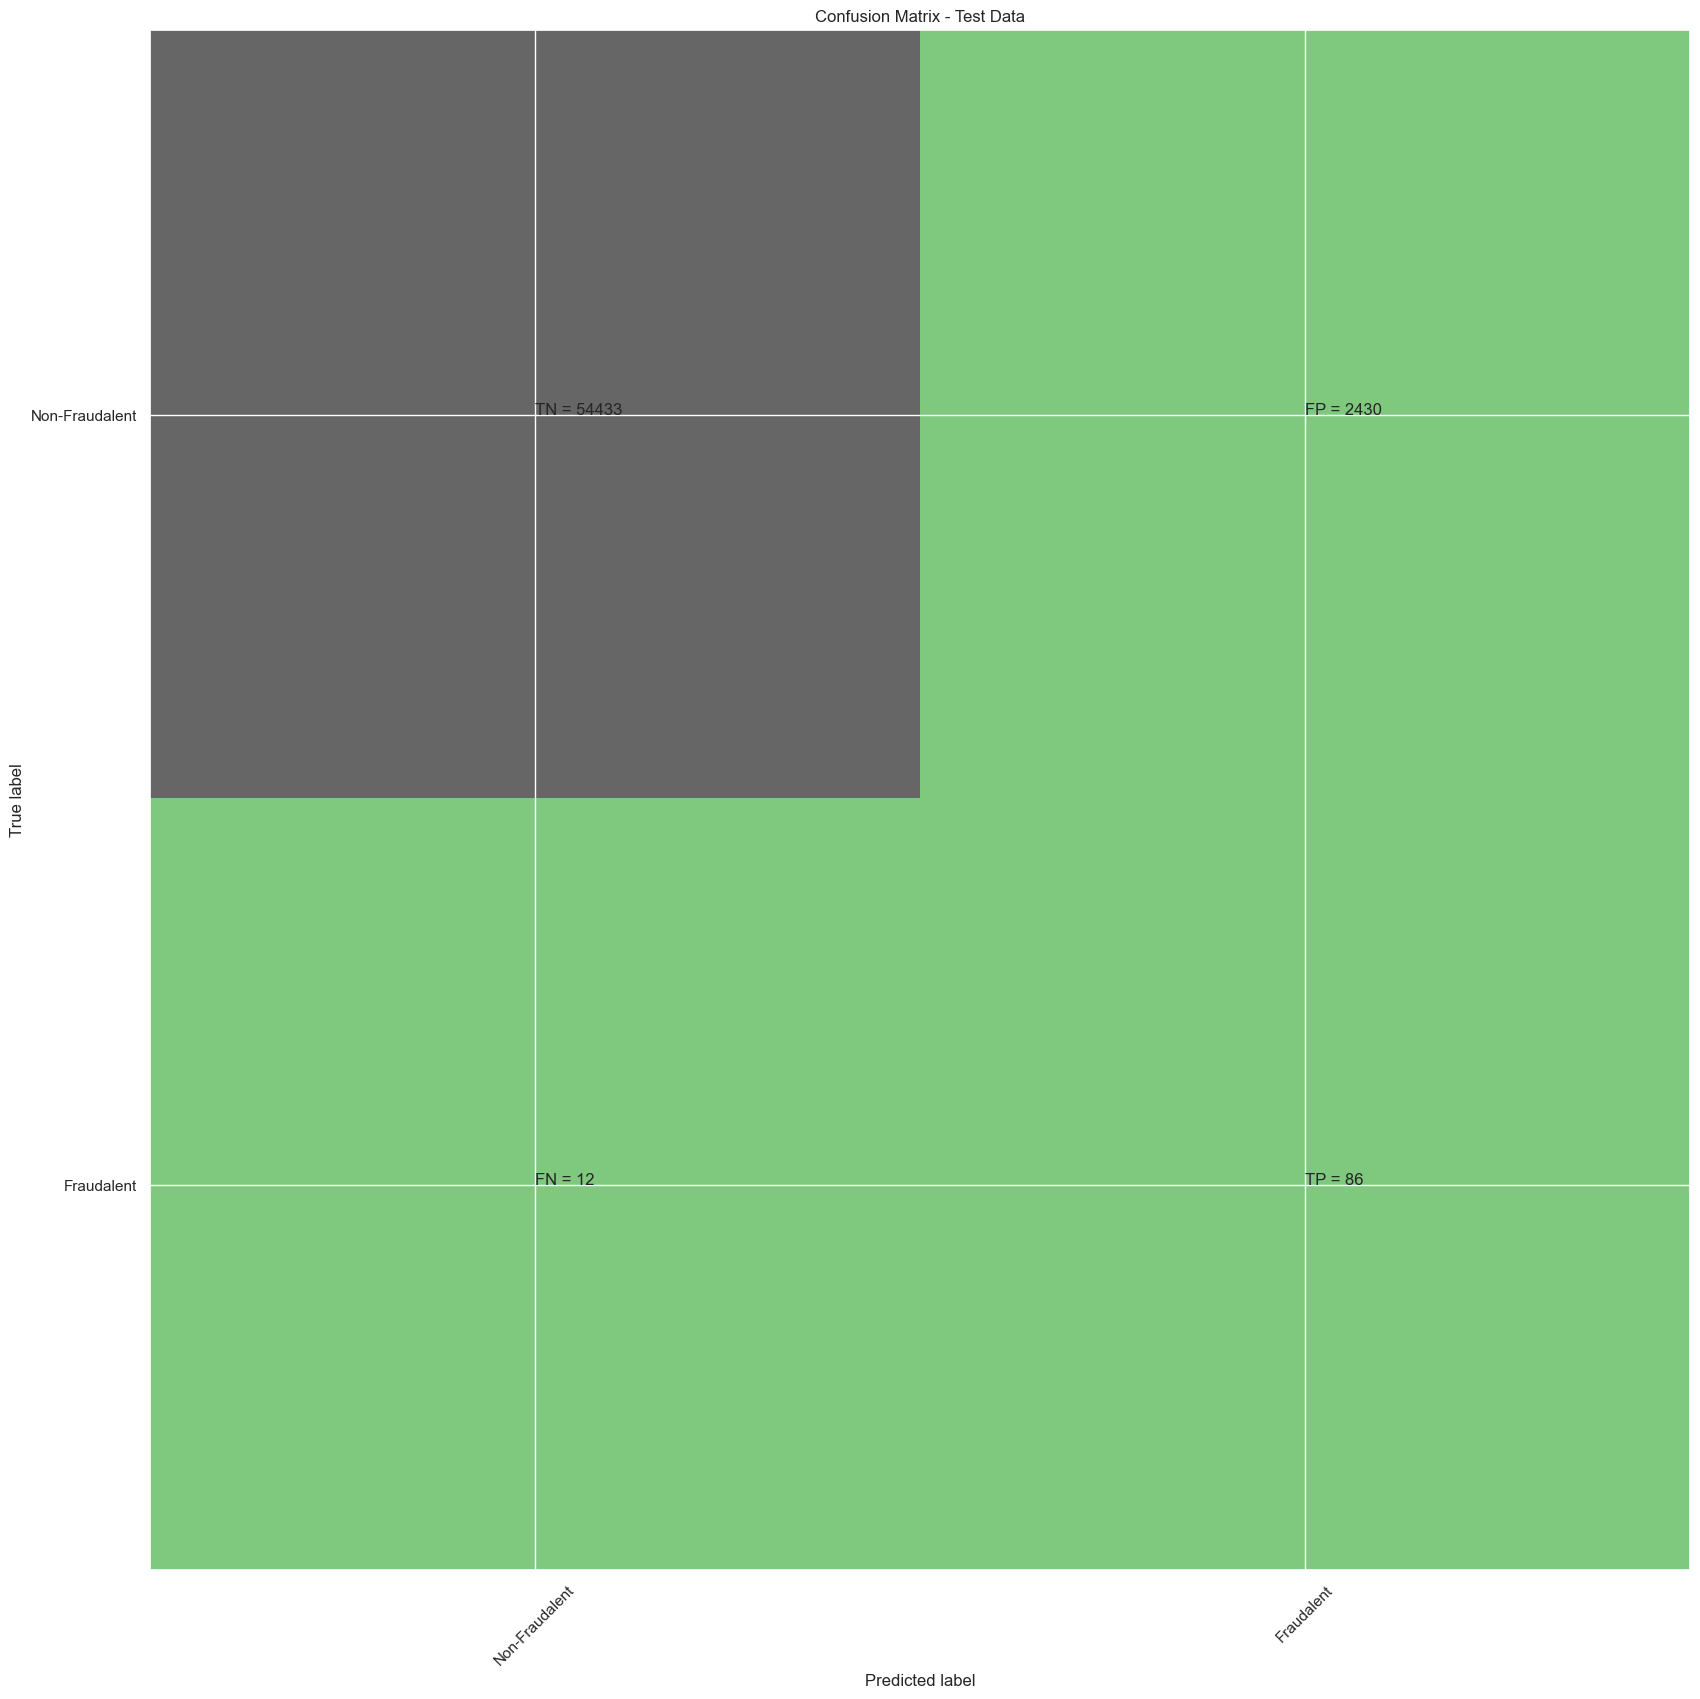

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.03      0.88      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.92      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy of Logistic model with L1 regularization : 0.9982795245869981
Confusion Matrix


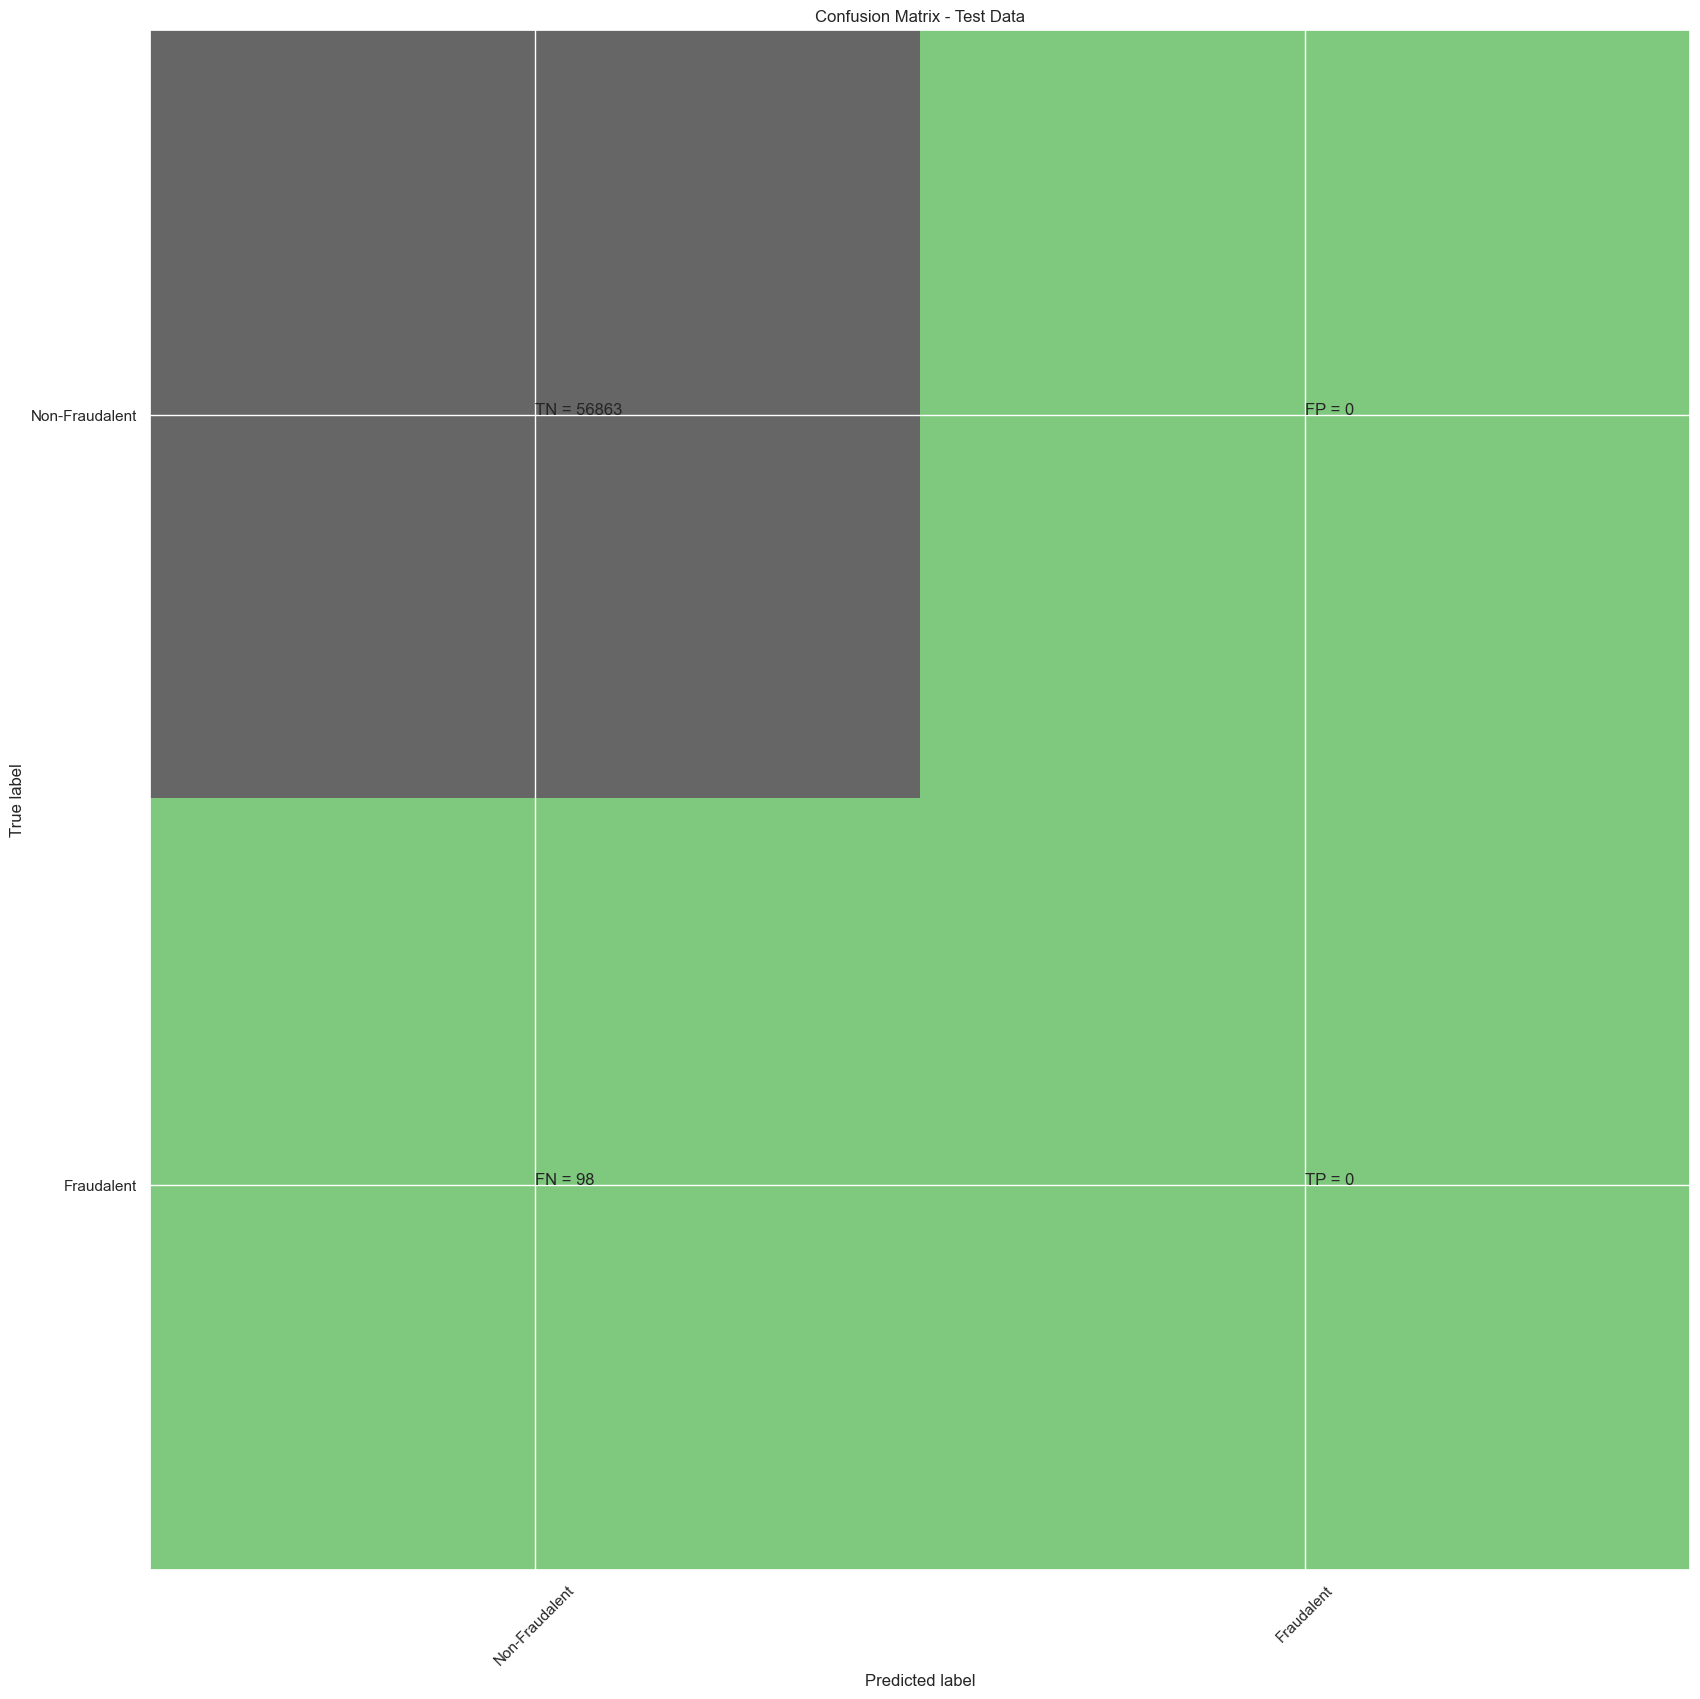

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.9732586772288714
L2 threshold: 0.7700298374836653
ROC for the test dataset: 97.3%


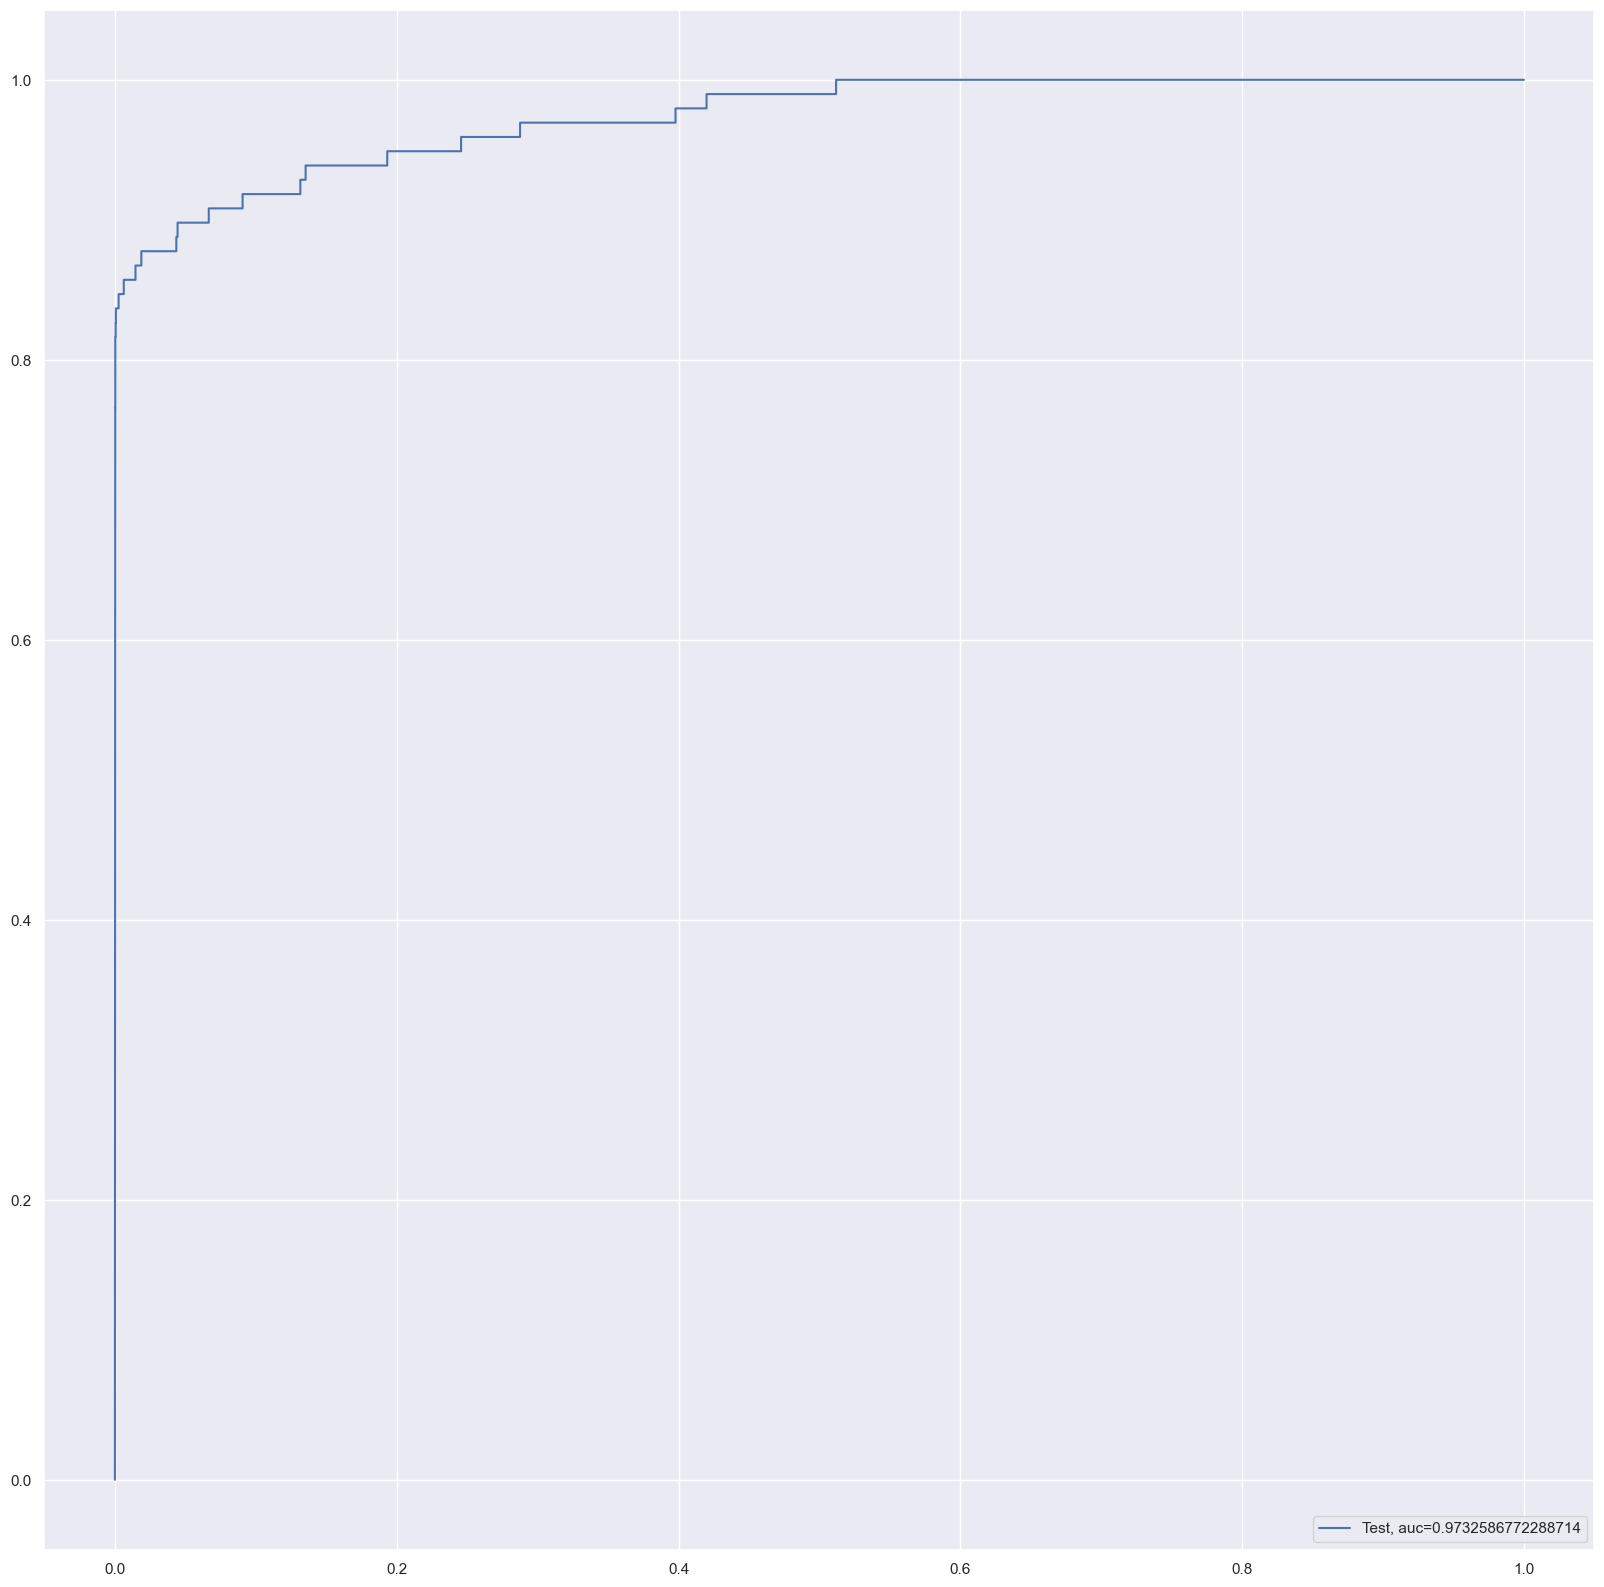

L1 roc_value: 0.5
L1 threshold: 1.5
ROC for the test dataset: 50.0%


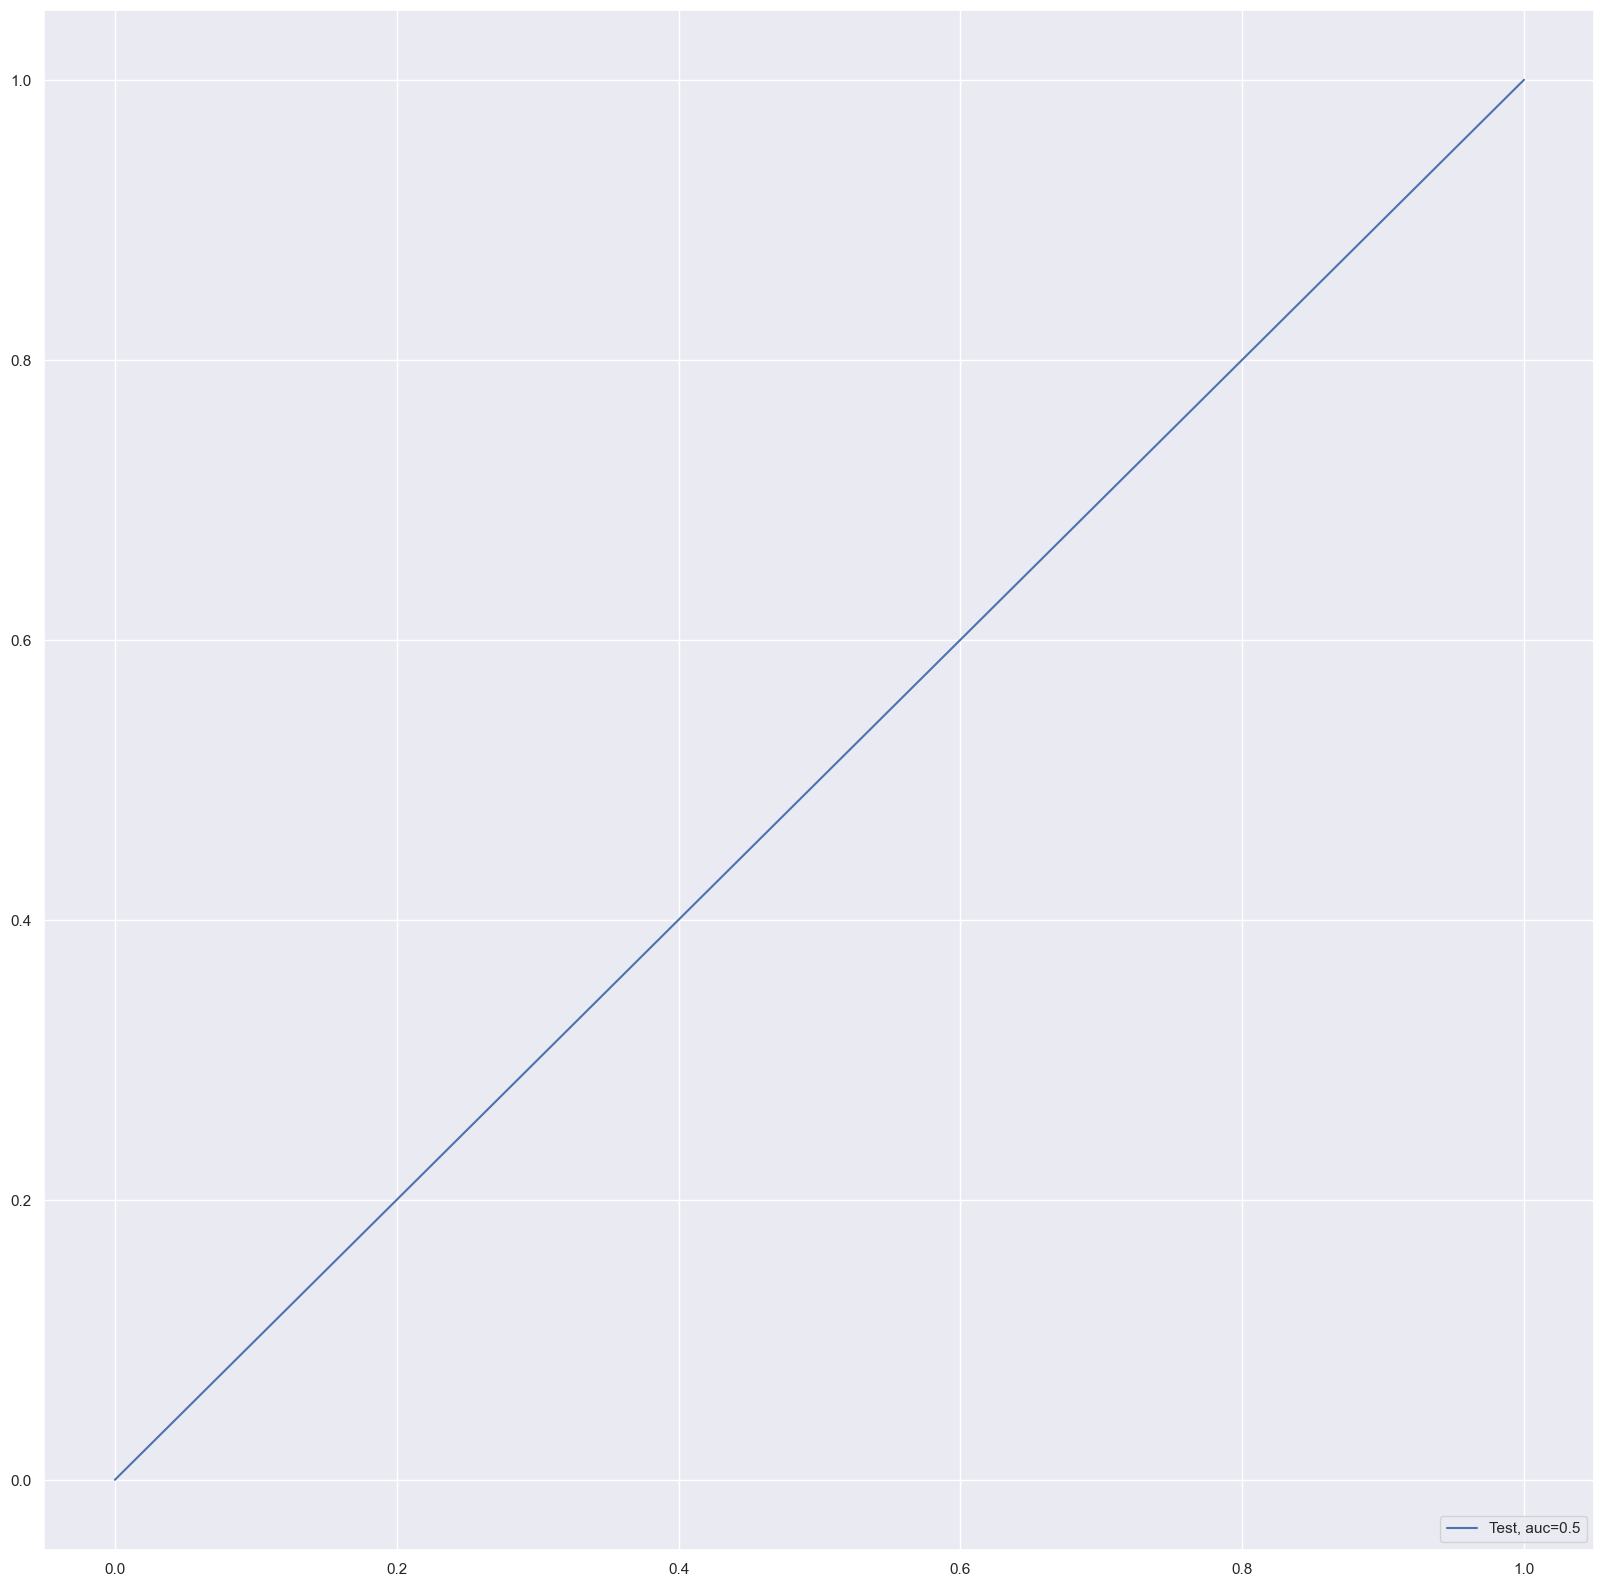

Time Taken by Model: --- 704.4602971076965 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score: 0.9958743701831078
Confusion Matrix


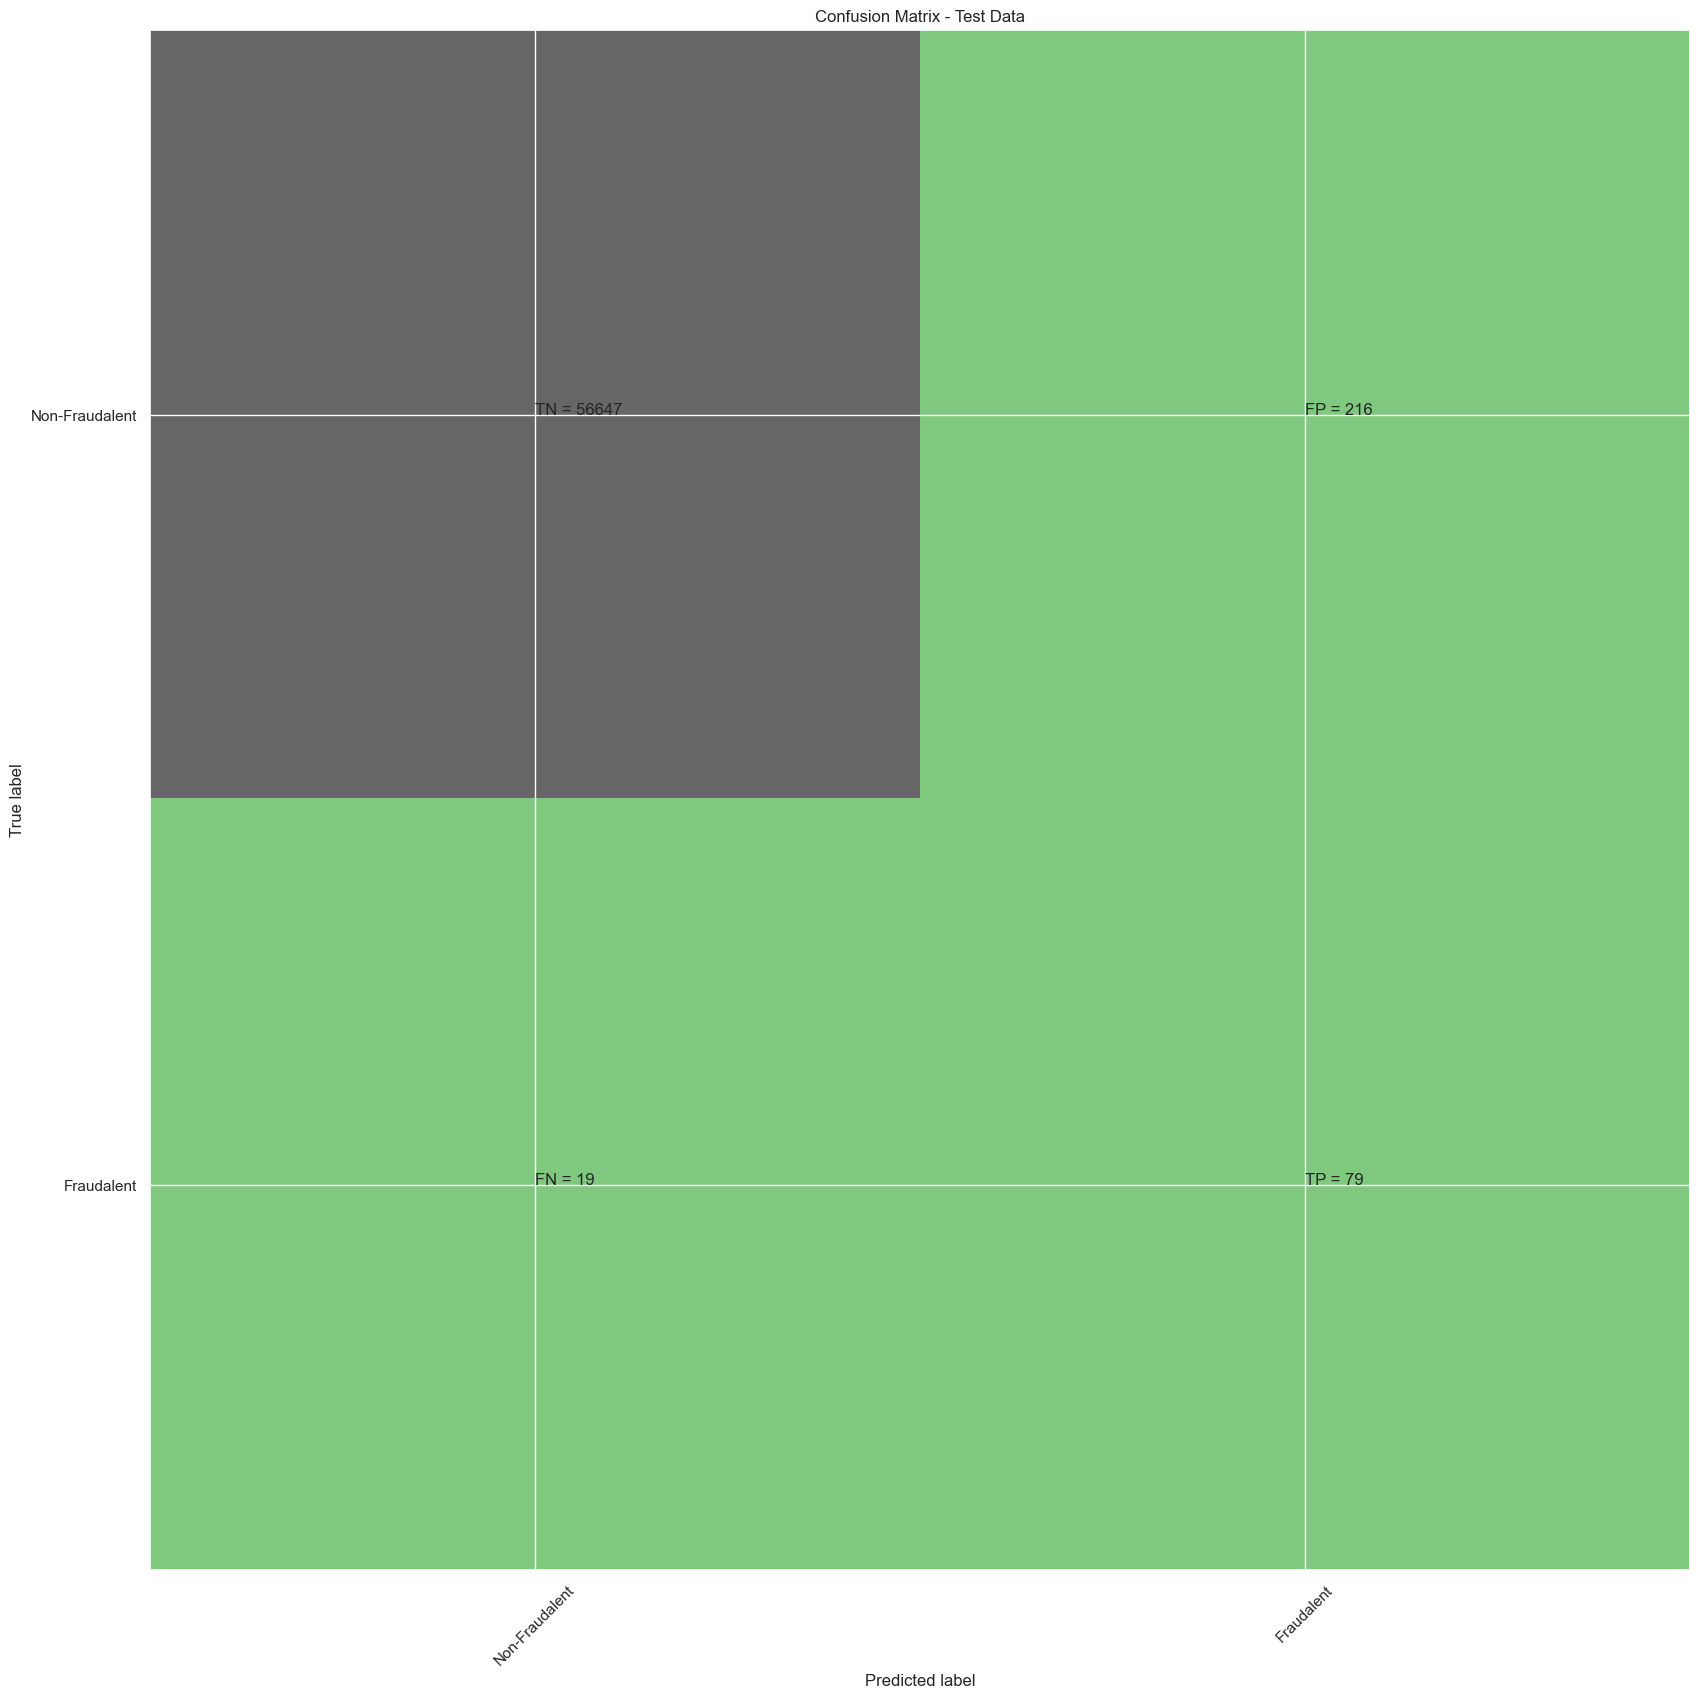

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.81      0.40        98

    accuracy                           1.00     56961
   macro avg       0.63      0.90      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9170723439473393
KNN threshold: 0.2
ROC for the test dataset: 91.7%


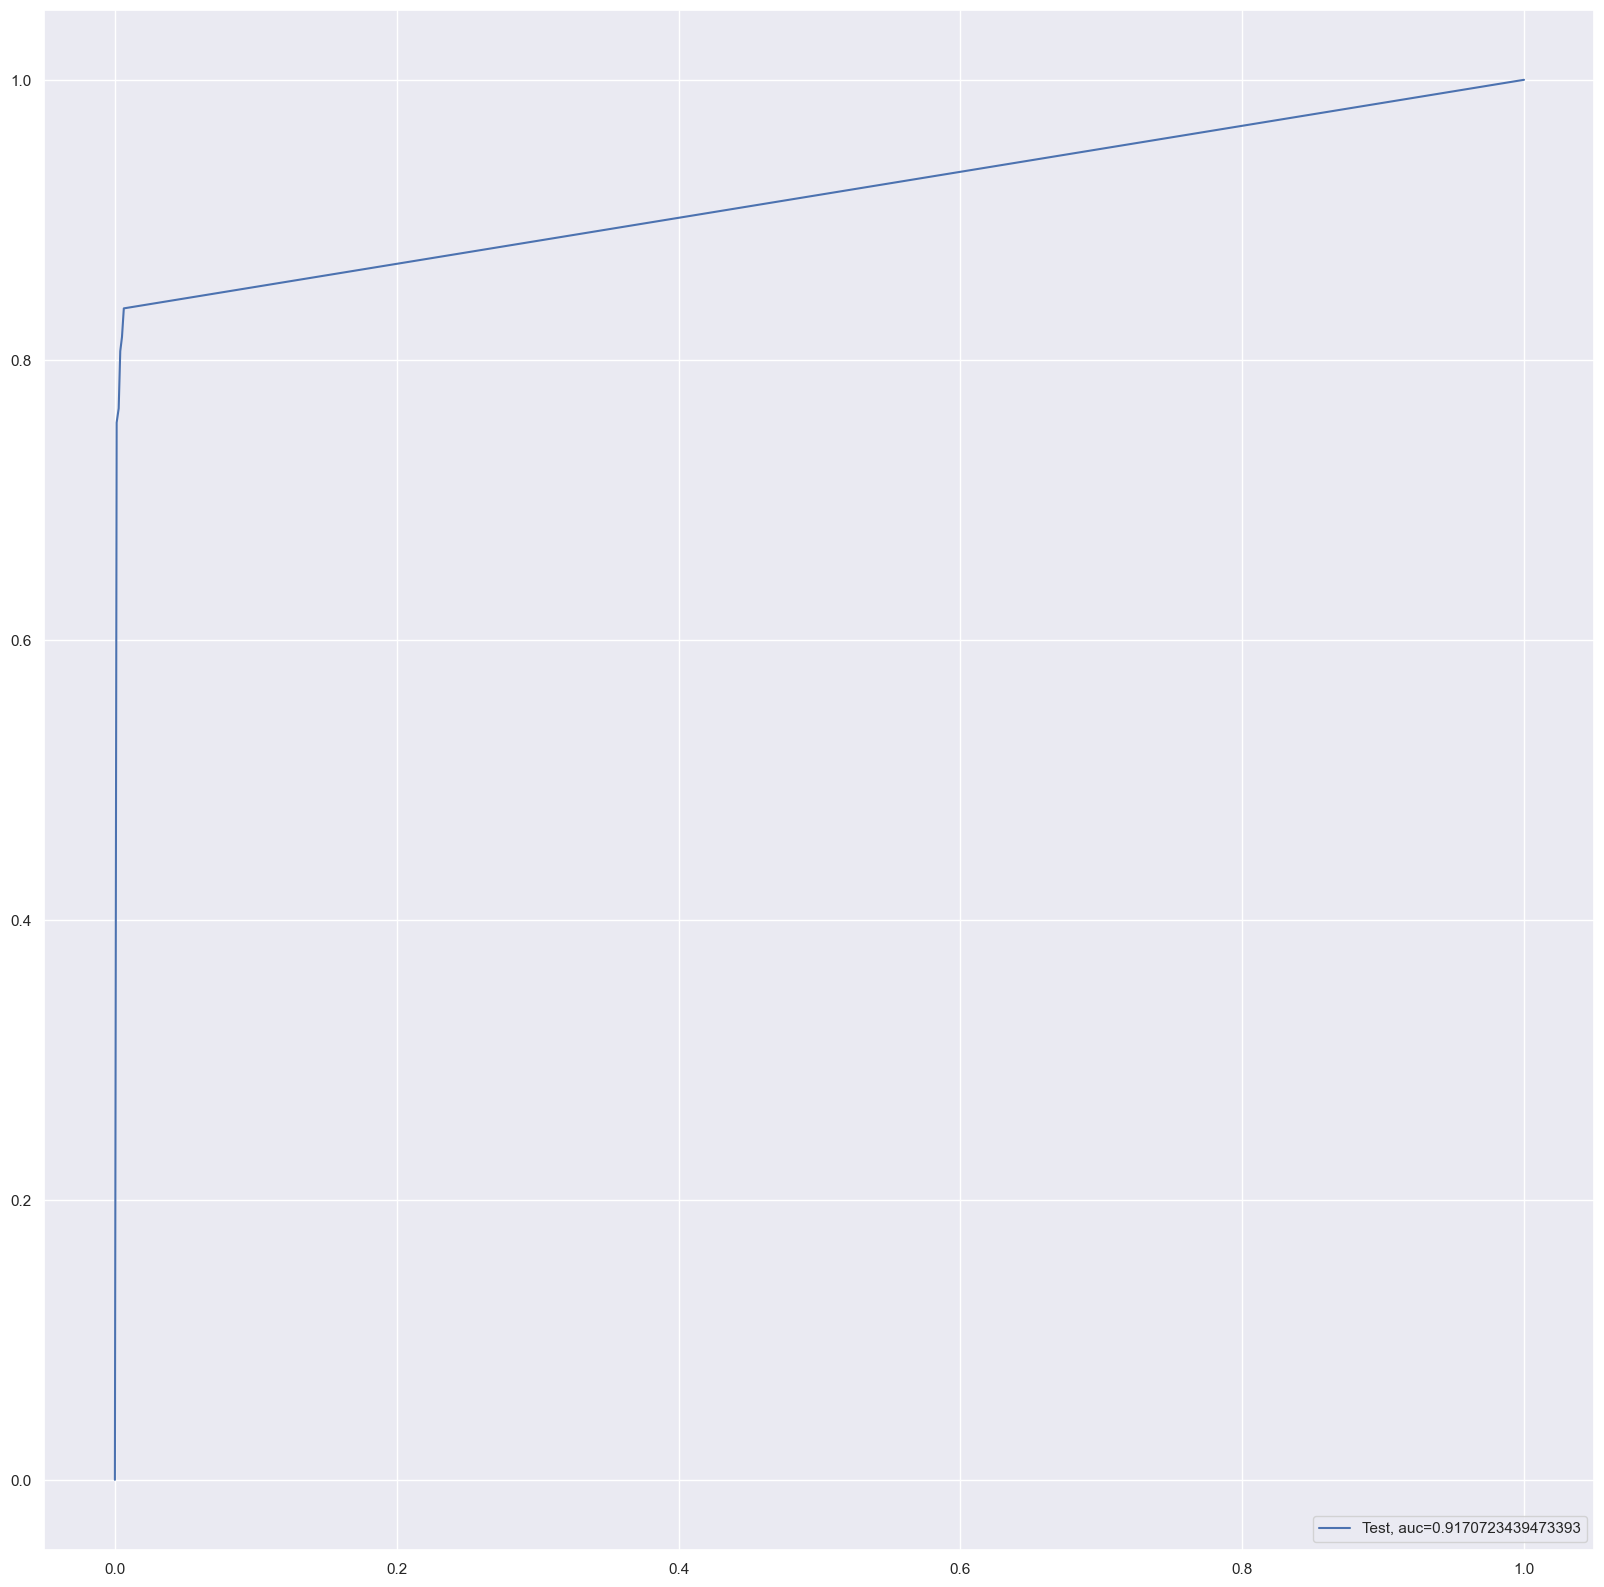

Time Taken by Model: --- 292.74348044395447 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9974543986236196
Confusion Matrix


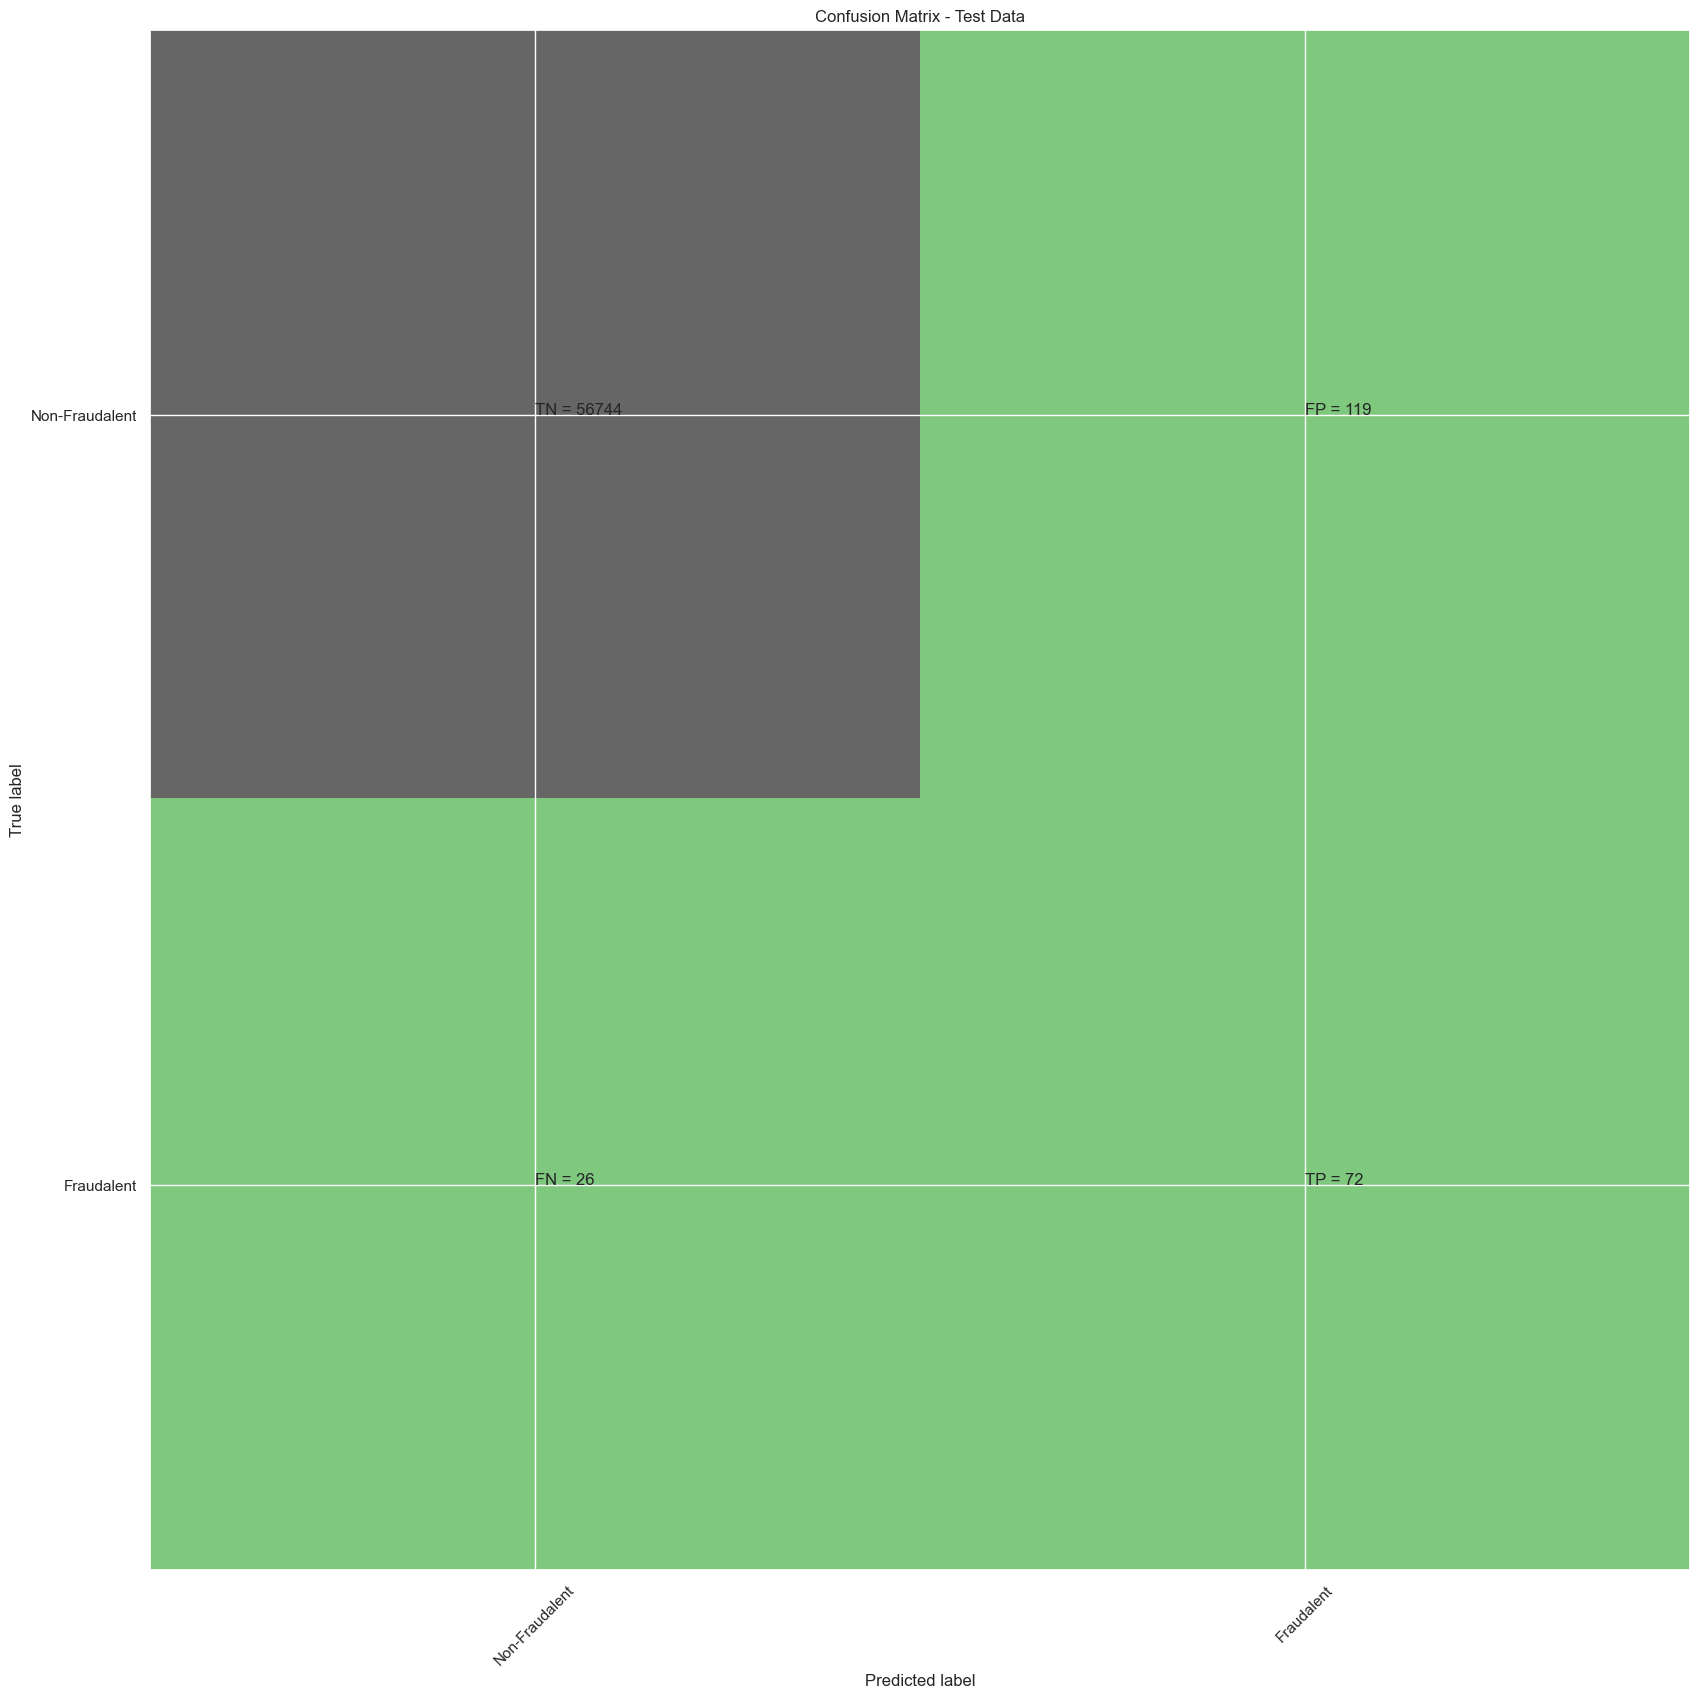

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.73      0.50        98

    accuracy                           1.00     56961
   macro avg       0.69      0.87      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8663005641558101
Tree threshold: 1.0
ROC for the test dataset 86.6%


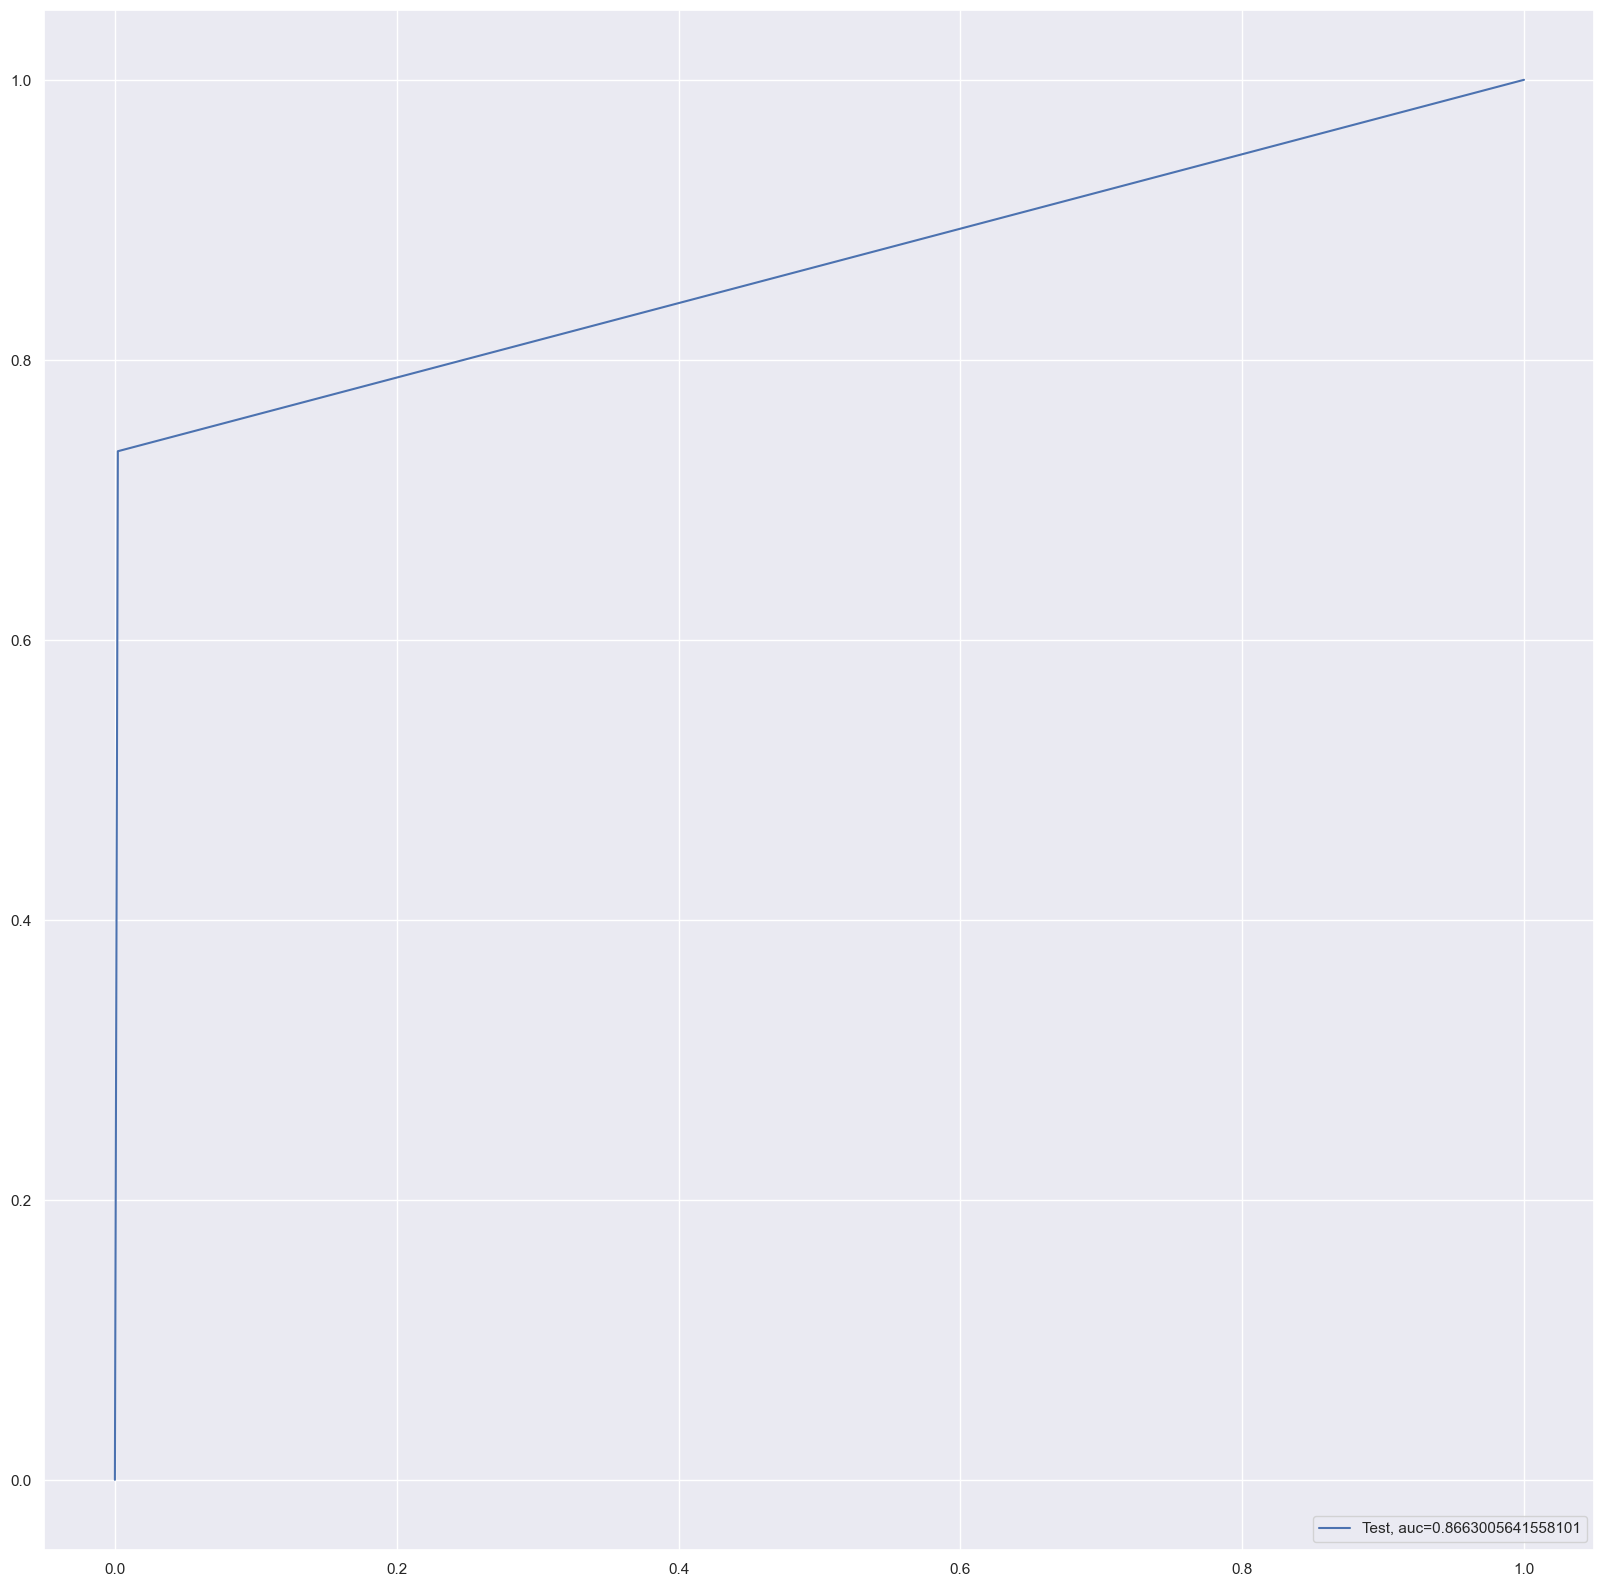

entropy score: 0.9976650690823546
Confusion Matrix


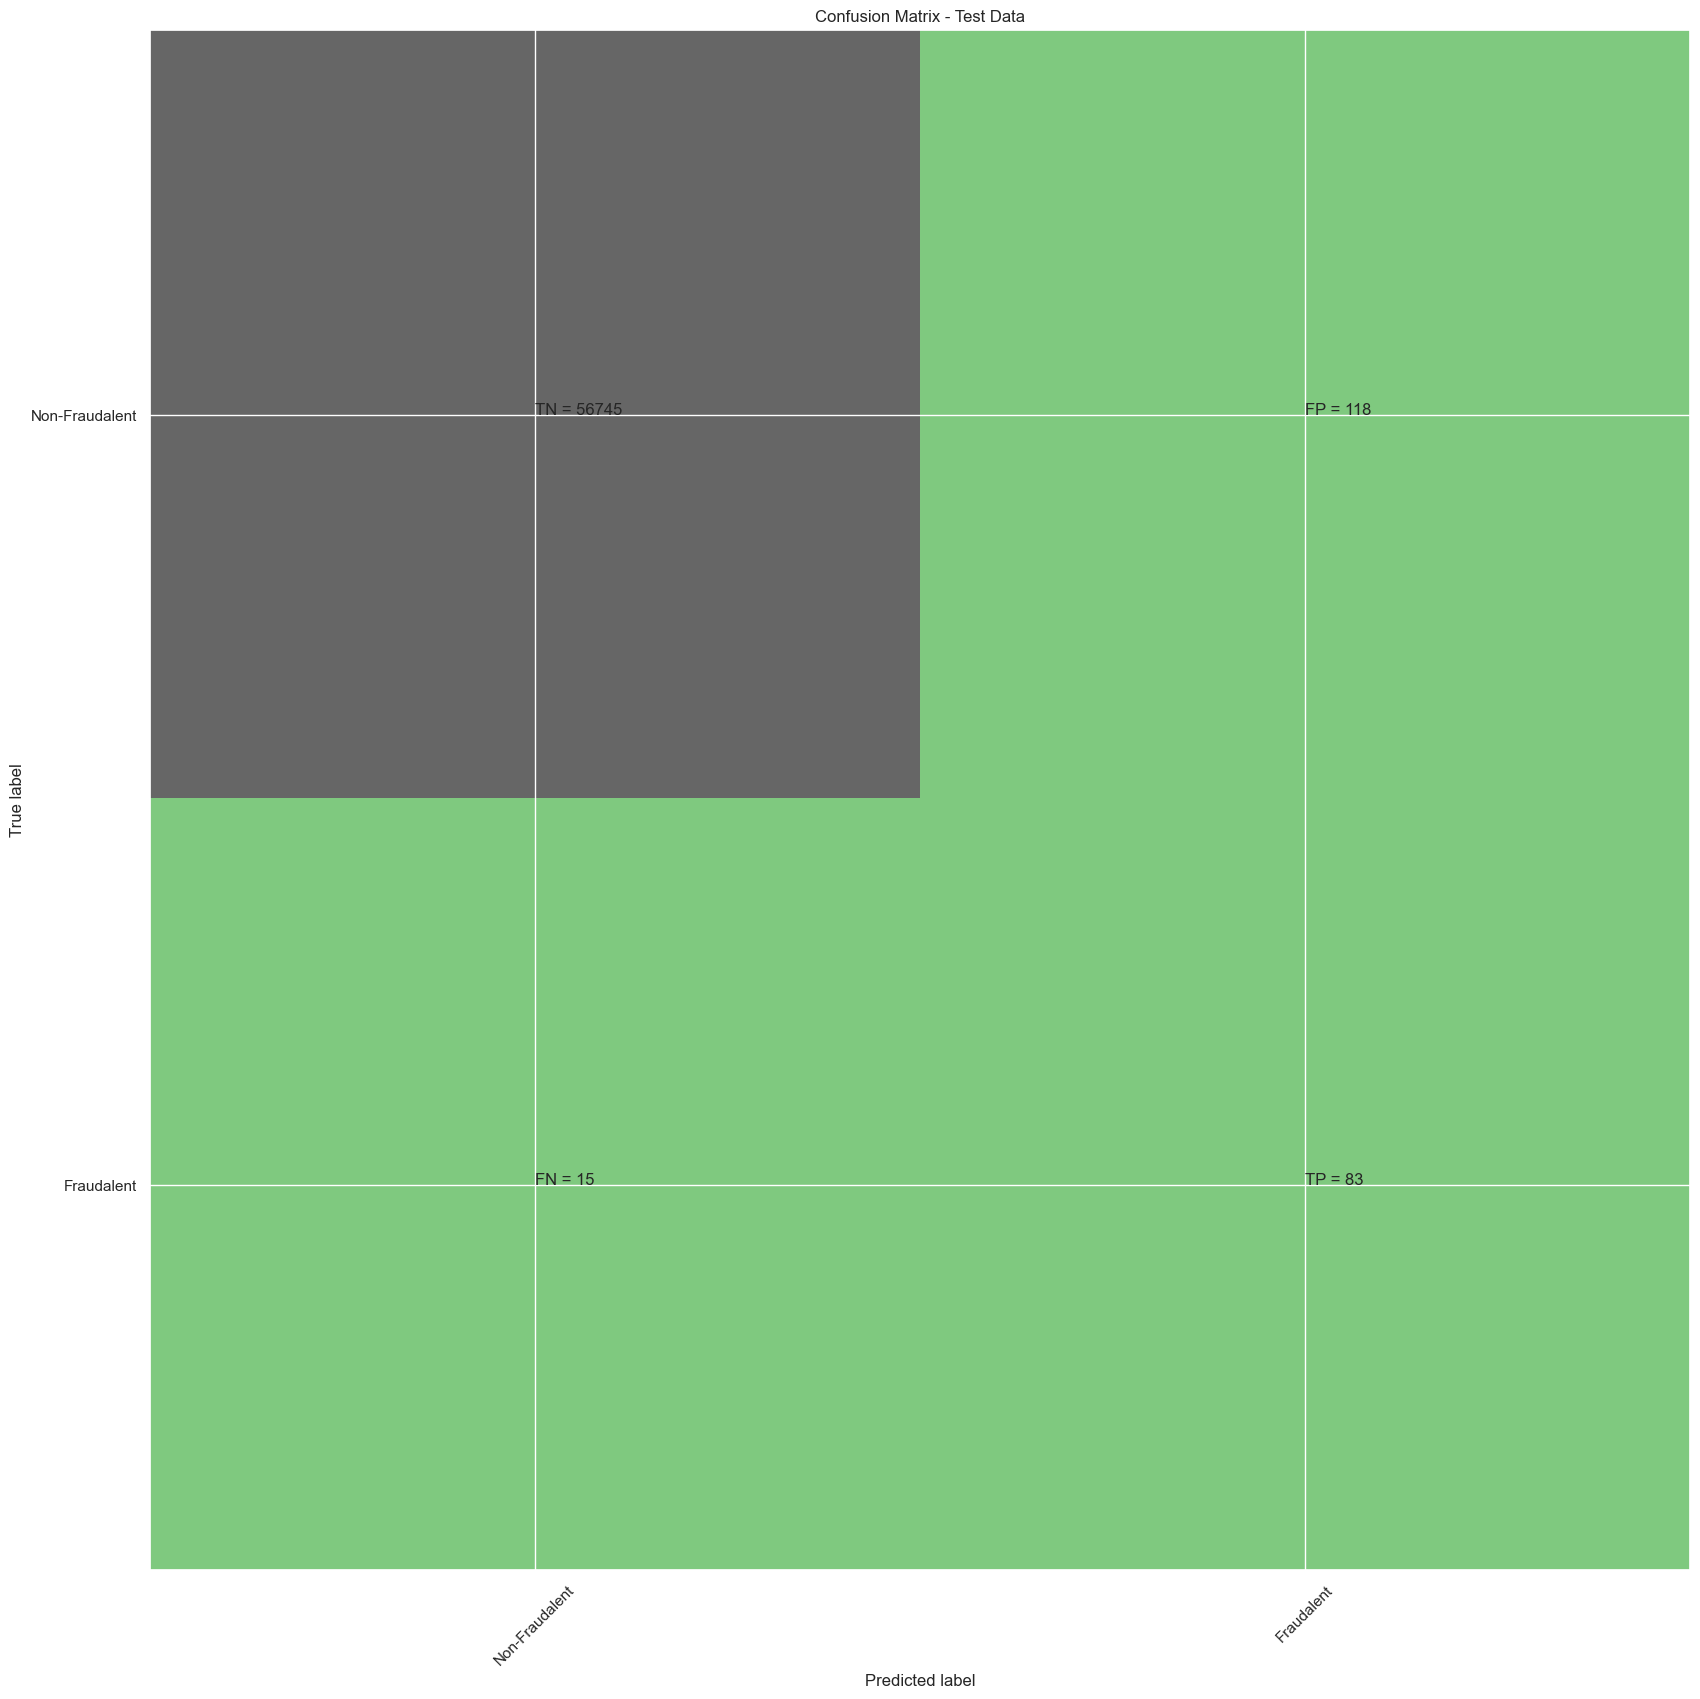

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.85      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9224318061994332
Tree threshold: 1.0
ROC for the test dataset 92.2%


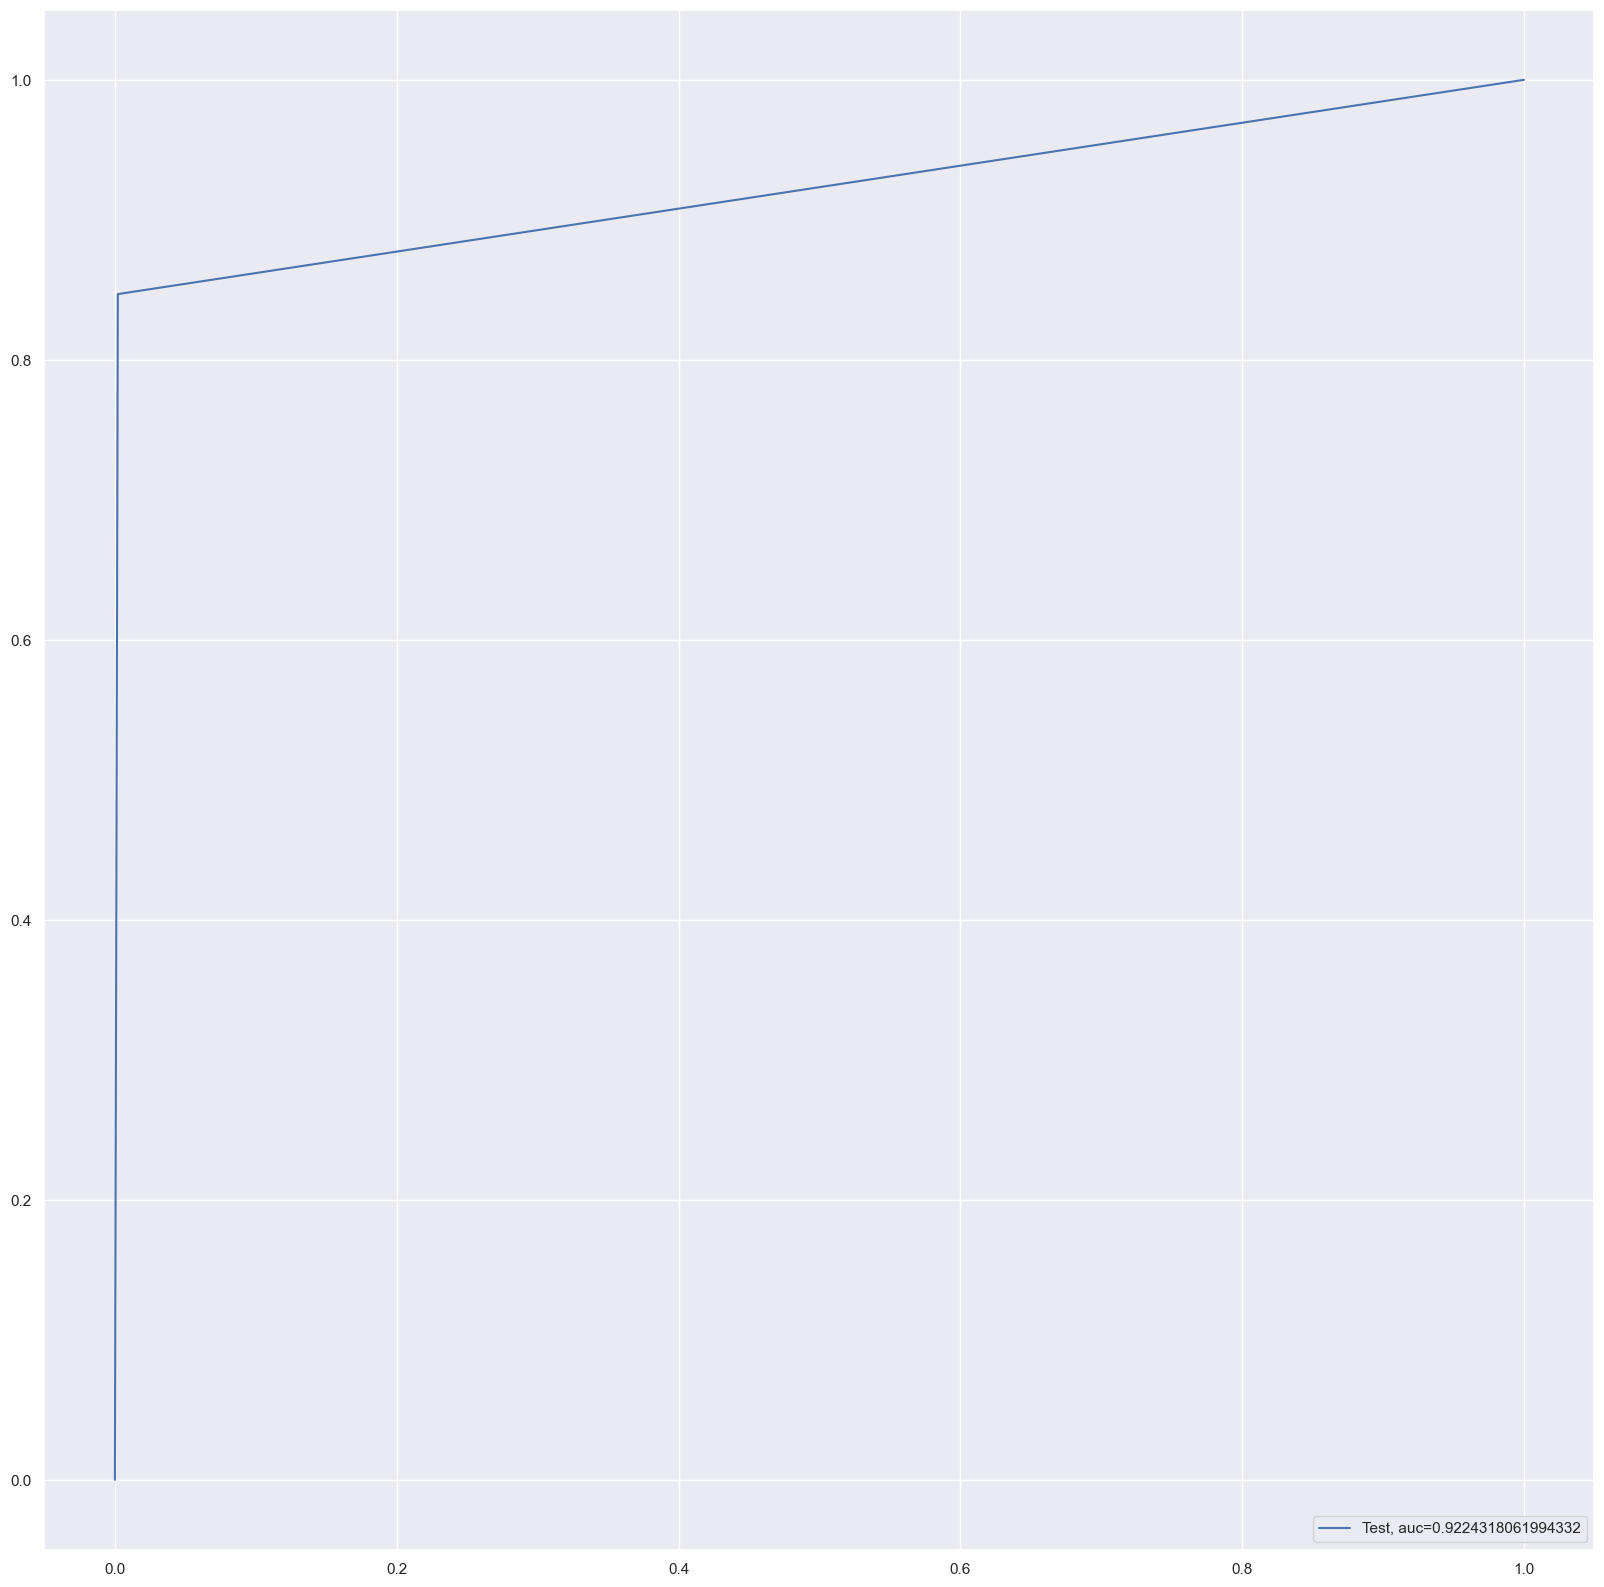

Time Taken by Model: --- 99.9503743648529 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


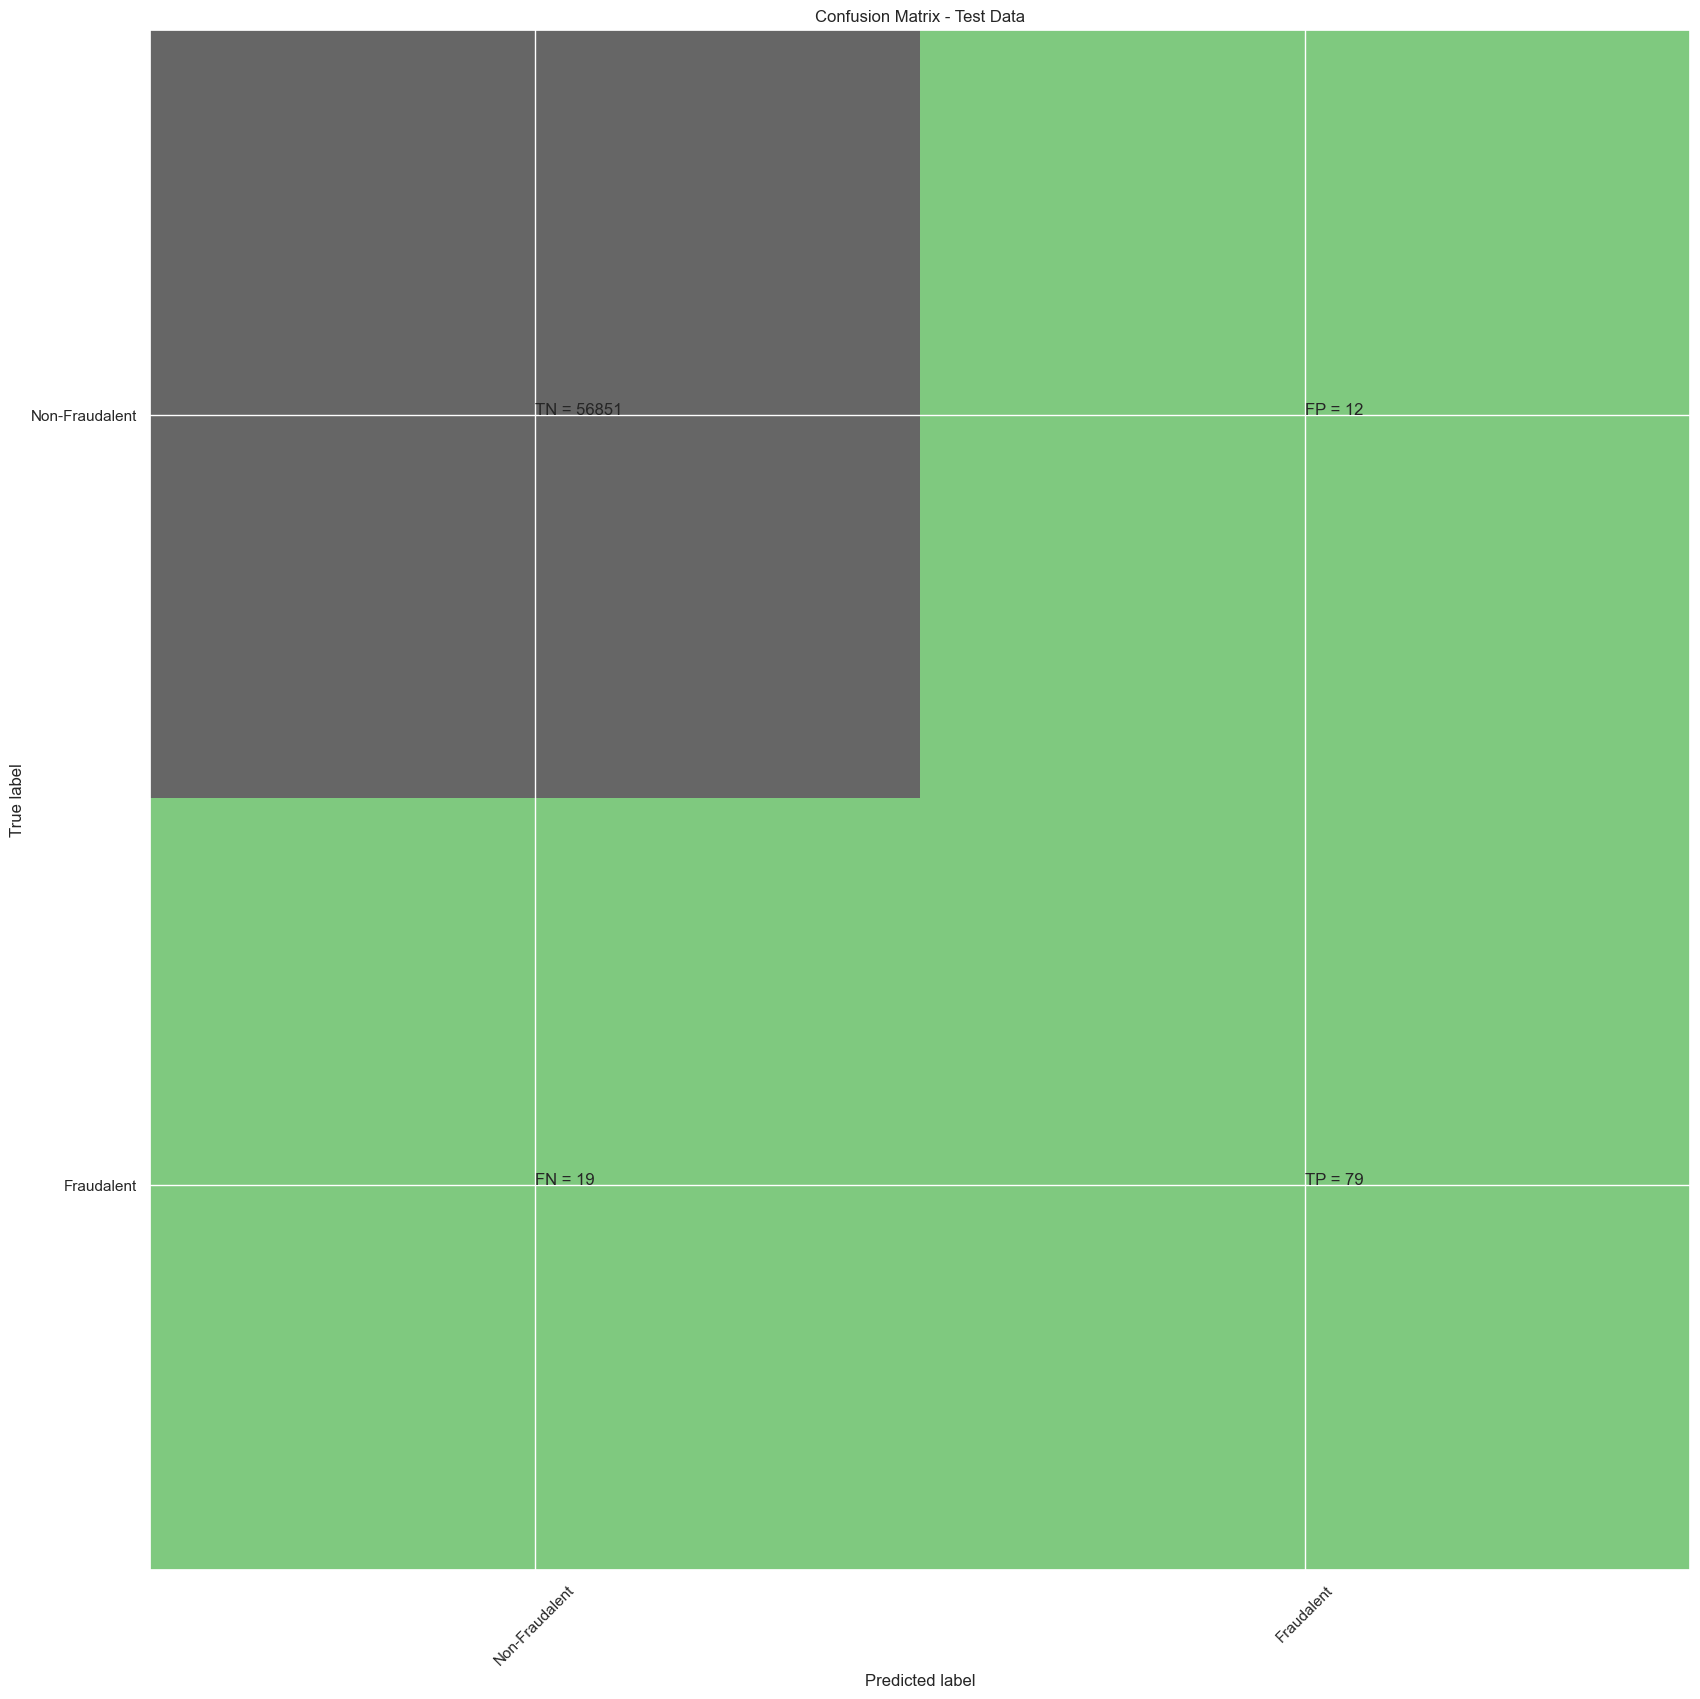

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.81      0.84        98

    accuracy                           1.00     56961
   macro avg       0.93      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9666913350993634
Random Forest threshold: 0.12
ROC for the test dataset 96.7%


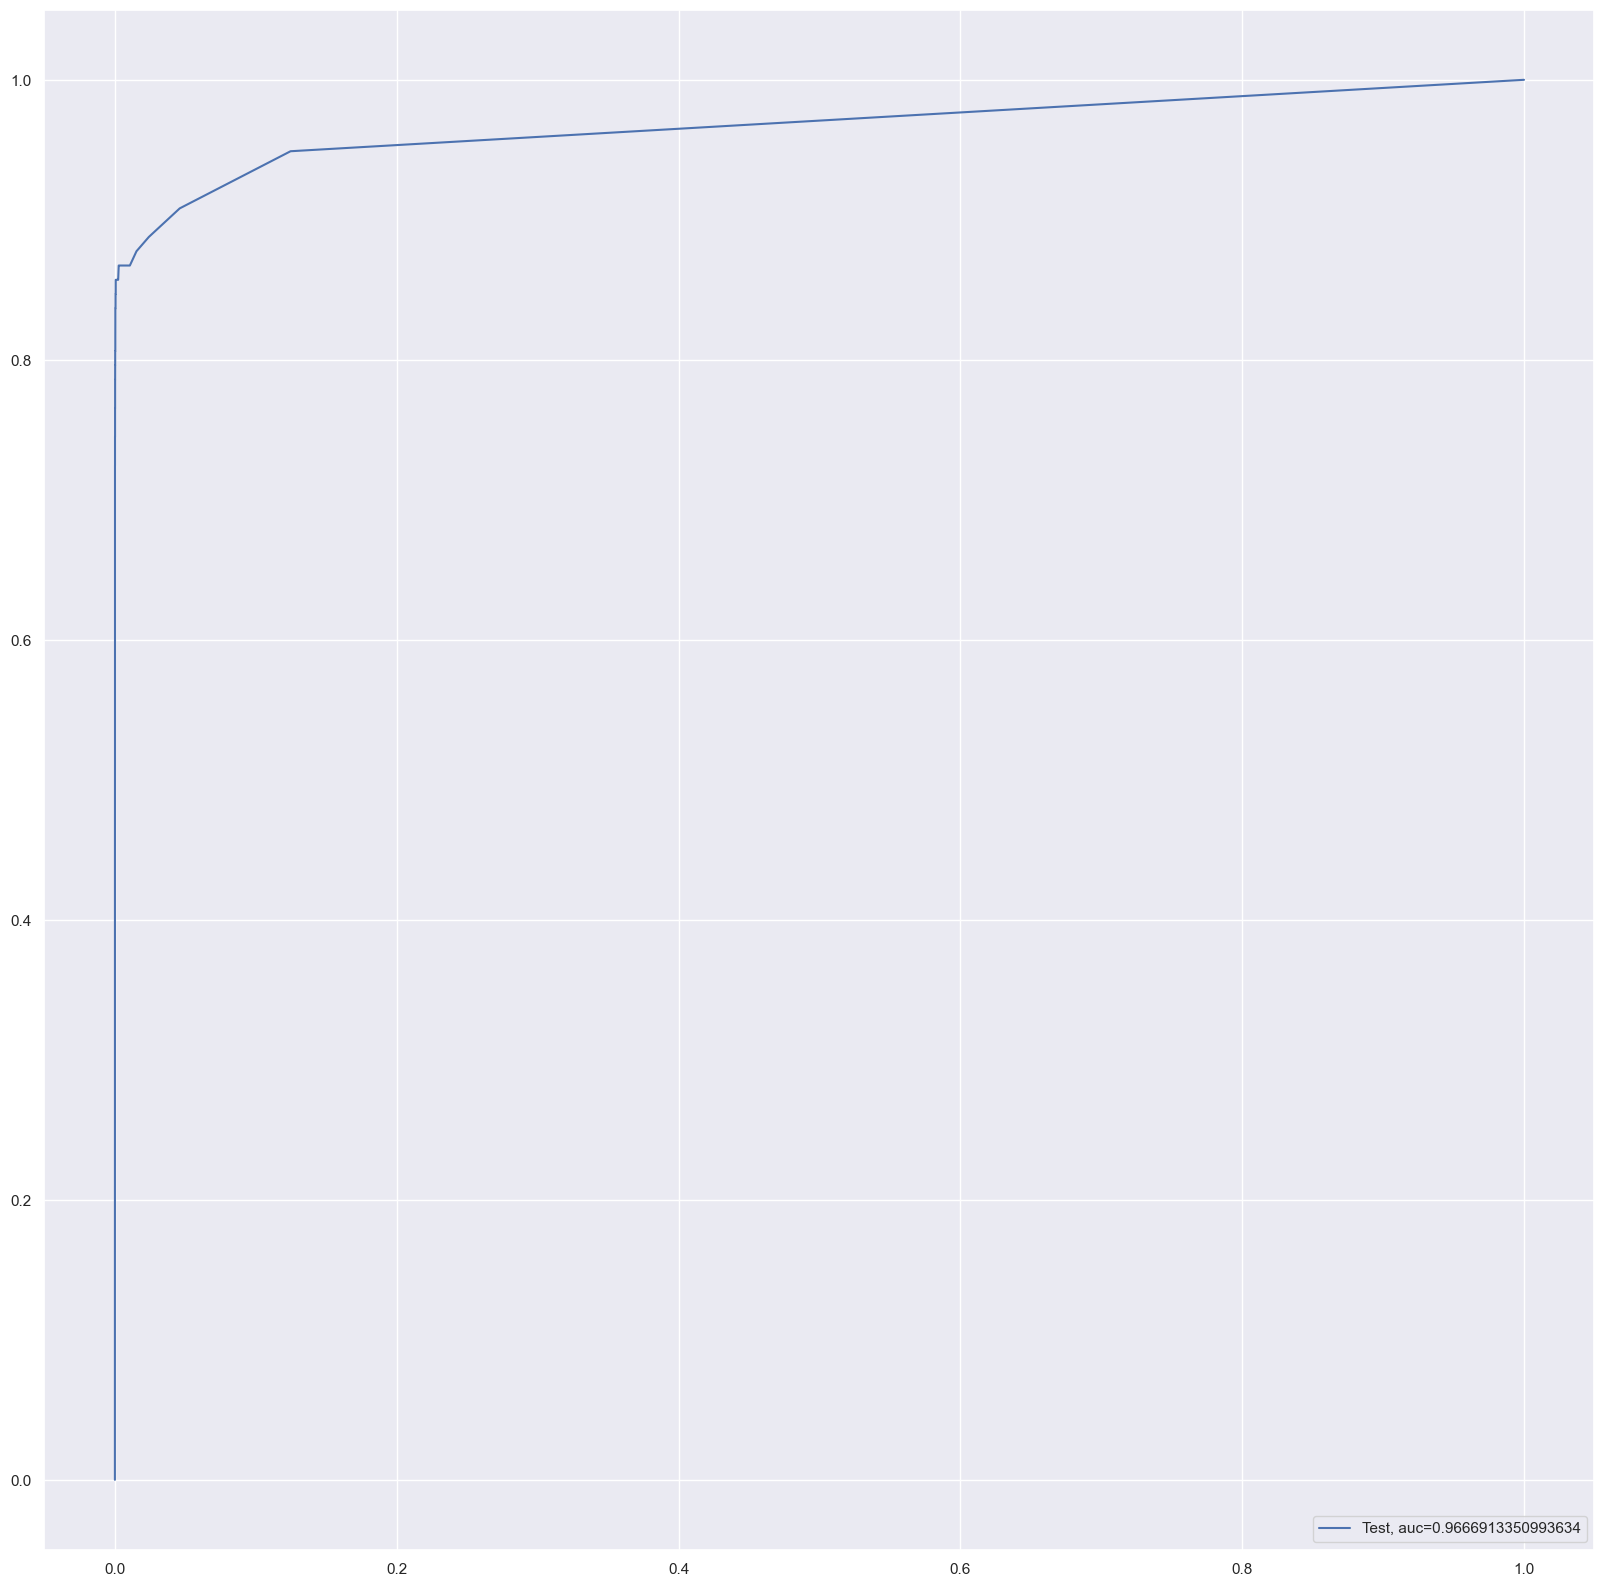

Time Taken by Model: --- 442.815048456192 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999280209265989
Confusion Matrix


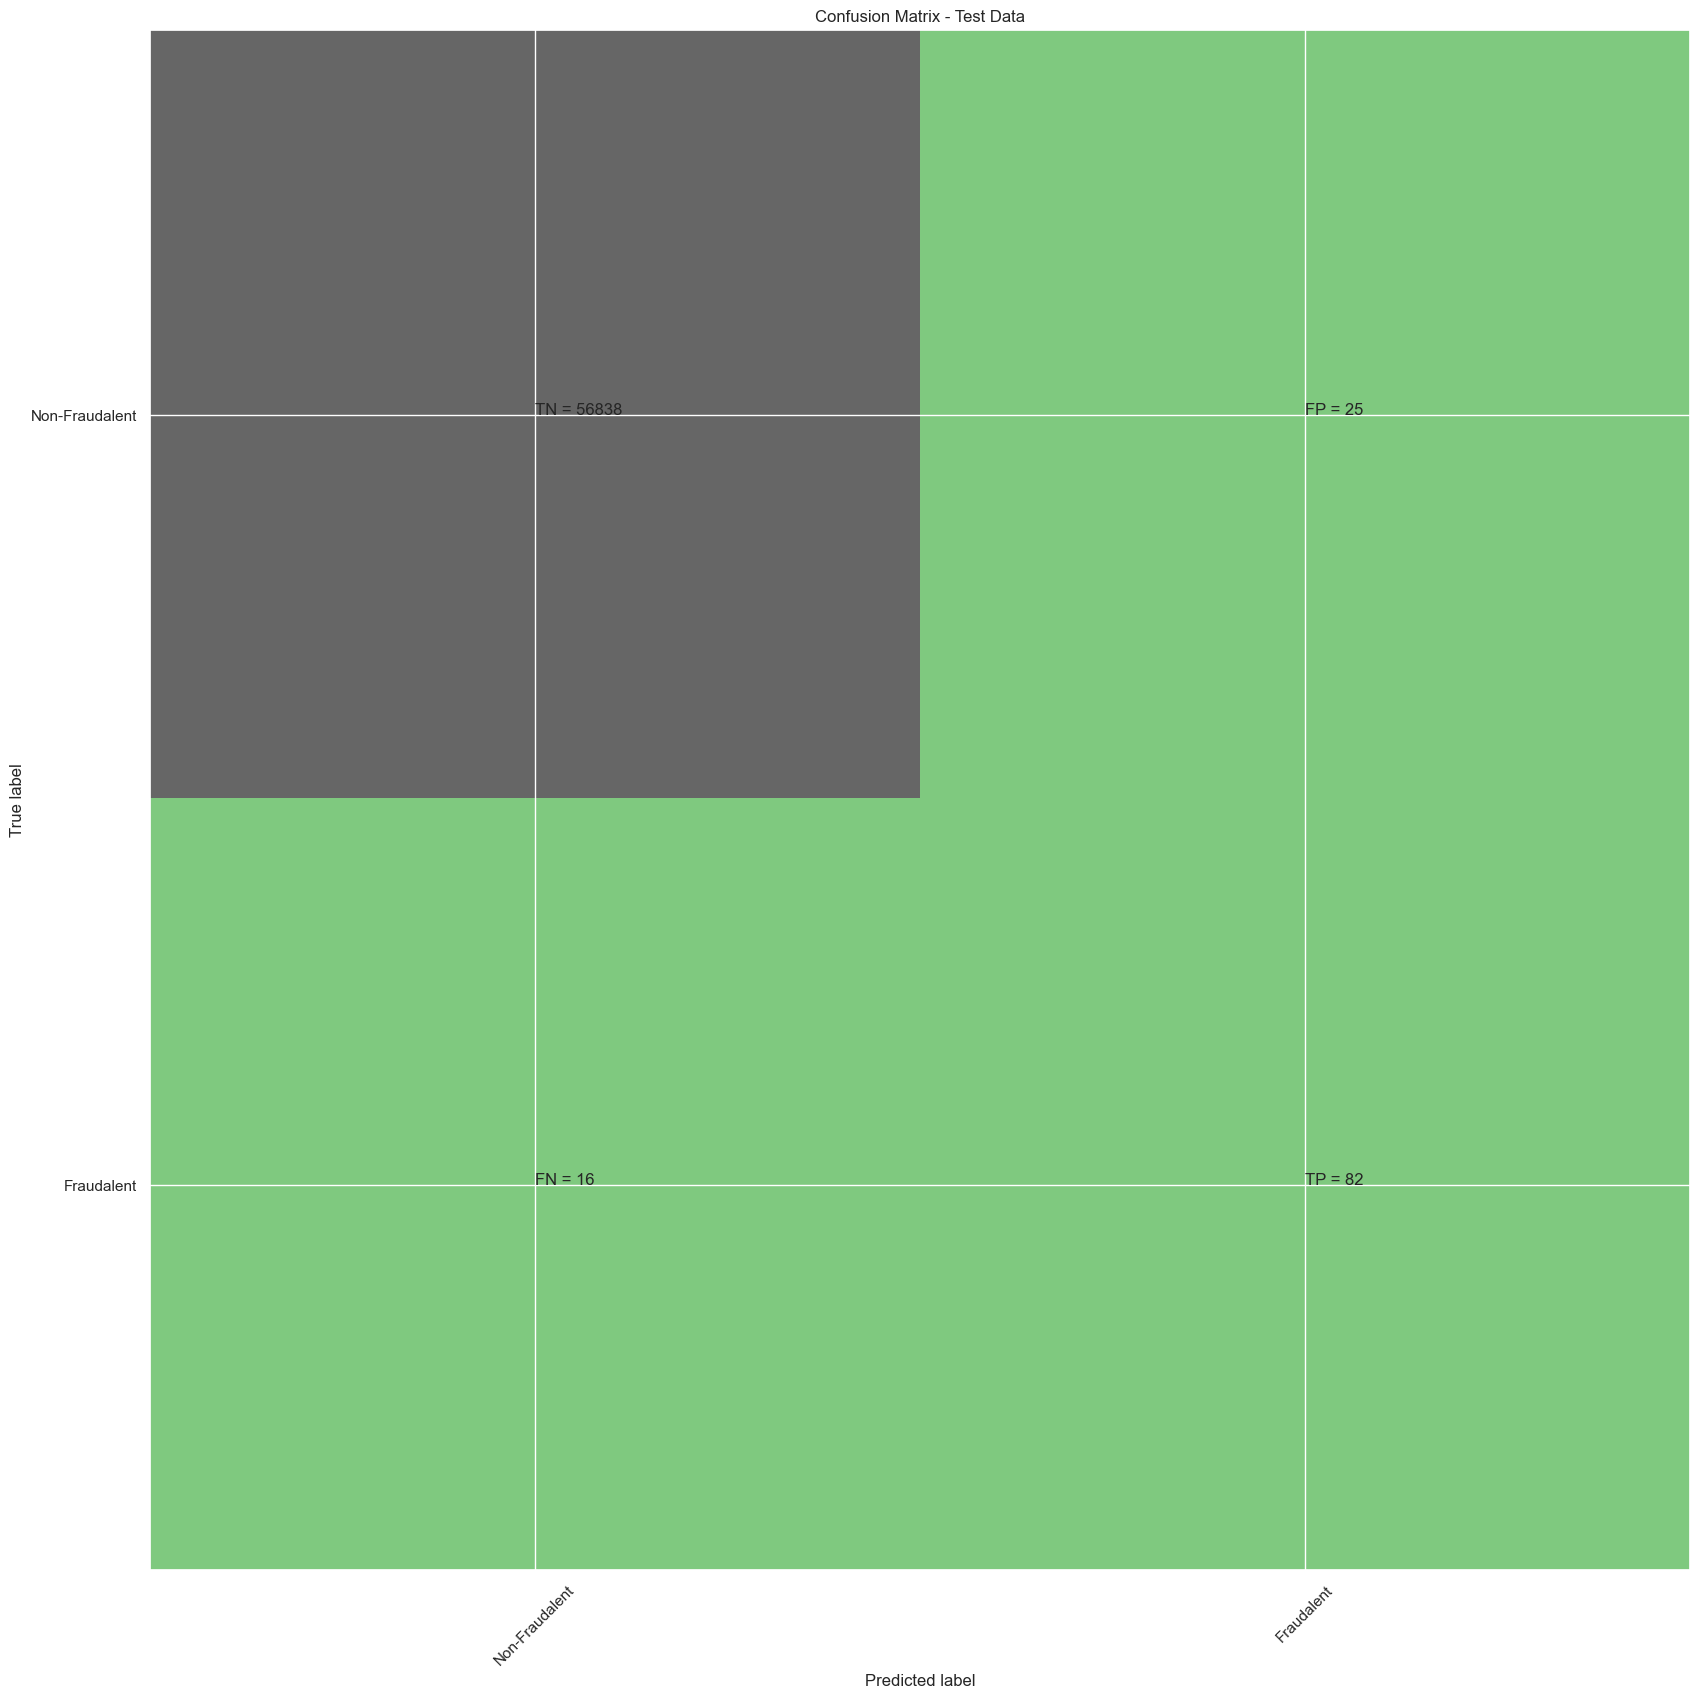

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56961
   macro avg       0.88      0.92      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.977744575487019
XGBoost threshold: 0.00029796044691465795
ROC for the test dataset 97.8%


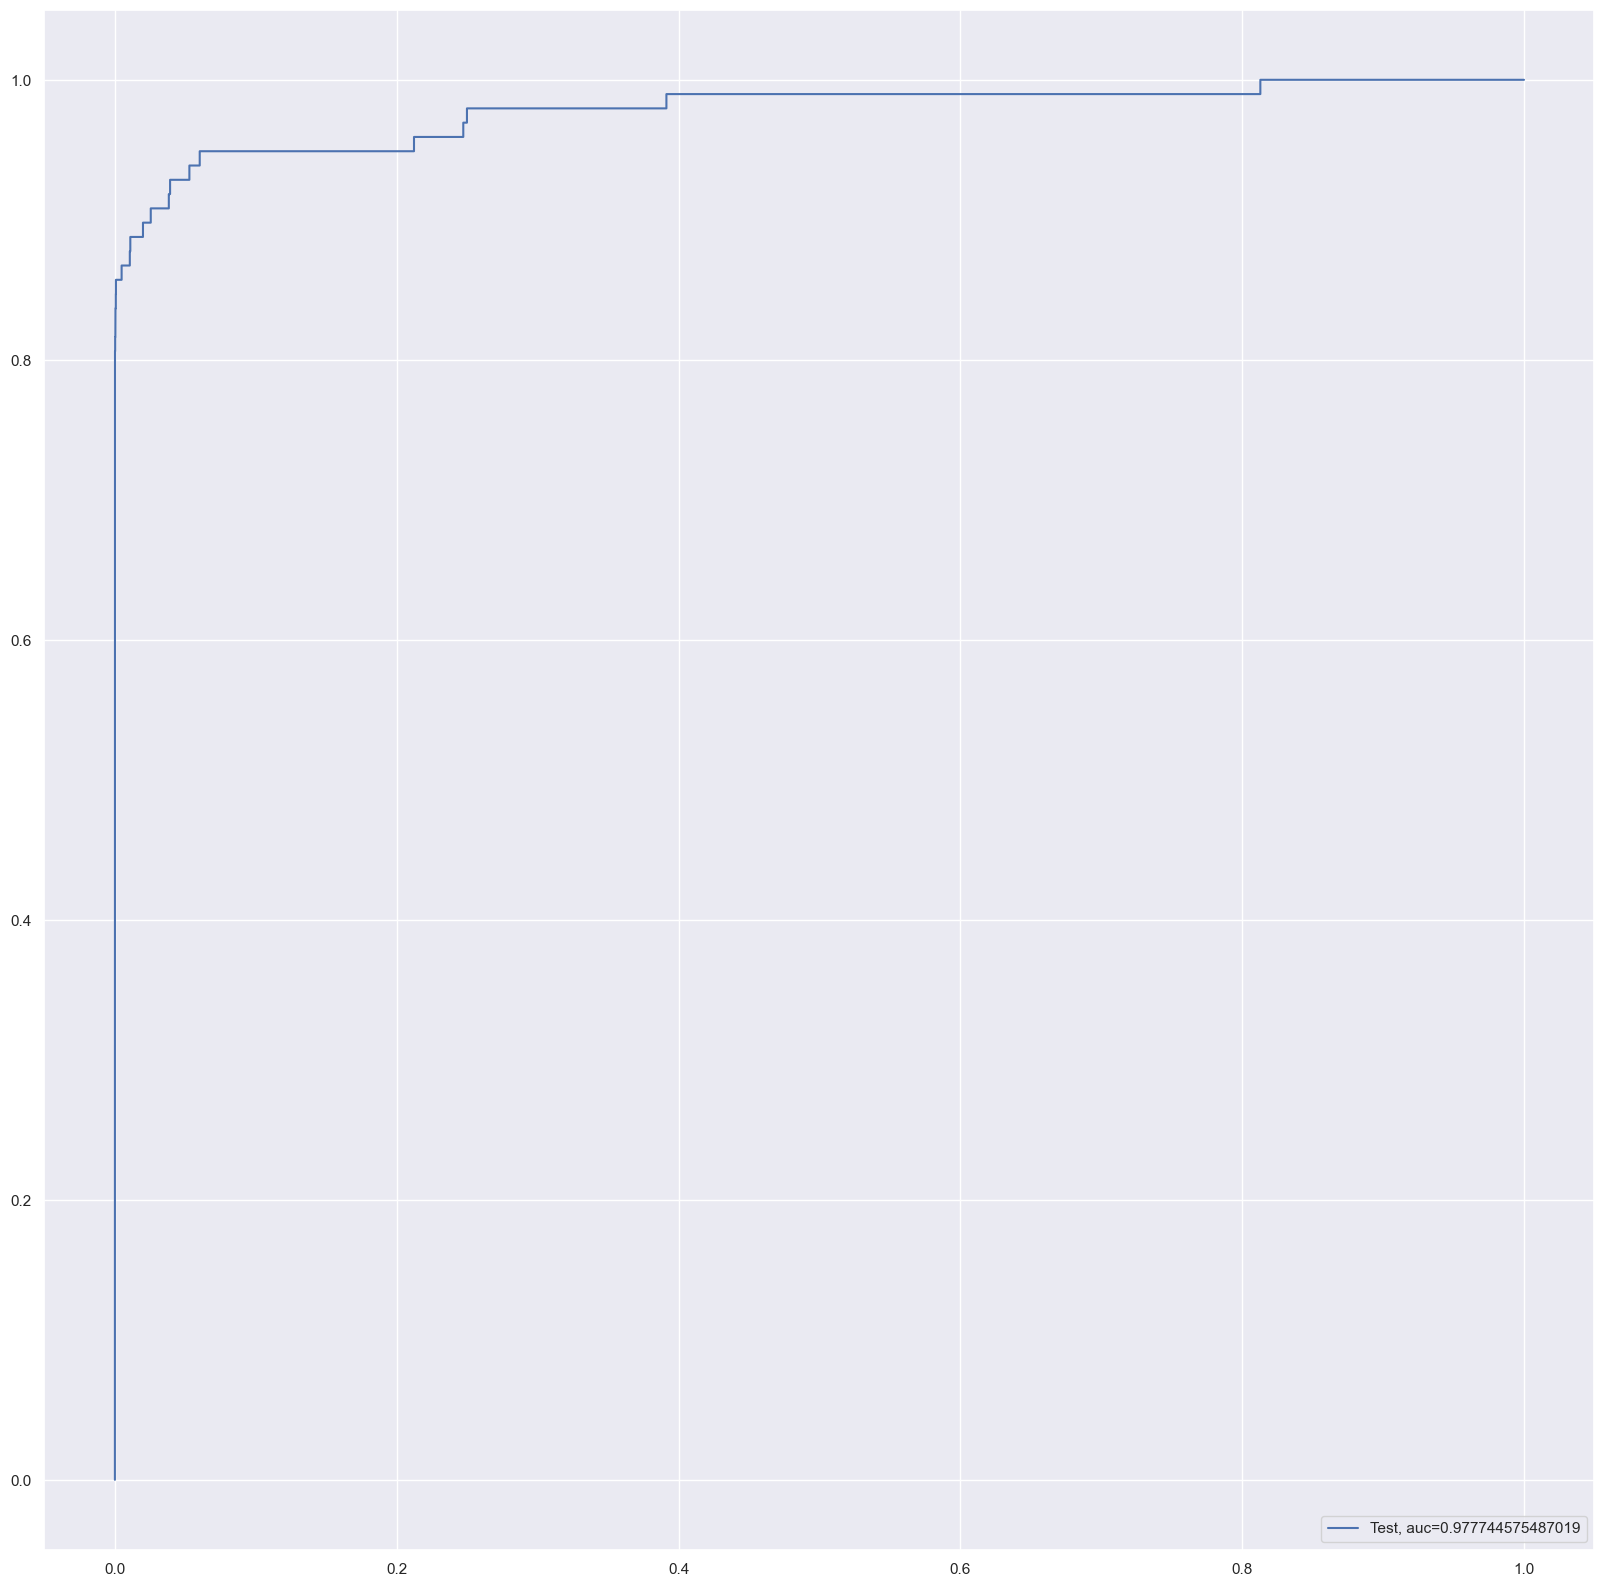

Time Taken by Model: --- 11.431971549987793 seconds ---
--------------------------------------------------------------------------------


In [80]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [81]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN                               Random Forest   
6                       NaN                                     XGBoost   
7                       NaN                                         SVM   
8                       NaN  Logistic Regression with L2 Regularisation   
9                       NaN  Logistic Regression with L1 Regularisation   
10                      NaN                                         KNN   
11                      NaN               Tree Model with gini criteria   
12                      NaN            Tree Model with entropy criteria   
13                      NaN                               Random Forest   
14                      NaN                                     XGBoost   
15                      NaN                                         SVM   
16                      NaN  Logistic Regression with L2 Regularisation   
17                      NaN  Logistic Regression with L1 Regularisation   
18                      NaN                                         KNN   
19                      NaN               Tree Model with gini criteria   
20                      NaN            Tree Model with entropy criteria   
21                      NaN                               Random Forest   
22                      NaN                                     XGBoost   
23                      NaN                                         SVM   
24                      NaN  Logistic Regression with L2 Regularisation   
25                      NaN  Logistic Regression with L1 Regularisation   
26                      NaN                                         KNN   
27                      NaN               Tree Model with gini criteria   
28                      NaN            Tree Model with entropy criteria   
29                      NaN                               Random Forest   
30                      NaN                                     XGBoost   
31                      NaN                                         SVM   
32                      NaN  Logistic Regression with L2 Regularisation   
33                      NaN  Logistic Regression with L1 Regularisation   
34                      NaN                                         KNN   
35                      NaN               Tree Model with gini criteria   
36                      NaN            Tree Model with entropy criteria   
37                      NaN                               Random Forest   
38                      NaN                                     XGBoost   
39                      NaN  Logistic Regression with L2 Regularisation   
40                      NaN  Logistic Regression with L1 Regularisation   
41                      NaN                                         KNN   
42                      NaN               Tree Model with gini criteria   
43                      NaN            Tree Model with entropy criteria   
44                      NaN                               Random Forest   
45                      NaN                                     XGBoost   
46                      NaN  Logistic Regression with L2 Regularisation   
47                      NaN  Logistic Regression with L1 Regularisation   
48                      NaN                                         KNN   
49                      NaN               Tree Model with gini criteria   
50                      NaN            Tree Model with entropy criteria   
51                      NaN                               Random Forest   
52                      NaN 

## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


## But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [82]:
#Evaluate XGboost model
from xgboost import XGBClassifier

# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9998771088990713
XGboost roc_value: 0.998280148455633
XGBoost threshold: 0.0003289014275651425


In [83]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_test = {
 'max_depth': range(3, 10, 2),
 'min_child_weight': range(1, 6, 2)
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                learning_rate=0.1, max_delta_step=0, max_depth=3,
                                                min_child_weight=1, n_estimators=100, n_jobs=1,nthread=None,
                                                objective='binary:logistic', random_state=42,seed=None,
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                                subsample=1, verbosity=1),
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5)

# Fit the model
gsearch1.fit(X_over, y_over)

# Get the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([13.65663872, 14.51171012, 13.56804576, 16.63375669, 19.38772335,
         23.18657875, 21.93189945, 18.73832531, 18.21602325, 21.23609257,
         23.03111362, 21.87670178]),
  'std_fit_time': array([0.75842359, 0.84043608, 0.10320265, 0.33069618, 2.34748663,
         0.70632589, 2.66775112, 0.22523224, 0.32344367, 1.06165712,
         0.92746092, 0.89437211]),
  'mean_score_time': array([0.37578688, 0.36239448, 0.34560332, 0.4579392 , 0.75417051,
         0.69800267, 0.64683118, 0.6286448 , 0.63444276, 0.72578969,
         0.79634585, 0.6236433 ]),
  'std_score_time': array([0.04620417, 0.02104758, 0.02777818, 0.02790819, 0.1820633 ,
         0.09376179, 0.03110362, 0.02863883, 0.04105199, 0.13290142,
         0.10079625, 0.09092754]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_test = {
 'n_estimators': range(60, 150, 20)
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                learning_rate=0.1, max_delta_step=0, max_depth=9,
                                                min_child_weight=5, n_estimators=100, n_jobs=1,nthread=None,
                                                objective='binary:logistic', random_state=42,seed=None,
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                                subsample=1, verbosity=1),
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5)

# Fit the model
gsearch1.fit(X_over, y_over)

# Get the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([15.28285899, 21.80993624, 27.92145615, 27.43911862, 31.17158442]),
  'std_fit_time': array([1.22769711, 1.43526143, 0.35827387, 1.19719748, 2.56857157]),
  'mean_score_time': array([0.51850362, 0.71699119, 0.84511895, 0.93806448, 1.01941972]),
  'std_score_time': array([0.05231865, 0.2096707 , 0.07933576, 0.14898971, 0.14175562]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99941546, 0.99946698, 0.99947671, 0.99960541, 0.99962124]),
  'split1_test_score': array([1., 1., 1., 1., 1.]),
  'split2_test_score': array([0.93622693, 0.99459606, 0.99815993, 0.9994421 , 0.99976038]),
  'split3_test_score': array([0.99991448, 0.99992982, 0.99993346, 0.99993142, 0.99993676

In [86]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_test = {
 'n_estimators': [110, 120, 130],
 'max_depth': [2, 3, 4],
 'min_child_weight': [4, 5, 6]
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                learning_rate=0.1, max_delta_step=0, max_depth=9,
                                                min_child_weight=5, n_estimators=140, n_jobs=1,nthread=None, 
                                                objective='binary:logistic', random_state=42,seed=None,
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                                subsample=1, verbosity=1),
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5)

# Fit the model
gsearch1.fit(X_over, y_over)

# Get the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([17.46661272, 20.45610085, 16.69884791, 17.14399571, 14.67400684,
         18.72809348, 20.88805666, 18.22148795, 16.6797658 , 17.47440591,
         19.99496307, 23.78299732, 18.33812847, 16.24132681, 17.07086687,
         15.91909442, 17.15438871, 19.21621404, 24.25294375, 24.25167823,
         20.05313082, 17.9194119 , 18.68948746, 20.07540727, 17.46171689,
         18.36022429, 19.12695165]),
  'std_fit_time': array([2.49275214, 3.38691035, 0.82188067, 1.45952144, 0.24374055,
         4.49001771, 1.52033423, 1.17117083, 0.80861541, 1.54750467,
         3.07043218, 0.55228932, 1.26104353, 0.37880347, 0.59015112,
         0.57400775, 0.81270894, 1.36098137, 2.13277551, 0.58964659,
         1.19756486, 1.10447508, 0.48541761, 0.32629019, 0.45913593,
         0.36479416, 0.45921487]),
  'mean_score_time': array([0.40196762, 0.3929749 , 0.48772187, 0.32521396, 0.30302835,
         0.5616787 , 0.4545414 , 0.40057731, 0.42135921, 0.47193127,
         0.48612714, 0.

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for learning_rate
param_test = {
 'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2]
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                learning_rate=0.1, max_delta_step=0, max_depth=3,
                                                min_child_weight=4, n_estimators=130, n_jobs=1,nthread=None, 
                                                objective='binary:logistic', random_state=42,seed=None,
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                                subsample=1, verbosity=1),
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5)

# Fit the model
gsearch1.fit(X_over, y_over)

# Get the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([17.4743957 , 18.08678184, 16.55246062, 15.81235256, 14.12768068]),
  'std_fit_time': array([1.0773844 , 1.42764108, 0.05657418, 0.45322726, 2.74348016]),
  'mean_score_time': array([0.40077267, 0.41476345, 0.43215294, 0.42435865, 0.3338098 ]),
  'std_score_time': array([0.02164105, 0.01798063, 0.04396815, 0.04036722, 0.06502547]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99817284, 0.99942883, 0.9995357 , 0.99951337, 0.99958385]),
  'split1_test_score': array([0.99919024, 0.99992707, 0.9999595 , 0.99997482, 0.99998453]),
  'split2_test_score': array([0.99090232, 0.99901971, 0.99836298, 0.99906548, 0.99918936]),
  'split3_test_score': array([

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for gamma
param_test = {
 'gamma': [i/10.0 for i in range(0, 5)]
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                learning_rate=0.2, max_delta_step=0, max_depth=3,
                                                min_child_weight=4, n_estimators=130, n_jobs=1,nthread=None, 
                                                objective='binary:logistic', random_state=42,seed=None,
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                                subsample=1, verbosity=1),
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5)

# Fit the model
gsearch1.fit(X_over, y_over)

# Get the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([16.93830662, 17.01447425, 16.88754554, 19.63825974, 16.47077584]),
  'std_fit_time': array([0.55826801, 1.10485173, 0.8905594 , 0.96621924, 2.82855437]),
  'mean_score_time': array([0.45573888, 0.44734488, 0.43615322, 0.41576223, 0.41416421]),
  'std_score_time': array([0.03616307, 0.04926531, 0.02877818, 0.01891005, 0.11783886]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99958385, 0.99958385, 0.99958385, 0.99952856, 0.99951698]),
  'split1_test_score': array([0.99998453, 0.99998602, 0.99998659, 0.99998659, 0.9999871 ]),
  'split2_test_score': array([0.99918936, 0.99918936, 0.99918936, 0.99918988, 0.99878928]),
  'split3_test_score': array([0.9998739 , 0.9998739 , 0.99987796, 0.99988169, 0.999876

In [89]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming X_over, y_over, X_test, and y_test are already defined and preprocessed

# Define and fit the model
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=3,seed=None,
              min_child_weight=4, n_estimators=130, n_jobs=1,reg_alpha=0,nthread=None,
              objective='binary:logistic', random_state=42,reg_lambda=1, scale_pos_weight=1,
              subsample=1, verbosity=1,missing=np.nan)
XGBmodel.fit(X_over, y_over)

# Model accuracy on test data
XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost Optimal Threshold: {0}".format(threshold))

Model Accuracy: 0.9992099857797441
XGBoost ROC AUC: 0.9980730628251863
XGBoost Optimal Threshold: 0.05881219357252121


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_test = {
    'subsample': [i/10.0 for i in range(7, 10)],
    'colsample_bytree': [i/10.0 for i in range(7, 10)]
}

# Initialize the GridSearchCV object
gsearch1 = GridSearchCV(estimator=XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0.2,
    learning_rate=0.2, max_delta_step=0, max_depth=3,
    min_child_weight=4, n_estimators=130, n_jobs=1,seed=None,
    objective='binary:logistic', random_state=42,nthread=None,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    subsample=1, verbosity=1),
    param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5
)

# Fit the GridSearchCV object to the data
gsearch1.fit(X_over, y_over)

# Output the results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

cv_results, best_params, best_score

({'mean_fit_time': array([22.77200484, 23.43007851, 22.52391009, 20.73556433, 20.71854506,
         21.95177259, 26.19914331, 24.23983989, 22.86292043]),
  'std_fit_time': array([0.47789597, 0.20705106, 0.53284437, 0.80902638, 0.2693923 ,
         0.80220541, 2.38909649, 2.02464477, 4.16895721]),
  'mean_score_time': array([0.57027278, 0.46573472, 0.48232412, 0.40157113, 0.40117049,
         0.44115081, 0.50811124, 0.42016063, 0.39637165]),
  'std_score_time': array([0.07656655, 0.03274093, 0.0460169 , 0.03226269, 0.01676731,
         0.04936993, 0.08213924, 0.02859521, 0.09070346]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, 

In [91]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming X_over, y_over, X_test, and y_test are already defined and preprocessed

# Define and fit the model
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=4, n_estimators=130, n_jobs=1,seed=None,
              objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,nthread=None,
              subsample=0.7, verbosity=1, missing=np.nan)
XGBmodel.fit(X_over, y_over)

# Model accuracy on test data
XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost Optimal Threshold: {0}".format(threshold))

Model Accuracy: 0.9991748740366215
XGBoost ROC AUC: 0.9982386954394863
XGBoost Optimal Threshold: 0.4046597480773926


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [92]:
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve



# Define and fit the XGBoost model on the balanced dataset
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=4, n_estimators=130, n_jobs=1,seed=None,
              objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,nthread=None,
              subsample=1, verbosity=1, missing=np.nan)
clf.fit(X_over, y_over ) # fit on the balanced dataset

# Evaluate the model on the original test set
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost ROC AUC: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost Optimal Threshold: {0}".format(threshold))

Model Accuracy: 0.9992099857797441
XGboost ROC AUC: 0.9980730628251863
XGBoost Optimal Threshold: 0.05881219357252121


# Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 12
3rd Top var = 10


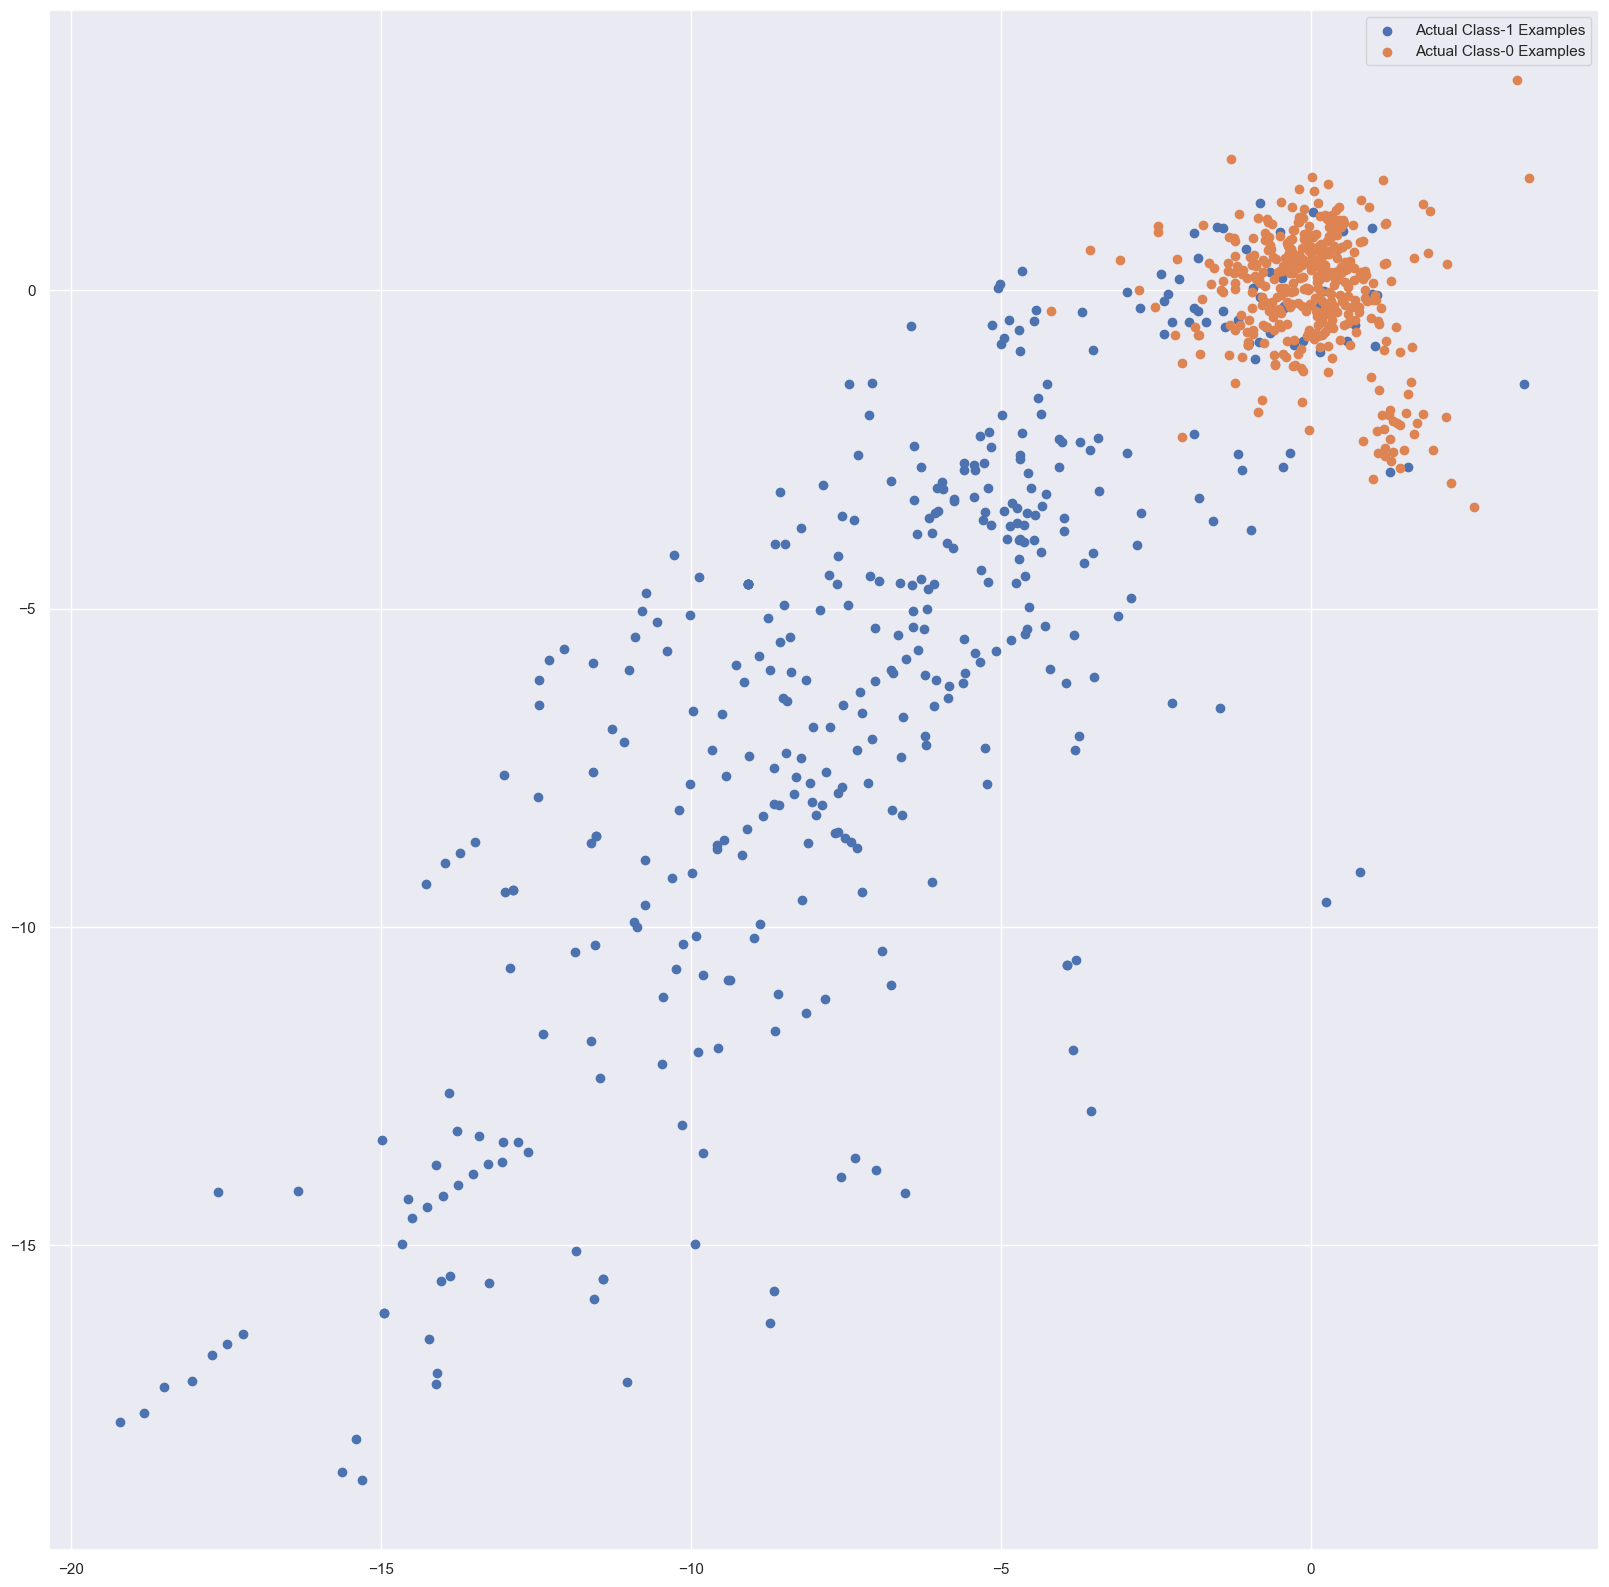

In [93]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [94]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9980730628251863
XGBoost threshold: 0.05881219357252121


## Model Selection:
## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9992099857797441**

**XGboost roc_value: 0.9980730628251863**

**XGBoost threshold: 0.05881219357252121**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

